<div style="background-color:rgb(0, 81, 158);color:white;padding:1em;letter-spacing:0.1em;font-size:2em;align=center">
<p><b>Gearbox Simulation Model</b></p>
</div>


<p><b>Simulation of the vibration behaviour of a gearbox under degradation</b></p>
<img src="__pictures/Gearbox.png" width="60%">

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Preliminary</b></p>
</div>

<p> Load Modules </p>

In [1]:
# Build In
import os
from copy import deepcopy as dc
import sys
from IPython.display import display, HTML
# Third Party
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
# from gearbox_functions import gearbox_functions as gf
import gearbox_functions as gf

 <p>Define Directories</p>

In [2]:
wd = os.getcwd()
if 'nt' in os.name:
    hd = r'\\imapc\benutzer\Mitarbeiterdaten\henss\_02_software\_08_github\Gearbox' # win directory  
elif 'posix' in os.name:
    hd = r'/Users/markhenss/Documents/GitHub/Gearbox' # mac directory


<p>Other</p>

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [7.4803*4, 4.62309*2]
sizefactor = 2
rcParams['ytick.labelsize'] = 8 * sizefactor
rcParams['xtick.labelsize'] = 8 * sizefactor
rcParams['axes.labelweight'] = 8 * sizefactor
rcParams['axes.titleweight'] = 8 * sizefactor
rcParams.update({'font.size': 8 * sizefactor})

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Motivation</b></p>
</div><br>
<li>Gear Wheel Pitting</li>
<li>Degradation dominates at one tooth only</li>

<li>Operating Strategy [Gretzinger2017]</li>
<li>Local Stress reduction</li>

<div style="background-color:rgb(0, 81, 158);color:white;padding:1em;letter-spacing:0.1em;font-size:2em;align=center">
<p><b>Brief Introduction</b></p>
</div>
<br>
<li>Toolbox to simulate gearbox vibration</li>
<li>Virtual copy of an existing testbench</li>
  <ul>
    <li>Match on Vibration Spectra</li>
    <li>Match on Gear Degradation</li>
  </ul>
<li>No consideration of:</li>
  <ul>
    <li>Transmission paths formulation (Structure Borne Accoustics)</li>
    <li>Bearing Degradation (not seen in testbench)</li>
  </ul>


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>State Model</b></p>
</div>
<br>

<li>Acts as a state model:</li>
<li>Executes for a given load cycle (must be greater than the previous)</li>
<li>Optional: Setting a new torque signal at the given load cycle (effecting the following load cycles)</li>
<br>

<img src="__pictures/State_Definition.png" width="80%">

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Inputs and main Methods&#40;&#41;</b></p>
</div>
<br>
<p>General Input Arguments:</p>
<li>f<sub>i</sub>: Rotational Frequency input shaft - in revolutions per second (float)</li>
<li>t<sub>i</sub>: Sample Interval - in seconds (float)</li>
<li>f<sub>s</sub>: Sample Rate - in Hz (float)</li>
<li>seed: Random Generator Seed (integer)</li>

<p>Input Arguments <b>vibrations = model.run()</b>:</p>
<li>n<sub>lc</sub>: Current number of load cycle - in revolutions (float)</li>

<p>Input Arguments <b>model.set()</b>:</p>
<li>n<sub>lc</sub>: Current number of load cycle - in revolutions (float)</li>
<li><a href="torque">torque</a>: Input Torque - in Nm</li>



<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Torque Definition</b></p>
</div>
<br>

<p><b>Vibration/Degradation Output is calculated for previous given torque<sub>p-1</sub> argument.</b></p>
<p>Given Input Torque will be relevant for the next time steps n<sub>lc</sub></p>

<p>Definition:</p>
<li>Must be defined as array</li>
<li>Each value corresponds to a given time</li>
<li>Function <u>'get_sample_time_torque()'</u> returns the time vector for torque</li>
<li>Length of the torque vector must be at least as long as it takes for running once every possible meshing</li>



<p>Which Torque Applies on which Gear Element</p>
<p>Input Torque applies on:</p>
    <li>Vibration Influence of Gear In, Bearing 1 and Bearing 2</li>
    <li>Load Spectre Calculation of Gear In, Bearing 1,  Bearing 2 and <u>Gear Out</u></li>
<p>Output Torque applies on:</p>
    <li>Vibration Influence of Gear Out, Bearing 3 and Bearing 4</li>
    <li>Load Spectre Calculation of Bearing 3 and Bearing 4</li>

<p><b>Gear Degradation strongly depends on the Gearbox Design &#8594; Both Input and Output Gear Degradation are defined for input torque!!!</b></p>

<div style="background-color:rgb(0, 81, 158);color:white;padding:1em;letter-spacing:0.1em;font-size:2em;align=center">
<p><b>Toolbox Running Example - Definition</b></p>
</div>
<p>Complete High Level Example. Details and Theory will follow.</p>

<p>Load Gearbox Simulation Toolbox:</p>

In [4]:
# os.chdir()
os.chdir(hd)
from gearbox import Gearbox
os.chdir(wd)


<p>Define General Input Arguments:</p>

In [5]:
rotational_frequency_in = 5.2 # U/s | float
number_of_load_cycle = 0 # | Must be float in .3f 
sample_interval = 1 # s | float
sample_rate = 1000 # Hz | float
seed = 5 


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Define Vibration Elements</b></p>
</div>

In [6]:
GearIn = {'no_teeth': 10,                                         # Number of teeth
          'signal': 'gausspulse',                                 # Signal type for gear
          'ampl_method': 'gaussian_repeat',                       # Amplitude Method for inner gear
          'ampl_attributes': {'mu': 4, 'sigma': 0.5},             # Attributes regarding Amplitude Method for gear signal
          'noise_method': None,                             # Noise Method for inner gear
          'noise_attributes': {'mu': 0, 'sigma': 0.25},           # Attributes regarding Noise Method for gear signal
          'torq_method': None,                                    # Torque Influence Method for inner gear
          'torq_attributes': {'scale_min': 0,                     # Attributes regarding Torque Influence Method for gear signal
                              'scale_max': 0.2,
                               'value_min': 0,
                               'value_max': 50,
                              'norm_divisor': 200,
                              'exponent': 2},           
          }

GearOut = {'no_teeth': 12,                                        # Number of teeth
           'signal': 'gausspulse',                                # Signal type for gear
           'ampl_method': 'gaussian_repeat',                      # Amplitude Method for inner gear
           'ampl_attributes': {'mu': 3, 'sigma': 0.5},            # Attributes regarding Amplitude Method for gear signal
           'noise_method': None,                            # Noise Method for inner gear
           'noise_attributes': {'mu': 0, 'sigma': 0.25},          # Attributes regarding Noise Method for gear signal
           'torq_method': None,                                   # Torque Influence Method for inner gear
           'torq_attributes': {'scale_min': 0,                    # Attributes regarding Torque Influence Method for gear signal
                               'scale_max': 0.2,
                               'value_min': 0,
                               'value_max': 50,
                               'norm_divisor': 1,
                               'exponent': 4},           
          }

In [7]:
# General Definition of Amplitudes etc. (can be also defined seperatedly for each Bearing)
BearingI =   {# Inner Ring Rollover
             'signal_iring': 'sine',                               # Signal type for inner cage
             'ampl_method_iring': 'const',                         # Amplitude Method for inner cage signal (Repeat methods are not working for bearings)
             'ampl_attributes_iring': {'constant': 2.5},           # Attributes regarding Amplitude Method for inner cage signal
             'noise_method_iring': 'gaussian',                     # Noise Method for inner gear
             'noise_attributes_iring': {'mu': 0, 'sigma': 0.05},   # Attributes regarding Noise Method for gear signal
             'torq_method_iring': None,                         # Torque Influence Method for rolling element
             'torq_attributes_iring': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                       'scale_max': 0.1,
                                       'value_min': 0,
                                       'value_max': 50,
                                       'norm_divisor': 1,
                                       'exponent': 4},           

             # Rolling Element:
             'signal_relement': 'sine',                            # Signal type for rolling element
             'ampl_method_relement': 'const',                      # Amplitude Method for rolling element signal (Repeat methods are not working for bearings)
             'ampl_attributes_relement': {'constant': 1.2},        # Attributes regarding Amplitude Method for rolling element signal
             'noise_method_relement': 'gaussian',                  # Noise Method for rolling element
             'noise_attributes_relement': {'mu': 0, 'sigma': 0.05},# Attributes regarding Noise Method for gear signal
             'torq_method_relement': None,                         # Torque Influence Method for rolling element
             'torq_attributes_relement': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                          'scale_max': 0.1,
                                          'value_min': 0,
                                          'value_max': 50,
                                          'norm_divisor': 1,
                                          'exponent': 4},
             # Outer Ring Rollover
             'signal_oring': 'sine',                               # Signal type for inner cage
             'ampl_method_oring': 'const',                         # Amplitude Method for inner cage signal (Repeat methods are not working for bearings)
             'ampl_attributes_oring': {'constant': 2.5},           # Attributes regarding Amplitude Method for inner cage signal
             'noise_method_oring': 'gaussian',                     # Noise Method for inner gear
             'noise_attributes_oring': {'mu': 0, 'sigma': 0.05},   # Attributes regarding Noise Method for gear signal
             'torq_method_oring': None,                         # Torque Influence Method for rolling element
             'torq_attributes_oring': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                       'scale_max': 0.1,
                                       'value_min': 0,
                                       'value_max': 50,
                                       'norm_divisor': 1,
                                       'exponent': 4},          
            }


In [8]:
Bearing1 = {**{'no_elements': 11}, **BearingI}                     # Number of rolling elements
Bearing2 = {**{'no_elements': 9}, **BearingI}                     # Number of rolling elements
Bearing3 = {**{'no_elements': 13}, **BearingI}                     # Number of rolling elements
Bearing4 = {**{'no_elements': 12}, **BearingI}                     # Number of rolling elements


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Define Degradation Elements</b></p>
</div>

In [9]:
# Reference Value for PDFs is given for load defined 'Whoeler' 'torqp'

Deg_GearIn = {'Failing_Teeth': 2,                                      # Number of Teeth falling at Gear
              'Chances': {'neighbouring': 1,                           # Chance that multiple falling teeth are neighbouring 
                          'opposite': 1,                               # Chance that multiple falling teeth are opposite to each other 
                          'keeporder': 10},                            # Chance that multiple falling teeth are keeping order from init to eol
              'PDF_Deg_Init': {'n': norm(loc=6.875e6, scale=1.053e6),  # P(n_0)
                               'a': norm(loc=0.450, scale=0.305)},     # P(a_0)
              'PDF_Deg_EOL': {'n': norm(loc=10390000, scale=1.053e6),  # P(n_eol)
                              'a': norm(loc=4.0, scale=0.)},           # P(a_eol)
              'Woehler': {'k': 10.5,                                   # Woehler Exponent 
                          'np': 10390000,                              # Woehler Reference n
                          'torqp': 200},                               # Woehler Reference sigma in Nm
              'GridSearch': {'slice_theta1': (0.0001, 0.0902, 0.01),   # Grid for function a = theta1 * exp(theta2 * n) + theta3 defined in slices
                             'slice_theta2': (0.10/1e6, 1.51/1e6, 0.2/1e6), #tbd change step to 0.02/1e6
                             'slice_theta3':(-2.0, 0.5, 0.1)}
             }
 
Deg_GearOut = {'Failing_Teeth': 3,                                      # Number of Teeth falling at Gear
               'Chances': {'neighbouring': 2,                           # Chance that multiple falling teeth are neighbouring 
                           'opposite': 2,                               # Chance that multiple falling teeth are opposite to each other 
                           'keeporder': 10},                            # Chance that multiple falling teeth are keeping order from init to eol
               'PDF_Deg_Init': {'n': norm(loc=6.875e6, scale=1.053e6),  # P(n_0)
                                'a': norm(loc=0.450, scale=0.305)},     # P(a_0)
               'PDF_Deg_EOL': {'n': norm(loc=10390000, scale=1.053e6),  # P(n_eol)
                               'a': norm(loc=4.0, scale=0.)},           # P(a_eol)
               'Woehler': {'k': 10.5,                                   # Woehler Exponent 
                           'np': 10390000,                              # Woehler Reference n
                           'torqp': 200},                               # Woehler Reference sigma in Nm
               'GridSearch': {'slice_theta1': (0.0001, 0.0902, 0.01),   # Grid for function a = theta1 * exp(theta2 * n) + theta3 defined in slices
                              'slice_theta2': (0.10/1e6, 1.51/1e6, 0.2/1e6), #tbd change step to 0.02/1e6
                              'slice_theta3':(-2.0, 0.5, 0.1)}
              }

In [10]:
Deg_Bearing1 = 'tbd'
Deg_Bearing2 = 'tbd'
Deg_Bearing3 = 'tbd'
Deg_Bearing4 = 'tbd'

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Define Degradation-Vibration-Dependencie</b></p>
</div>

In [11]:
GearDegVibDictIn = {'signal': 'gausspulse',                                 # Signal type for gear
                       'fc_factor': 2*rotational_frequency_in,                                      # fc = frequency * fc_factor (see gauspulse defintion)
                       'bw_factor': 0.5,                                    # see gauspulse defintion
                       'bwr_factor': -6,                                    # see gauspulse defintion
                       'scale_method': 'linear',                            # Scale Method (See Torque Influence Method)
                       'scale_attributes': {'scale_min': 0,                 # Attributes regarding Scale Method for gear signal (see Torque Influence Method)
                                           'scale_max': 1,
                                           'value_min': 0,
                                           'value_max': 4,
                                           'exponent': 2},
                       'torq_influence': True,                              # If True Torque Influence will be taken into account in the same way as in vibration definition
                       'noise_method': 'gaussian',                          # Noise Method
                       'noise_attributes': {'mu': 0, 'sigma': 0.005},       # Attributes regarding Noise Method for
                       }

GearDegVibDictOut = {'signal': 'gausspulse',                                # Signal type for gear
                       'fc_factor': 2*rotational_frequency_in,                                      # fc = frequency * fc_factor (see gauspulse defintion)
                       'bw_factor': 0.5,                                    # see gauspulse defintion
                       'bwr_factor': -6,                                    # see gauspulse defintion
                       'scale_method': 'linear',                            # Scale Method (See Torque Influence Method)
                       'scale_attributes': {'scale_min': 0,                 # Attributes regarding Scale Method for gear signal (see Torque Influence Method)
                                           'scale_max': 1,
                                           'value_min': 0,
                                           'value_max': 4,
                                           'exponent': 2},
                       'torq_influence': True,                              # If True Torque Influence will be taken into account in the same way as in vibration definition
                       'noise_method': 'gaussian',                          # Noise Method
                       'noise_attributes': {'mu': 0, 'sigma': 0.005},       # Attributes regarding Noise Method for
                       }


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Torque Definition (Workaround)</b></p>
</div>

In [12]:
sample_time = gf.get_sample_time_torque(rotational_frequency_in, sample_rate, GearIn['no_teeth'], GearOut['no_teeth'])
torque_in = np.sin((2 * np.pi * rotational_frequency_in * sample_time)) * 5 + 200 # Nm | array

<div style="background-color:rgb(0, 81, 158);color:white;padding:1em;letter-spacing:0.1em;font-size:2em;align=center">
<p><b>Toolbox Running Example - Run</b></p>
</div>
<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Instance Initialization</b></p>
</div>
<br>
<p>Initialize a new Instance:</p>



In [13]:
model = Gearbox(# Vibration Arguments
                rotational_frequency_in,
                sample_interval, sample_rate,
                GearIn, GearOut,
                Bearing1, Bearing2, Bearing3, Bearing4,
                # Degradation Arguments
                Deg_GearIn, Deg_GearOut,
                Deg_Bearing1, Deg_Bearing2, Deg_Bearing3, Deg_Bearing4,
                # Shared Arguments
                seed=seed, 
                fixed_start=True,
                GearDegVibDictIn=GearDegVibDictIn,
                GearDegVibDictOut=GearDegVibDictOut)

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Run <u>only</u> Vibration</b></p>
</div>
<br>
<p>Initialize Vibration Module: <b>init_vibration(torque)</b></p>
<p>Input Arguments:</p>
<li>Input Torque</li>
<p>Returns:</p>
<li>-</li>


In [14]:
model.Vibration.init_vibration(torque_in)

<p>Get Loads from Torque: <b>get_loads(torque)</b></p>
<p>Input Arguments:</p>
<li>Input Torque</li>
<p>Returns:</p>
<li>Loads Dictionary</li>

In [15]:
loads = model.Vibration.get_loads(torque_in)

df_loads = pd.DataFrame(loads)
df_loads.index = df_loads.index.astype(dtype='int32')
df_loads = df_loads.sort_index()


In [16]:
df_loads

GearIn  \
1   [200.64927656452755, 199.78984003117563, 199.9...   
2   [202.72972638849743, 202.82161686331628, 202.7...   
3   [204.6015903565288, 204.6398152628115, 204.623...   
4   [204.7126945274474, 204.72667358468937, 204.74...   
5   [203.01081092629204, 203.0497807769523, 202.96...   
6   [200.1854477623623, 200.23486686535662, 200.12...   
7   [197.29088504519686, 197.19868013123337, 197.2...   
8   [195.35201201867812, 195.36847468589335, 195.3...   
9   [195.2802563190933, 195.26651593629646, 195.25...   
10  [196.96966586596355, 196.93084963630184, 197.0...   
11                                                NaN   
12                                                NaN   

                                              GearOut Bearing1 Bearing2  \
1   [200.64927656452755, 204.6398152628115, 202.96...      tbd      tbd   
2   [202.72972638849743, 204.72667358468937, 200.1...      tbd      tbd   
3   [204.6015903565288, 203.0497807769523, 197.239...      tbd      tbd   
4   [204.7126945274474, 200.23486686535662, 195.38...      tbd      tbd   
5   [203.01081092629204, 197.19868013123337, 195.2...      tbd      tbd   
6   [200.1854477623623, 195.36847468589335, 197.01...      tbd      tbd   
7   [197.29088504519686, 195.26651593629646, 199.8...      tbd      tbd   
8   [195.35201201867812, 196.93084963630184, 202.7...      tbd      tbd   
9   [195.2802563190933, 199.9010777604141, 204.605...      tbd      tbd   
10  [196.96966586596355, 202.7809520956937, 204.70...      tbd      tbd   
11  [199.78984003117563, 204.62311834466232, 203.0...      tbd      tbd   
12  [202.82161686331628, 204.74017494587477, 200.1...      tbd      tbd   

   Bearing3 Bearing4  
1       tbd      tbd  
2       tbd      tbd  
3       tbd      tbd  
4       tbd      tbd  
5       tbd      tbd  
6       tbd      tbd  
7       tbd      tbd  
8       tbd      tbd  
9       tbd      tbd  
10      tbd      tbd  
11      tbd      tbd  
12      tbd      tbd

<p>Get Vibration Signal: <b>run_vibration(nolc, torque, statei=None, output=True)</b></p>
<p>Input Arguments:</p>
<li>nolc: current number of load cycle</li>
<li>torque: Input Torque</li>
<li>statei: current degradation state</li>
<li>output: if true method returns vibration signal</li>
<p>Returns:</p>
<li>vibration signal</li>

In [17]:
vibration = model.Vibration.run_vibration(number_of_load_cycle, torque_in, statei=None, output=True)

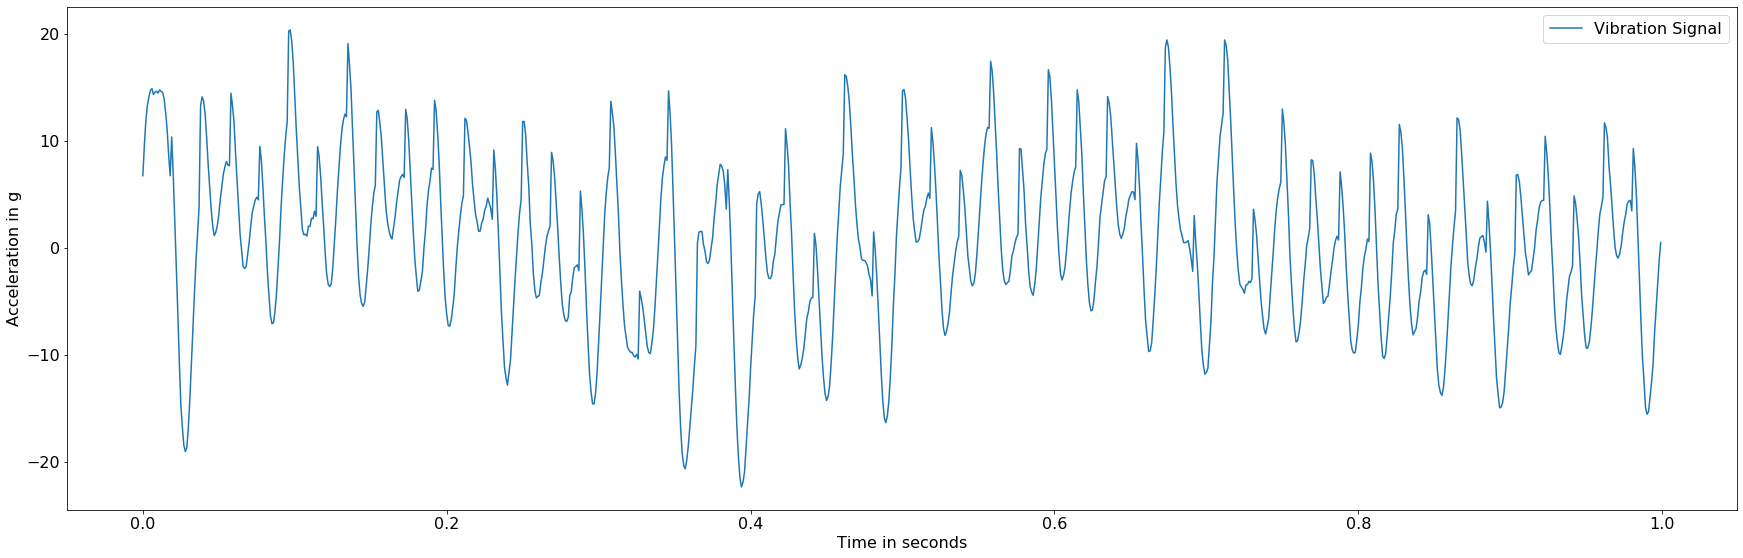

In [18]:
plt.plot(np.arange(0, sample_interval, 1/sample_rate), vibration)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Vibration Signal'])
plt.show()

<p>Summarize Vibration: <b>summary_vibration()</b></p>

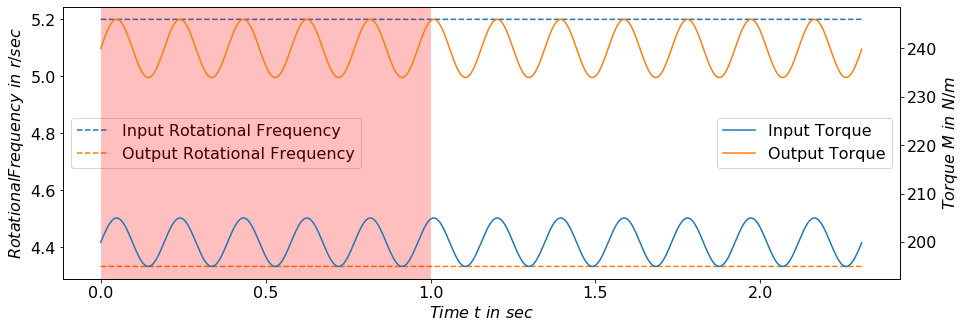

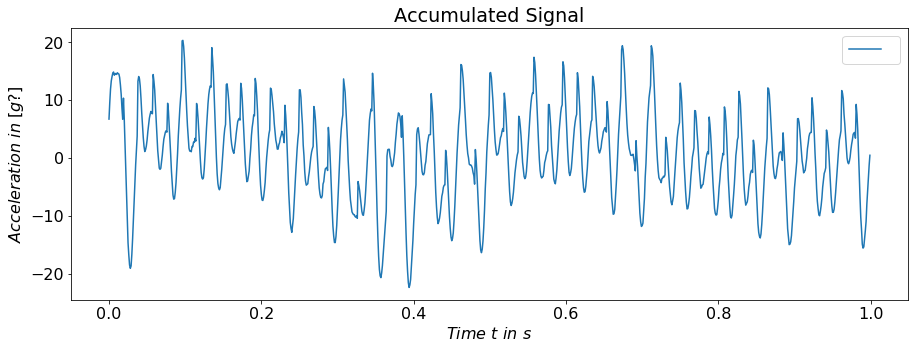

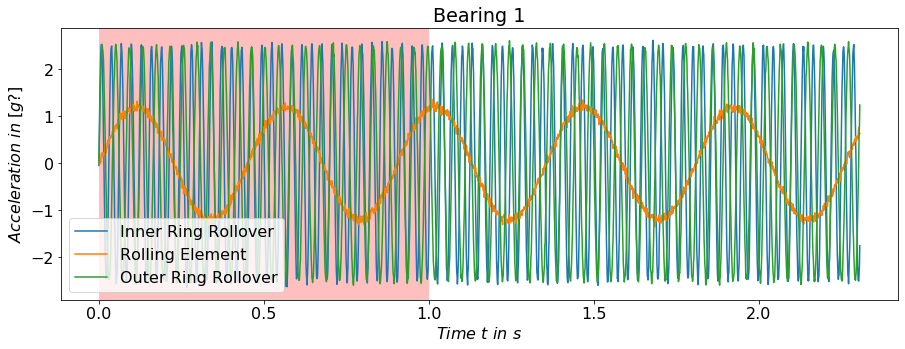

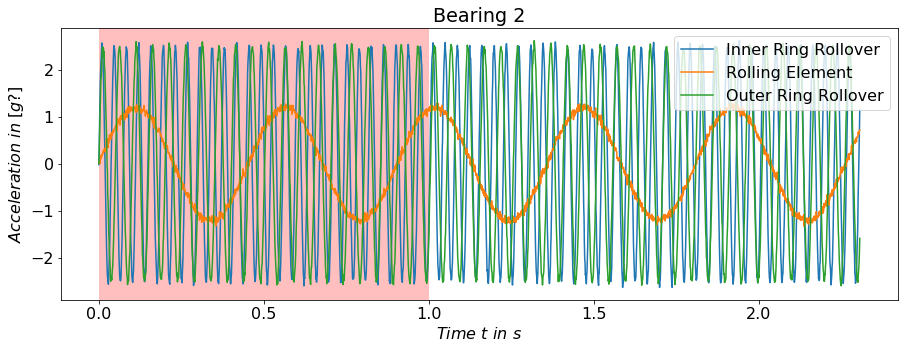

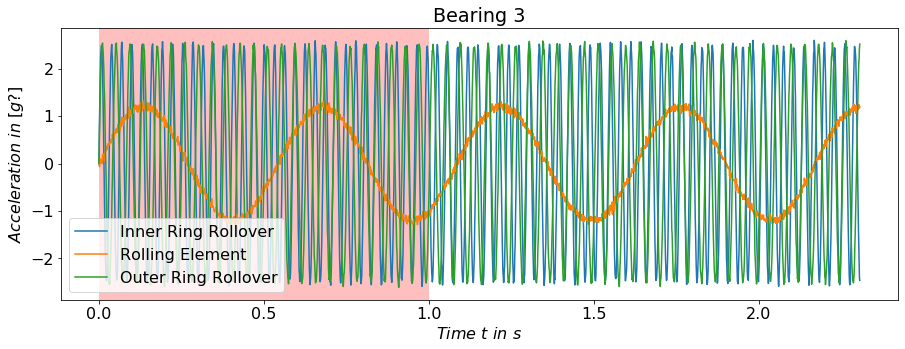

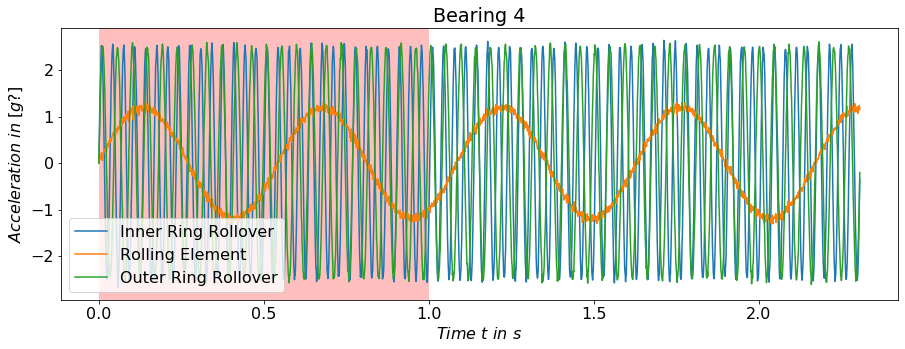

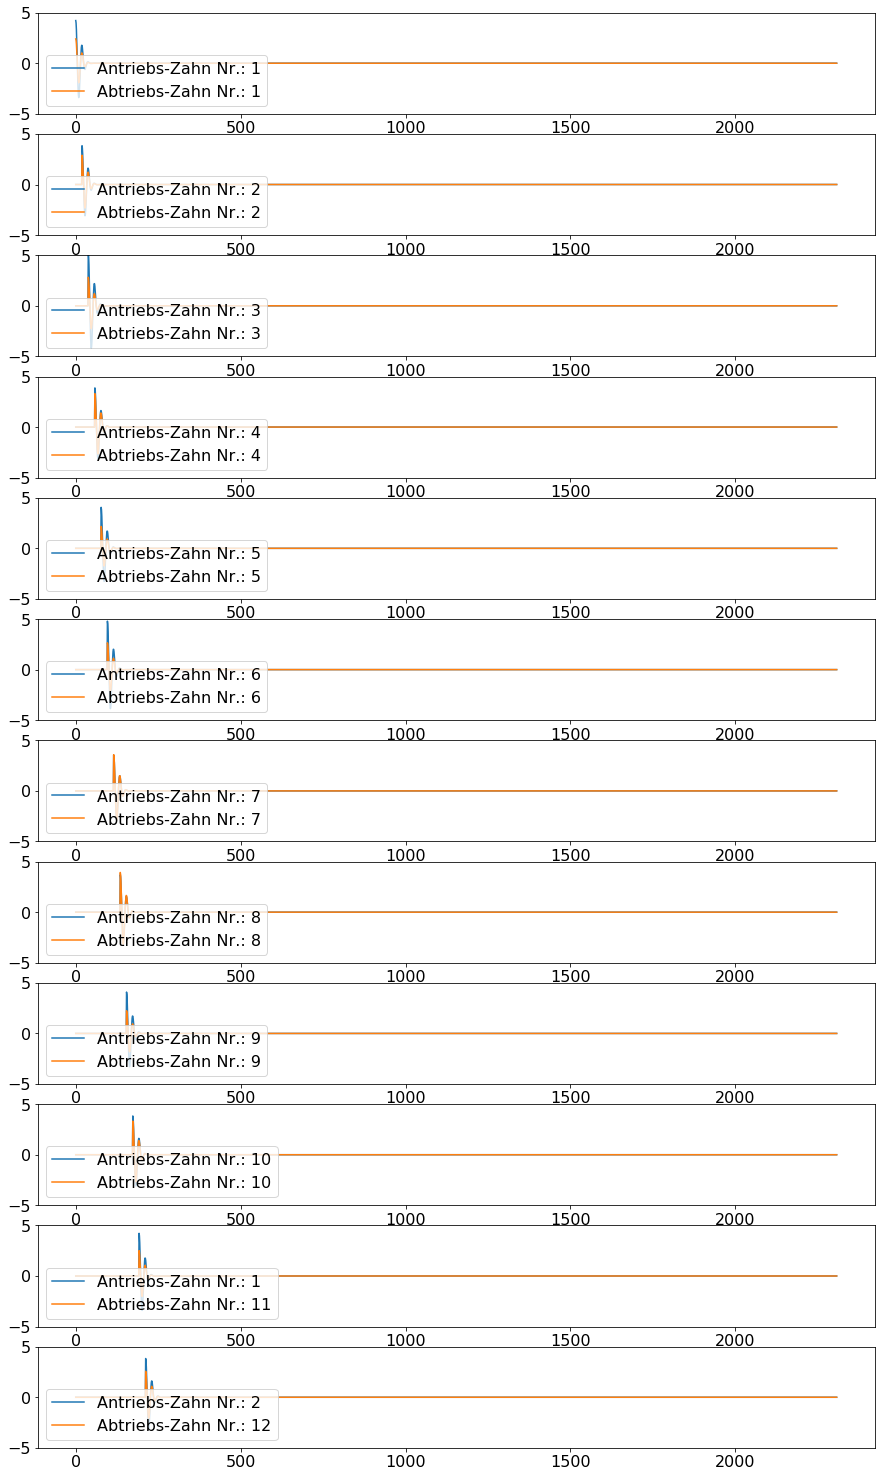

In [19]:
model.Vibration.summary_vibration()

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Run <u>only</u> Degradation</b></p>
</div>
<br>
<p>Initialize Degradation Module: <b>init_degradation()</b></p>
<p>Input Arguments:</p>
<p>Returns:</p>
<li>statei: DataFrame containing the degradation states</li>

In [20]:
statei = model.Degradation.init_degradation()

In [21]:
pd.DataFrame(statei['GearIn'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
$a_{init}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
$d_{init}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [22]:
pd.DataFrame(statei['GearOut'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
$a_{init}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
$d_{init}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            12.0  
$a_{init}$   NaN  
$d_{init}$   NaN

<p>Summarize Vibration: <b>summary_vibration()</b></p>

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  0.483431  2.038990e+06      9  9.568328e+06   4.0  0.0301  5.000000e-07   
1  0.507219  5.209652e+06      8  9.728413e+06   4.0  0.0301  5.000000e-07   

   theta3        n0_old      neol_old  
0     0.4  5.121978e+06  9.432578e+06  
1     0.1  5.283728e+06  9.767007e+06

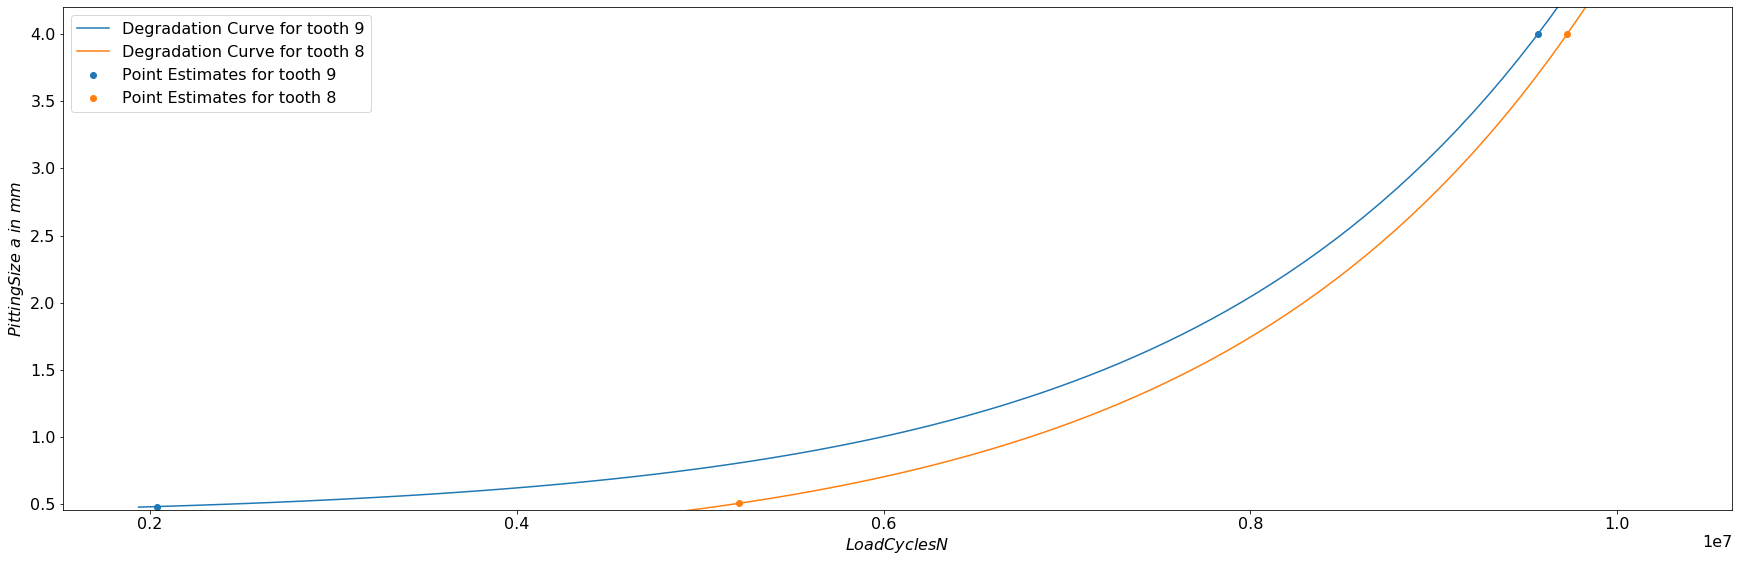

0
0 -0.270806
1 -1.152894

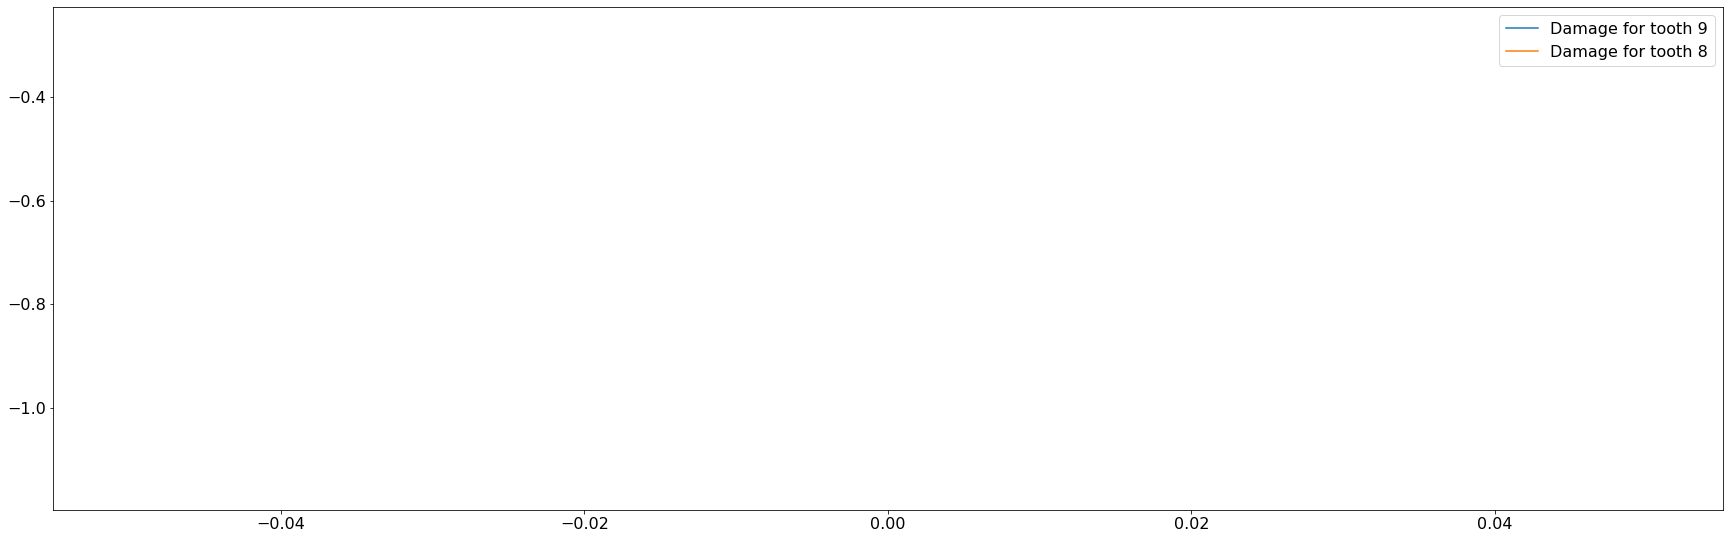

0
0 NaN
1 NaN

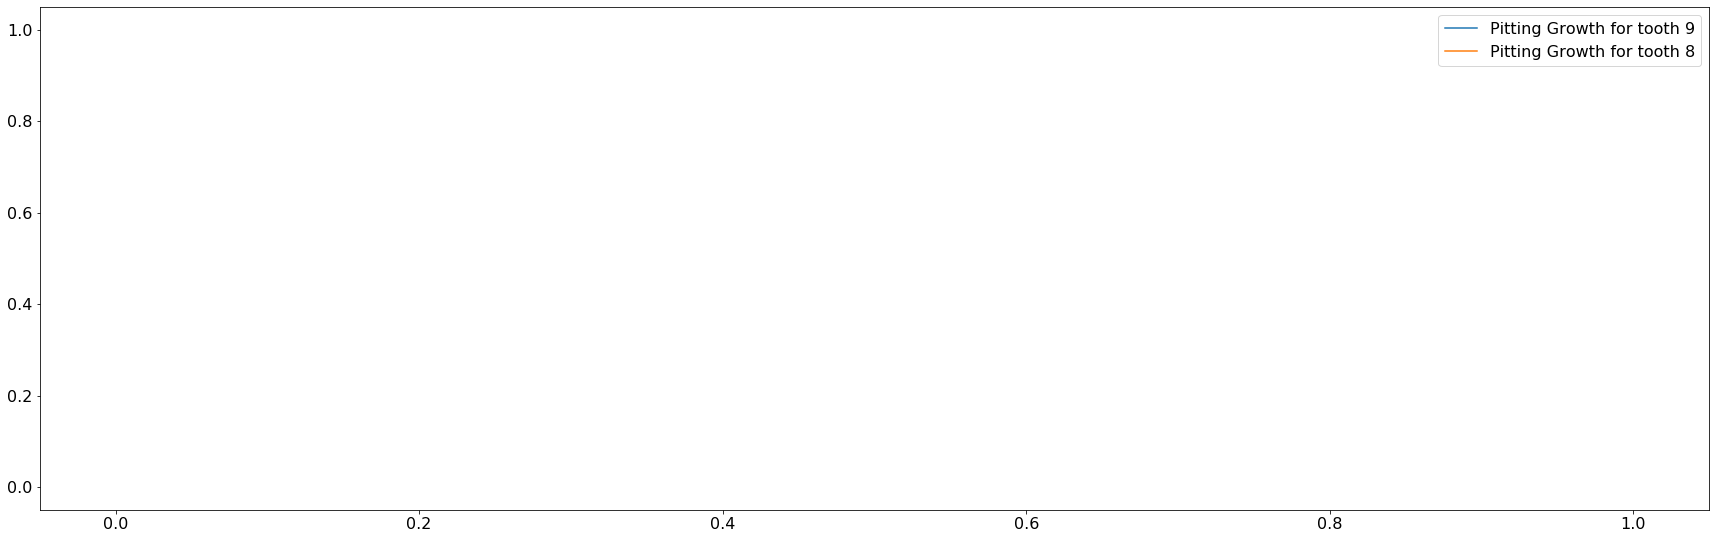

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  1.191385  5.964817e+06     11  8.994626e+06   4.0  0.0401  5.000000e-07   
1  0.172684  5.677857e+06     10  1.196303e+07   4.0  0.0101  5.000000e-07   
2  0.507219  5.648835e+06      9  9.779049e+06   4.0  0.0301  5.000000e-07   

         theta3        n0_old      neol_old  
0  4.000000e-01  5.121978e+06  9.134019e+06  
1  1.776357e-15  5.283728e+06  1.205635e+07  
2  1.776357e-15  5.842420e+06  9.767007e+06

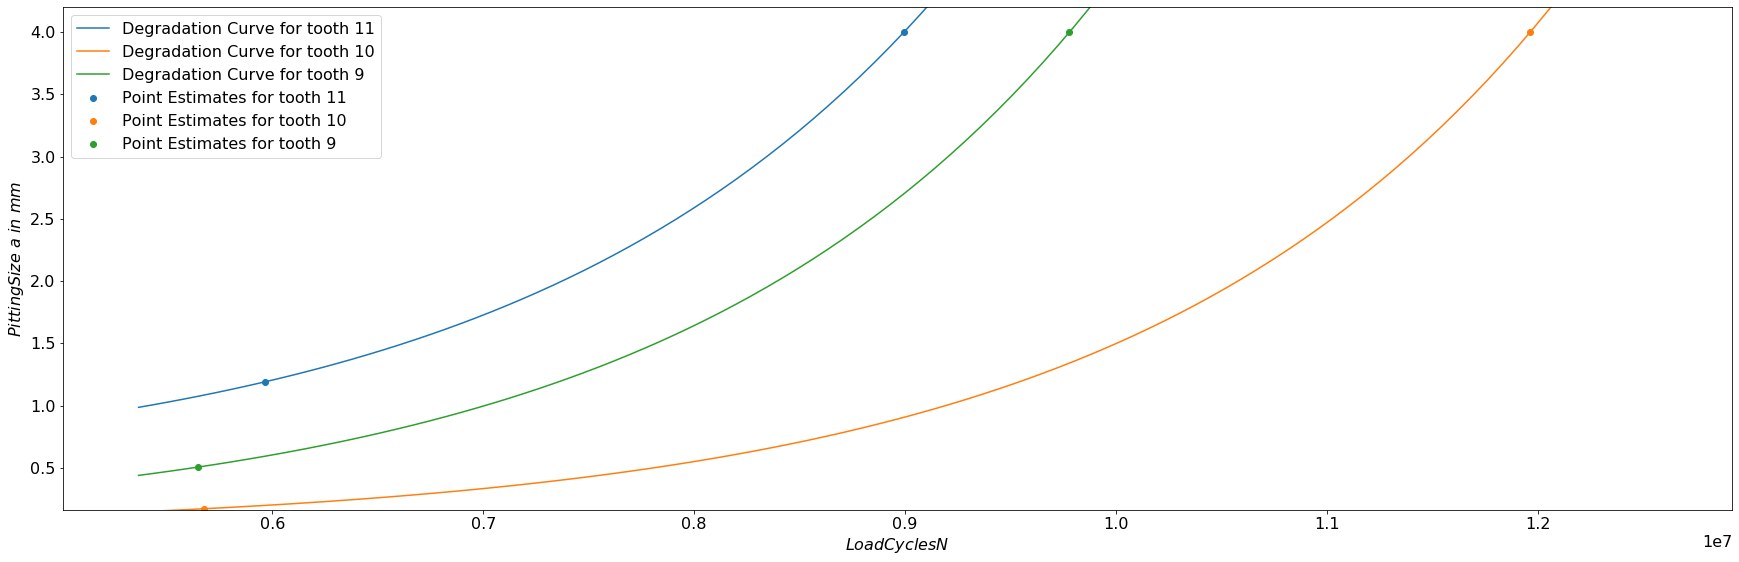

0
0 -1.968711
1 -0.903374
2 -1.367686

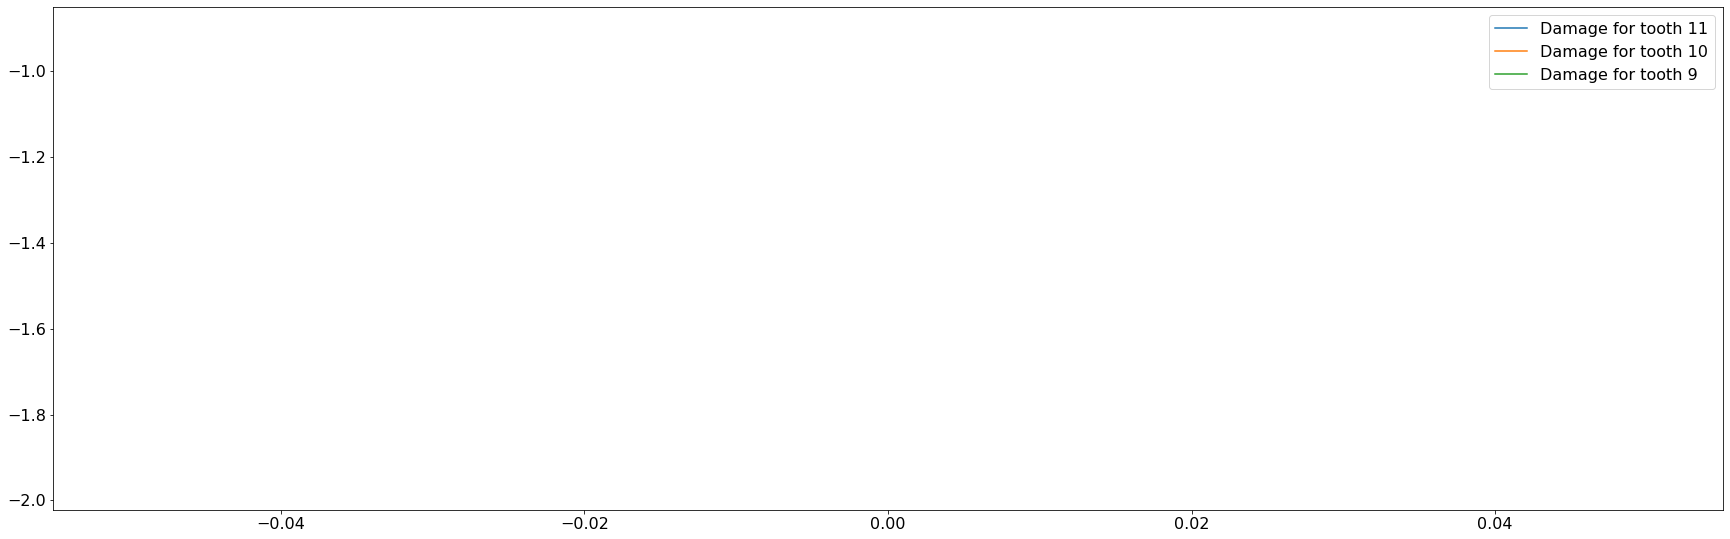

0
0 NaN
1 NaN
2 NaN

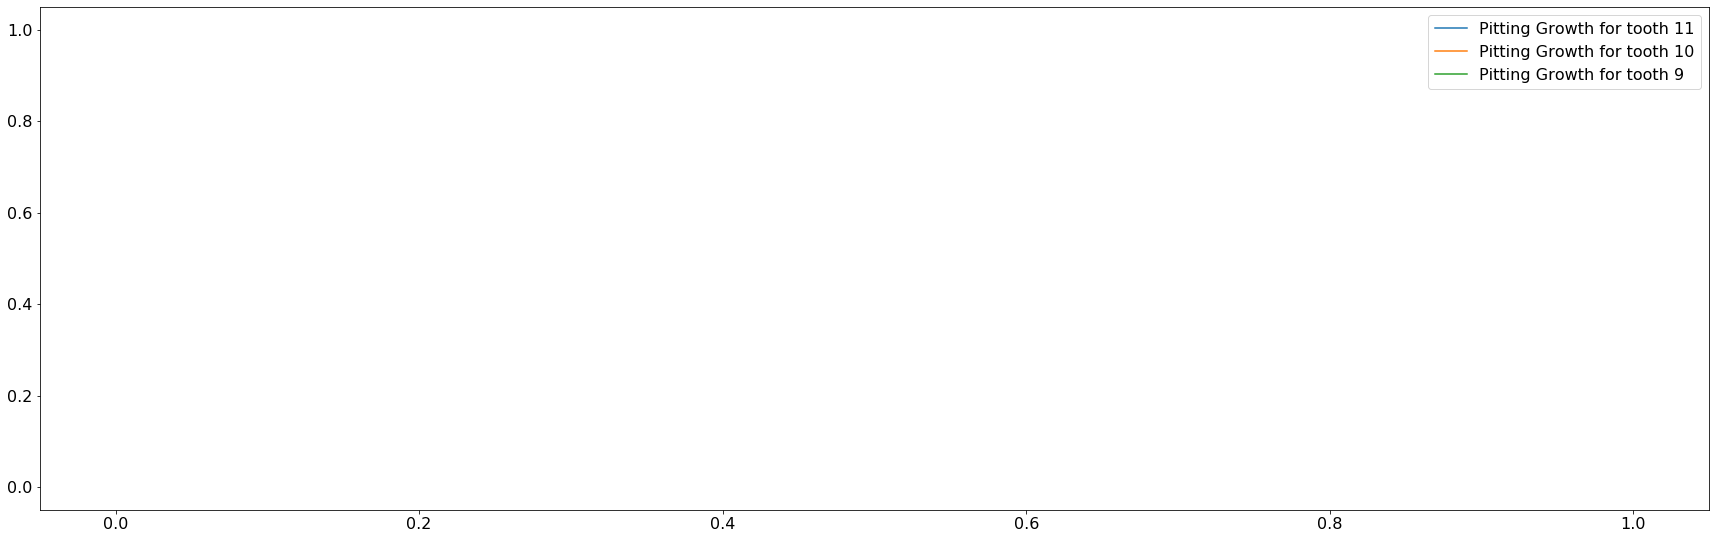

In [23]:
model.Degradation.summary_degradation()

<p>Get Degradation Growth: <b>run_degradation(nolc, loads)</b></p>
<p>Input Arguments:</p>
<li>nolc: current number of load cycle (must be greater than the previous given nolc)</li>
<li>loads: Dictionary regarding get_loads(torque) return</li>
<p>Returns:</p>
<li>statei </li>

In [24]:
loads = {'GearIn': {'9': [200], '8': [200]},
         'GearOut': {'11': [200], '10': [200], '9': [200]}}

for nolc in np.linspace(1e6, 6e6, 50):
    statei = model.Degradation.run_degradation(nolc, loads)

In [25]:
pd.DataFrame(statei['GearIn'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0       8.0       9.0   \
$a_{6000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.704575  1.004575   
$d_{6000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.174904  0.526077   

               10.0  
$a_{6000000}$   NaN  
$d_{6000000}$   NaN

In [26]:
pd.DataFrame(statei['GearOut'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0       9.0   \
$a_{6000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
$d_{6000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.157095   

                  10.0      11.0  12.0  
$a_{6000000}$      NaN       NaN   NaN  
$d_{6000000}$ -0.10785 -0.318442   NaN

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  0.483431  2.038990e+06      9  9.568328e+06   4.0  0.0301  5.000000e-07   
1  0.507219  5.209652e+06      8  9.728413e+06   4.0  0.0301  5.000000e-07   

   theta3        n0_old      neol_old  
0     0.4  5.121978e+06  9.432578e+06  
1     0.1  5.283728e+06  9.767007e+06

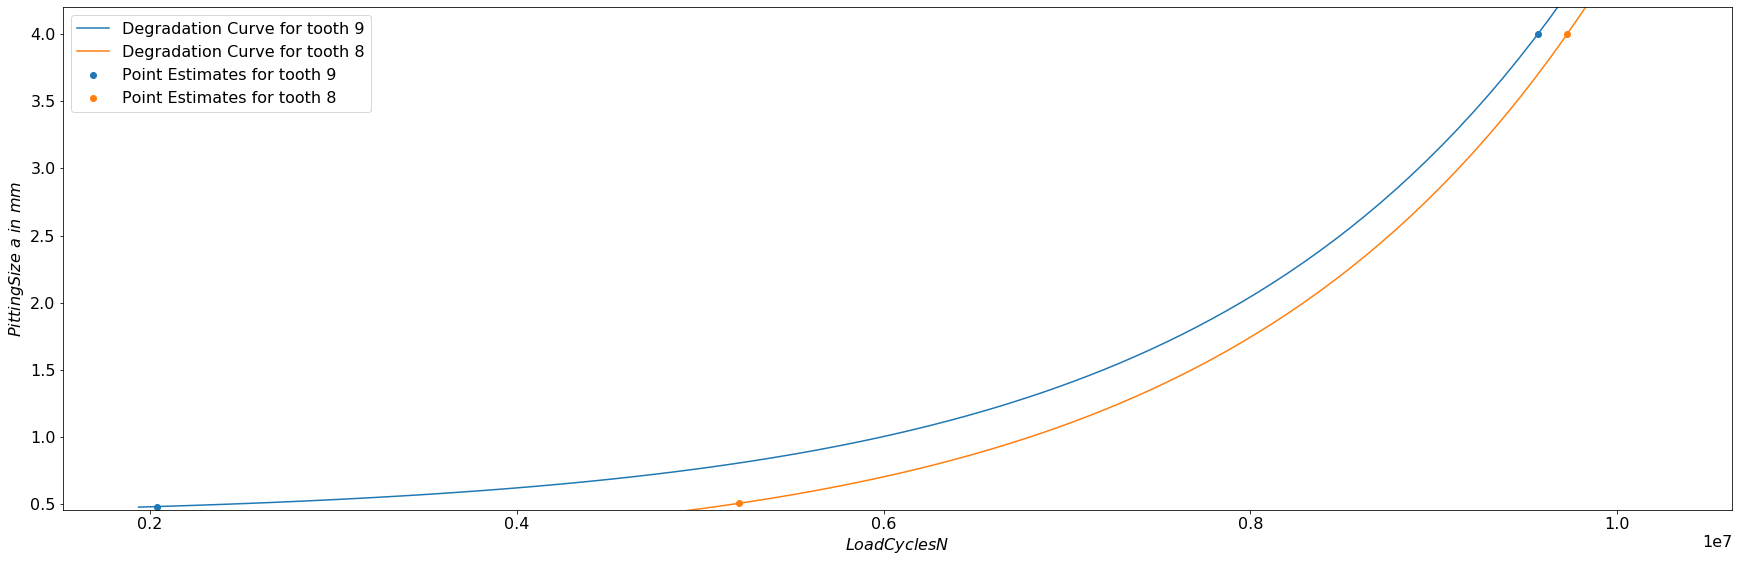

0.000000e+00  1.000000e+06  1.102041e+06  1.204082e+06  1.306122e+06  \
0     -0.270806     -0.137992     -0.124440     -0.110887     -0.097335   
1     -1.152894     -0.931594     -0.909013     -0.886431     -0.863849   

   1.408163e+06  1.510204e+06  1.612245e+06  1.714286e+06  1.816327e+06  ...  \
0     -0.083782     -0.070230     -0.056678     -0.043125     -0.029573  ...   
1     -0.841268     -0.818686     -0.796105     -0.773523     -0.750941  ...   

   5.081633e+06  5.183673e+06  5.285714e+06  5.387755e+06  5.489796e+06  \
0      0.404105      0.417657      0.431210      0.444762      0.458315   
1     -0.028331     -0.005749      0.016833      0.039414      0.061996   

   5.591837e+06  5.693878e+06  5.795918e+06  5.897959e+06  6.000000e+06  
0      0.471867      0.485420      0.498972      0.512524      0.526077  
1      0.084577      0.107159      0.129741      0.152322      0.174904  

[2 rows x 51 columns]

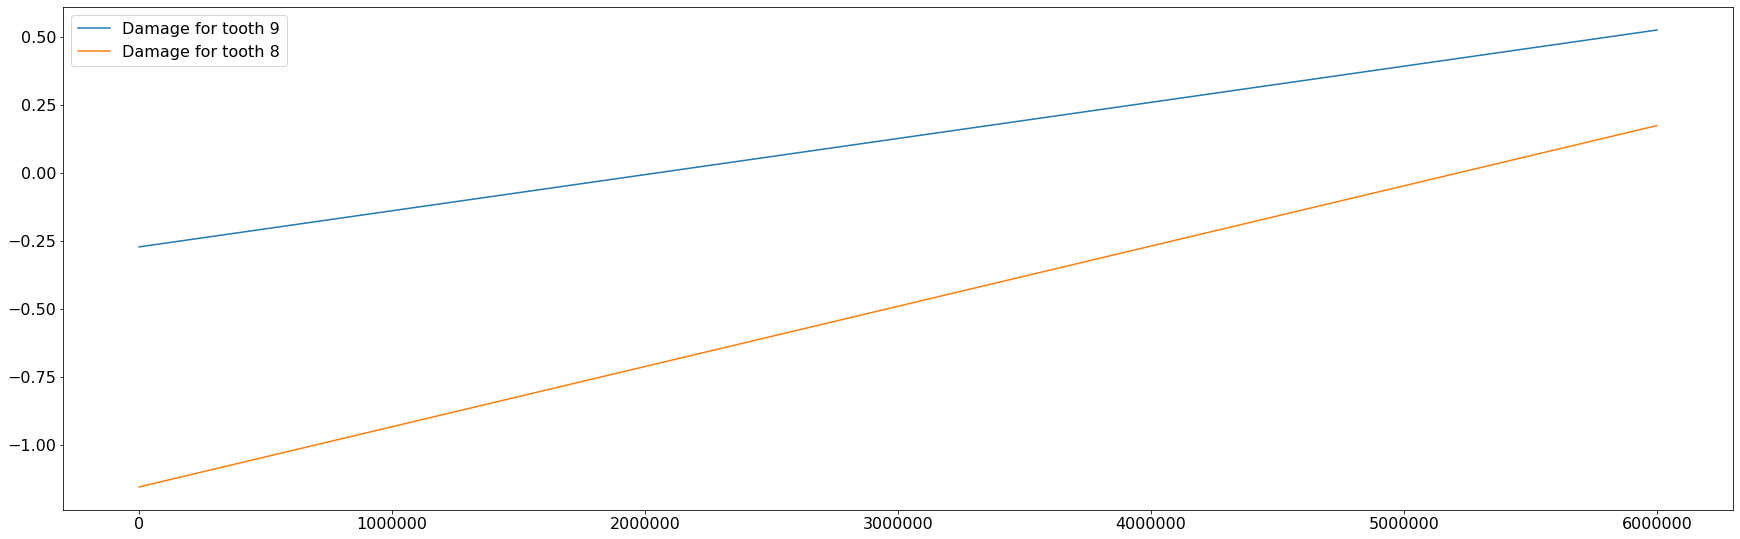

0.000000e+00 1.000000e+06 1.102041e+06 1.204082e+06 1.306122e+06  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   

  1.408163e+06 1.510204e+06 1.612245e+06 1.714286e+06 1.816327e+06  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1          NaN          NaN          NaN          NaN          NaN  ...   

           5.081633e+06          5.183673e+06          5.285714e+06  \
0  [0.7819697810526608]  [0.8019637484021849]  [0.8230042873660188]   
1                   NaN                   NaN  [0.5230042873660183]   

           5.387755e+06          5.489796e+06          5.591837e+06  \
0   [0.845146180075429]  [0.8684470761978018]  [0.8929676430360135]   
1  [0.5451461800754285]  [0.5684470761978013]  [0.5929676430360131]   

           5.693878e+06          5.795918e+06          5.897959e+06  \
0  [0.9187717234846582]  [0.9459265022543919]  [0.9745026807971894]   
1  [0.6187717234846577]  [0.6459265022543914]  [0.6745026807971891]   

           6.000000e+06  
0  [1.0045746613879512]  
1  [0.7045746613879509]  

[2 rows x 51 columns]

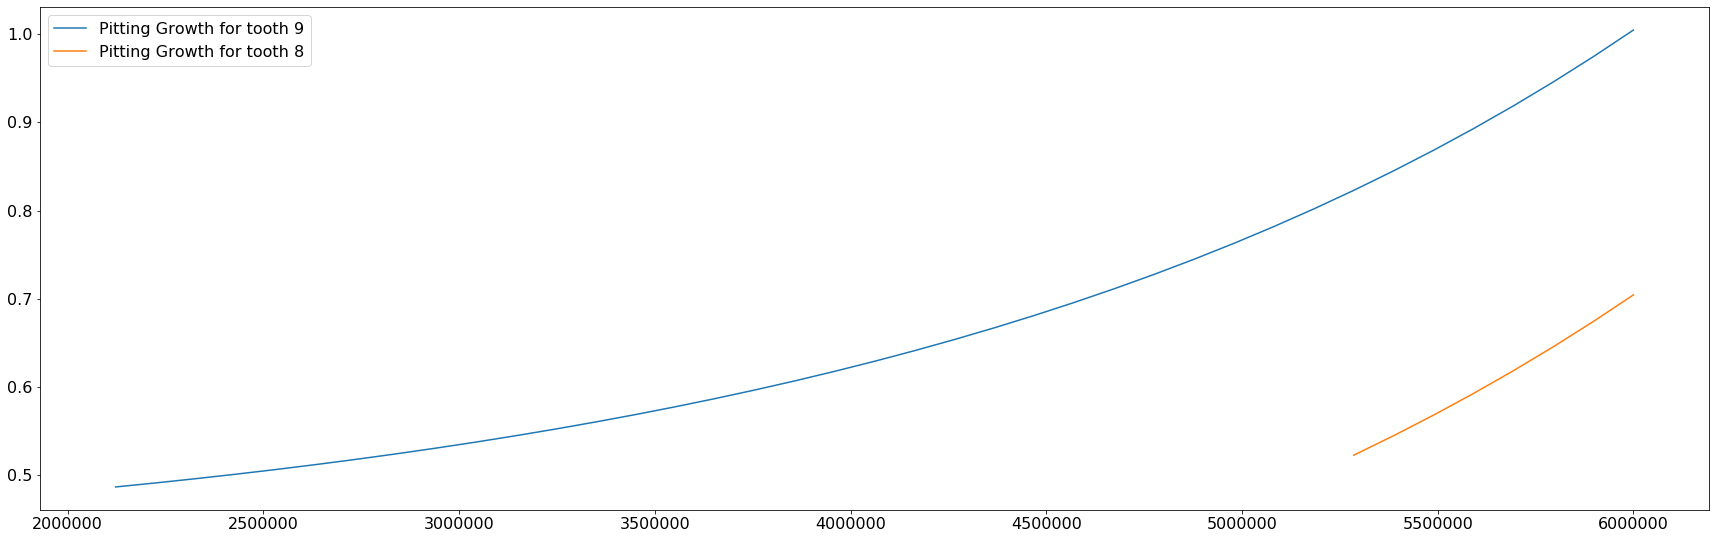

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  1.191385  5.964817e+06     11  8.994626e+06   4.0  0.0401  5.000000e-07   
1  0.172684  5.677857e+06     10  1.196303e+07   4.0  0.0101  5.000000e-07   
2  0.507219  5.648835e+06      9  9.779049e+06   4.0  0.0301  5.000000e-07   

         theta3        n0_old      neol_old  
0  4.000000e-01  5.121978e+06  9.134019e+06  
1  1.776357e-15  5.283728e+06  1.205635e+07  
2  1.776357e-15  5.842420e+06  9.767007e+06

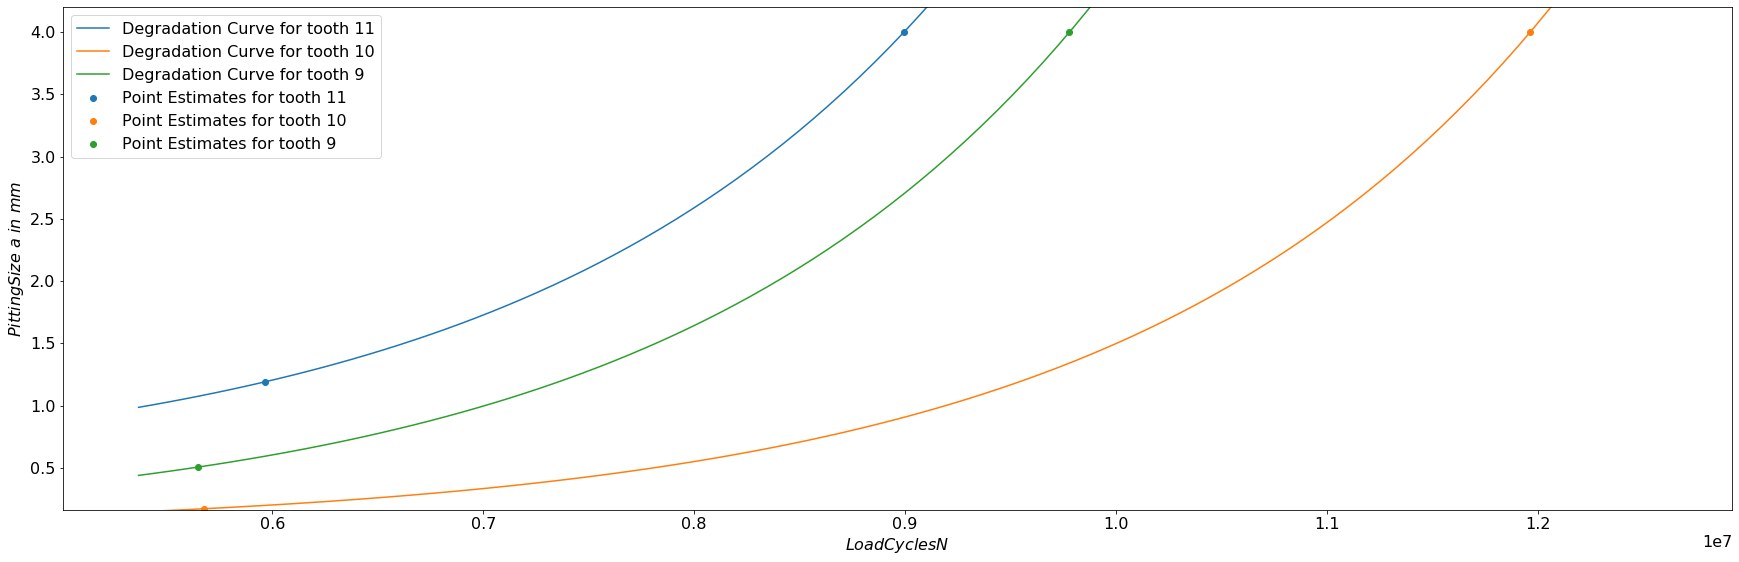

0.000        833333.333   918367.347   1003401.361  1088435.374  \
0    -1.968711    -1.693666    -1.665600    -1.637534    -1.609469   
1    -0.903374    -0.770786    -0.757257    -0.743728    -0.730198   
2    -1.367686    -1.165921    -1.145333    -1.124744    -1.104156   

   1173469.388  1258503.401  1343537.415  1428571.429  1513605.442  ...  \
0    -1.581403    -1.553337    -1.525271    -1.497205    -1.469140  ...   
1    -0.716669    -0.703140    -0.689610    -0.676081    -0.662552  ...   
2    -1.083568    -1.062979    -1.042391    -1.021803    -1.001215  ...   

   4234693.878  4319727.891  4404761.905  4489795.918  4574829.932  \
0    -0.571034    -0.542968    -0.514902    -0.486836    -0.458771   
1    -0.229614    -0.216085    -0.202555    -0.189026    -0.175497   
2    -0.342389    -0.321801    -0.301213    -0.280625    -0.260036   

   4659863.946  4744897.959  4829931.973  4914965.986  5000000.000  
0    -0.430705    -0.402639    -0.374573    -0.346507    -0.318442  
1    -0.161967    -0.148438    -0.134909    -0.121380    -0.107850  
2    -0.239448    -0.218860    -0.198271    -0.177683    -0.157095  

[3 rows x 51 columns]

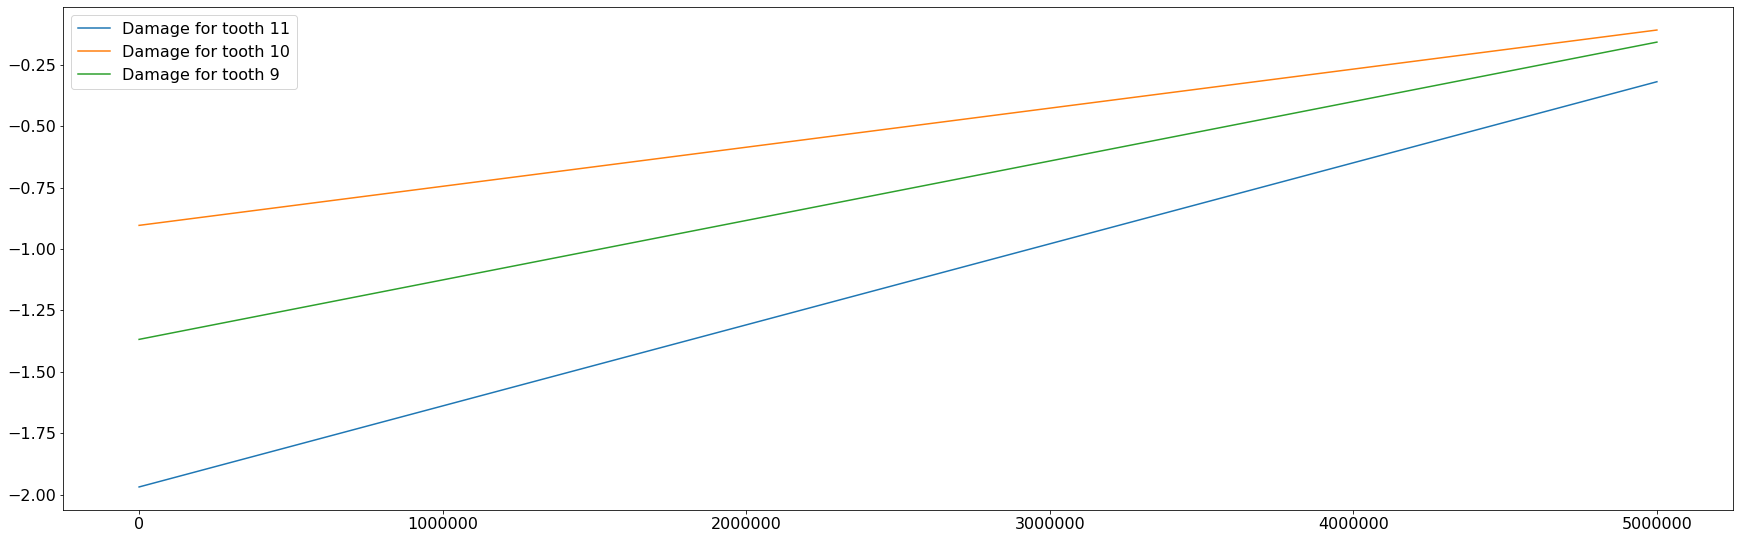

0.000        833333.333   918367.347   1003401.361  1088435.374  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   

   1173469.388  1258503.401  1343537.415  1428571.429  1513605.442  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1          NaN          NaN          NaN          NaN          NaN  ...   
2          NaN          NaN          NaN          NaN          NaN  ...   

   4234693.878  4319727.891  4404761.905  4489795.918  4574829.932  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   

   4659863.946  4744897.959  4829931.973  4914965.986  5000000.000  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  

[3 rows x 51 columns]

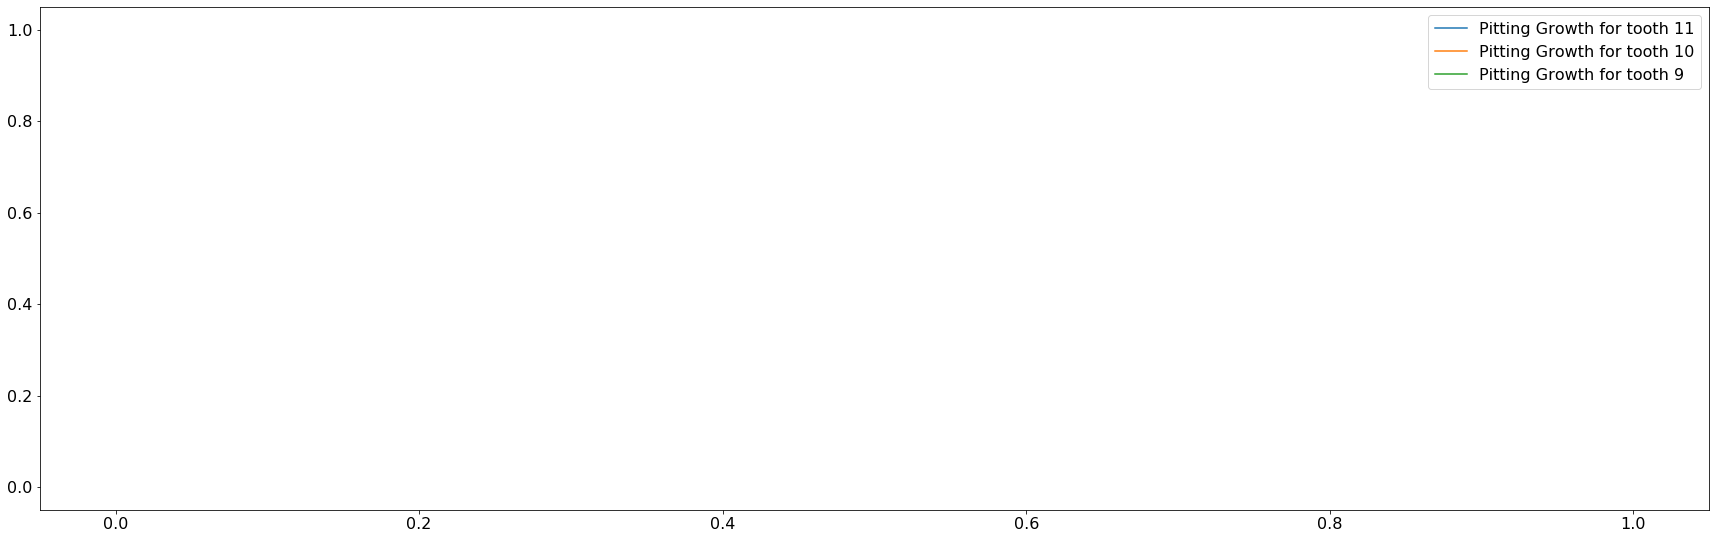

In [27]:
model.Degradation.summary_degradation()

In [28]:
#np.array(model.Degradation.GearIn_Degradation.damage).shape
np.array(model.Degradation.GearIn_Degradation.nolc)[-1]

6000000.0

In [29]:
loads = {'GearIn': {'9': [200], '8': [200]},
         'GearOut': {'11': [188], '10': [194], '9': [200]}}

for nolc in np.linspace(6.1e6, 10e6, 40):
    statei = model.Degradation.run_degradation(nolc, loads)

In [30]:
pd.DataFrame(statei['GearIn'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0       8.0       9.0   \
$a_{10000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN  4.567236  4.867236   
$d_{10000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.060102  1.057332   

                10.0  
$a_{10000000}$   NaN  
$d_{10000000}$   NaN

In [31]:
pd.DataFrame(statei['GearOut'])

1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0       9.0   \
$a_{10000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.941453   
$d_{10000000}$   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.649966   

                    10.0      11.0  12.0  
$a_{10000000}$  0.412815  1.566451   NaN  
$d_{10000000}$  0.277331  0.256080   NaN

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  0.483431  2.038990e+06      9  9.568328e+06   4.0  0.0301  5.000000e-07   
1  0.507219  5.209652e+06      8  9.728413e+06   4.0  0.0301  5.000000e-07   

   theta3        n0_old      neol_old  
0     0.4  5.121978e+06  9.432578e+06  
1     0.1  5.283728e+06  9.767007e+06

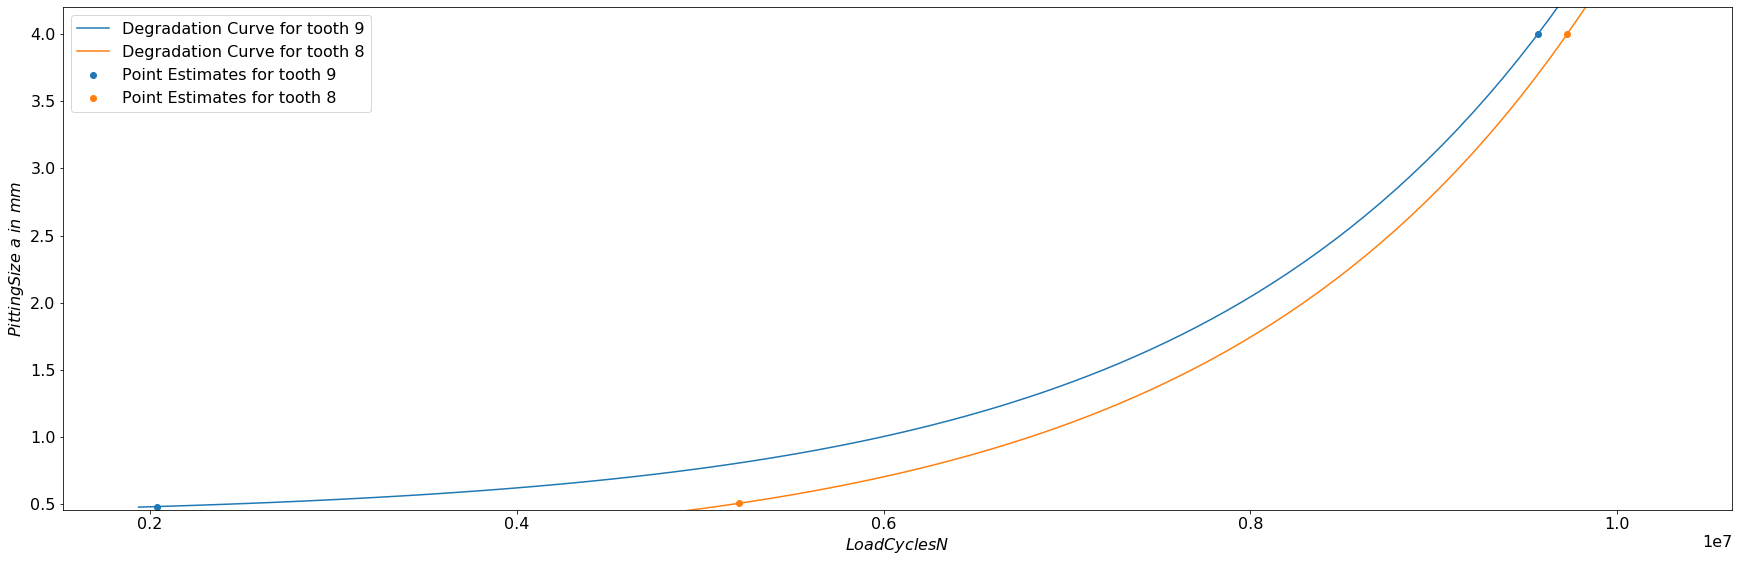

0.000000e+00  1.000000e+06  1.102041e+06  1.204082e+06  1.306122e+06  \
0     -0.270806     -0.137992     -0.124440     -0.110887     -0.097335   
1     -1.152894     -0.931594     -0.909013     -0.886431     -0.863849   

   1.408163e+06  1.510204e+06  1.612245e+06  1.714286e+06  1.816327e+06  ...  \
0     -0.083782     -0.070230     -0.056678     -0.043125     -0.029573  ...   
1     -0.841268     -0.818686     -0.796105     -0.773523     -0.750941  ...   

   9.100000e+06  9.200000e+06  9.300000e+06  9.400000e+06  9.500000e+06  \
0      0.937800      0.951081      0.964362      0.977644      0.990925   
1      0.860932      0.883062      0.905192      0.927322      0.949452   

   9.600000e+06  9.700000e+06  9.800000e+06  9.900000e+06  1.000000e+07  
0      1.004206      1.017488      1.030769      1.044051      1.057332  
1      0.971582      0.993712      1.015842      1.037972      1.060102  

[2 rows x 91 columns]

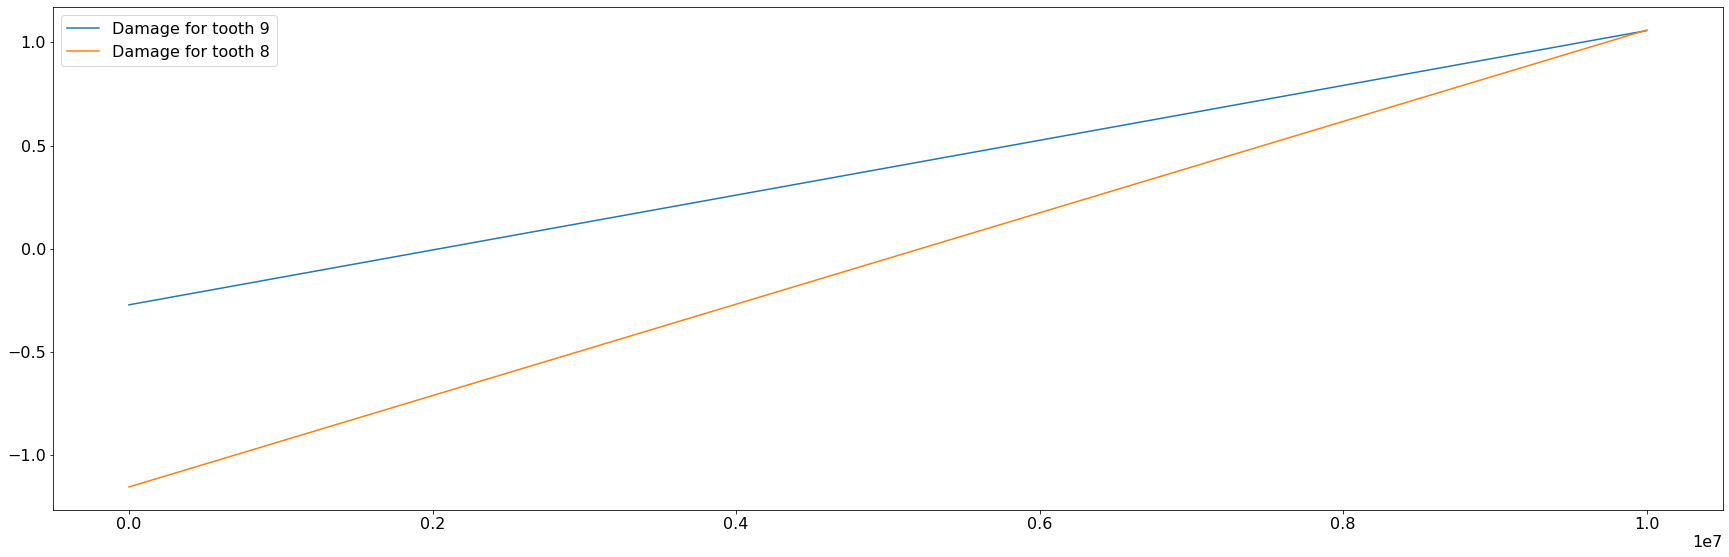

0.000000e+00 1.000000e+06 1.102041e+06 1.204082e+06 1.306122e+06  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   

  1.408163e+06 1.510204e+06 1.612245e+06 1.714286e+06 1.816327e+06  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1          NaN          NaN          NaN          NaN          NaN  ...   

          9.100000e+06          9.200000e+06          9.300000e+06  \
0  [3.248435490279234]    [3.39447790082223]    [3.54800806587116]   
1  [2.948435490279216]  [3.0944779008222083]  [3.2480080658711374]   

           9.400000e+06          9.500000e+06          9.600000e+06  \
0  [3.7094098908089403]   [3.879086964268375]   [4.057463567313944]   
1  [3.4094098908089197]  [3.5790869642683503]  [3.7574635673139207]   

          9.700000e+06          9.800000e+06         9.900000e+06  \
0  [4.244985734365496]  [4.4421223685165865]  [4.649366414036482]   
1  [3.944985734365469]   [4.142122368516558]  [4.349366414036455]   

          1.000000e+07  
0  [4.867236088987582]  
1  [4.567236088987562]  

[2 rows x 91 columns]

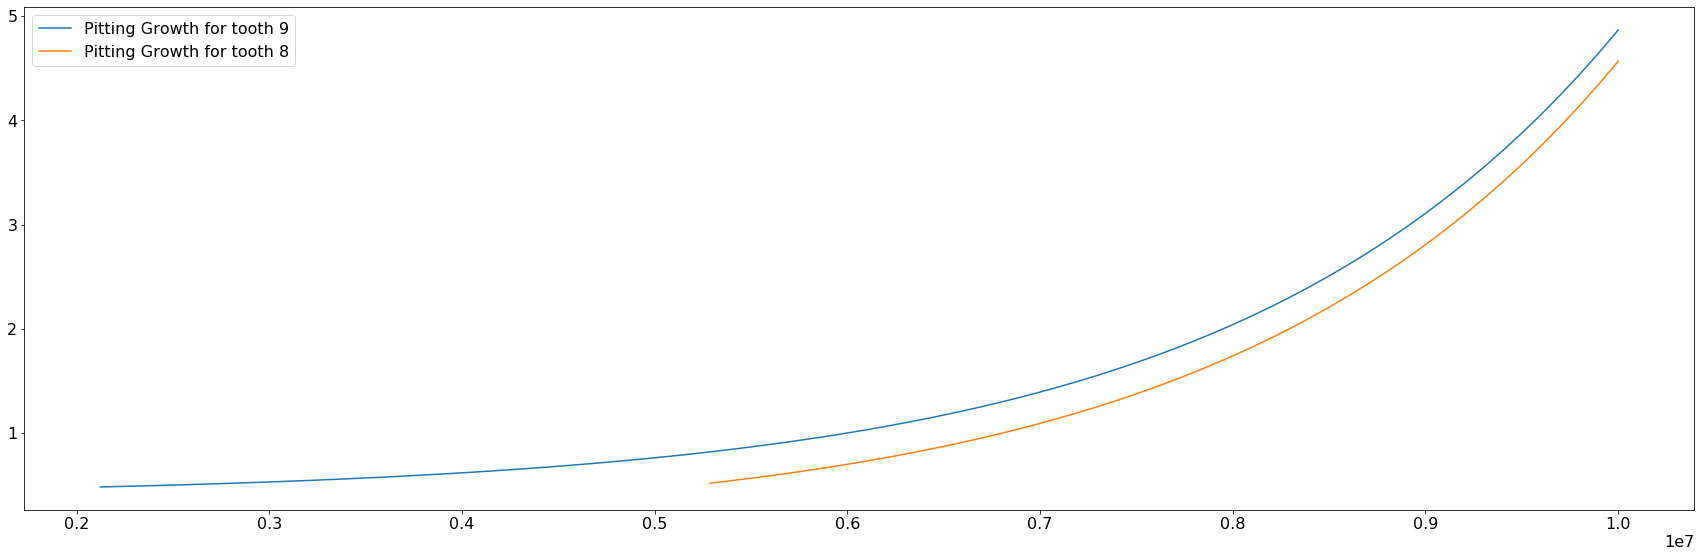

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  1.191385  5.964817e+06     11  8.994626e+06   4.0  0.0401  5.000000e-07   
1  0.172684  5.677857e+06     10  1.196303e+07   4.0  0.0101  5.000000e-07   
2  0.507219  5.648835e+06      9  9.779049e+06   4.0  0.0301  5.000000e-07   

         theta3        n0_old      neol_old  
0  4.000000e-01  5.121978e+06  9.134019e+06  
1  1.776357e-15  5.283728e+06  1.205635e+07  
2  1.776357e-15  5.842420e+06  9.767007e+06

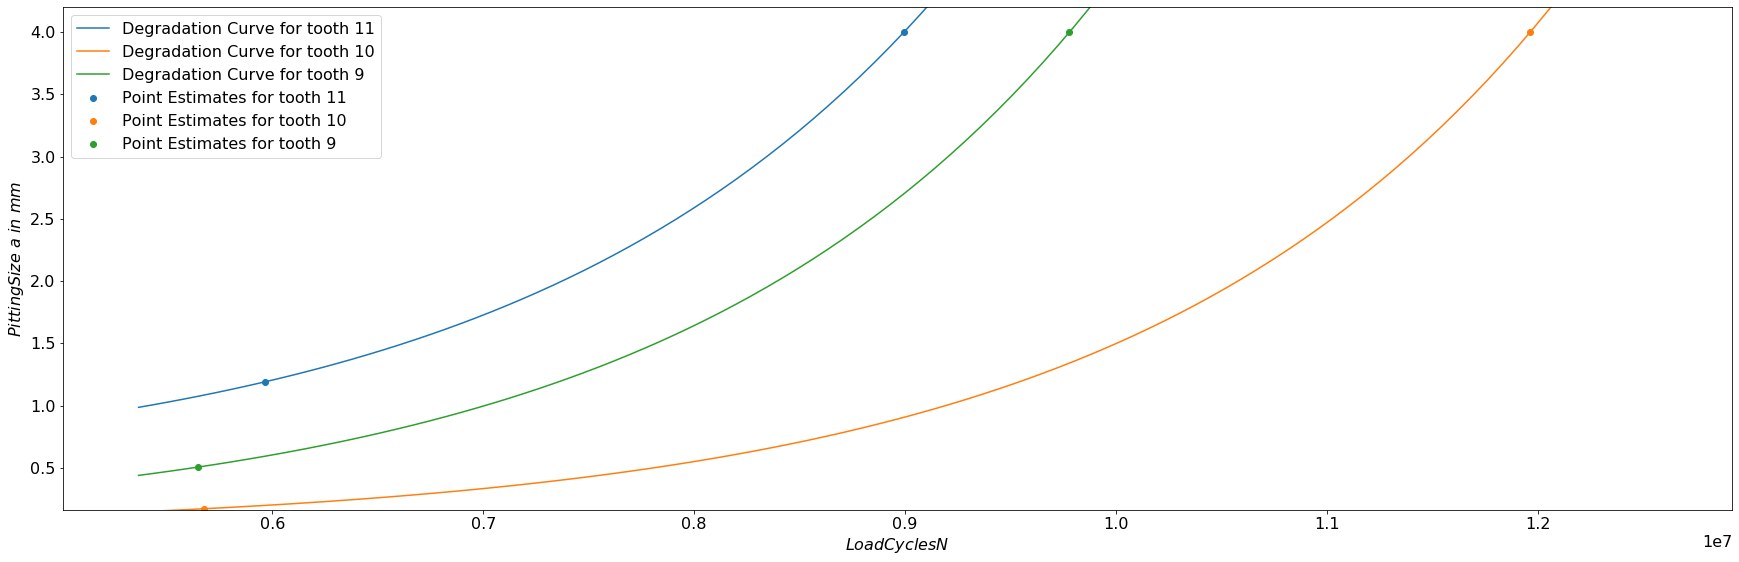

0.000        833333.333   918367.347   1003401.361  1088435.374  \
0    -1.968711    -1.693666    -1.665600    -1.637534    -1.609469   
1    -0.903374    -0.770786    -0.757257    -0.743728    -0.730198   
2    -1.367686    -1.165921    -1.145333    -1.124744    -1.104156   

   1173469.388  1258503.401  1343537.415  1428571.429  1513605.442  ...  \
0    -1.581403    -1.553337    -1.525271    -1.497205    -1.469140  ...   
1    -0.716669    -0.703140    -0.689610    -0.676081    -0.662552  ...   
2    -1.083568    -1.062979    -1.042391    -1.021803    -1.001215  ...   

   7583333.333  7666666.667  7750000.000  7833333.333  7916666.667  \
0     0.126812     0.141175     0.155538     0.169901     0.184264   
1     0.190665     0.200295     0.209924     0.219554     0.229183   
2     0.468377     0.488554     0.508730     0.528907     0.549083   

   8000000.000  8083333.333  8166666.667  8250000.000  8333333.333  
0     0.198627     0.212990     0.227354     0.241717     0.256080  
1     0.238813     0.248442     0.258072     0.267701     0.277331  
2     0.569260     0.589436     0.609613     0.629789     0.649966  

[3 rows x 91 columns]

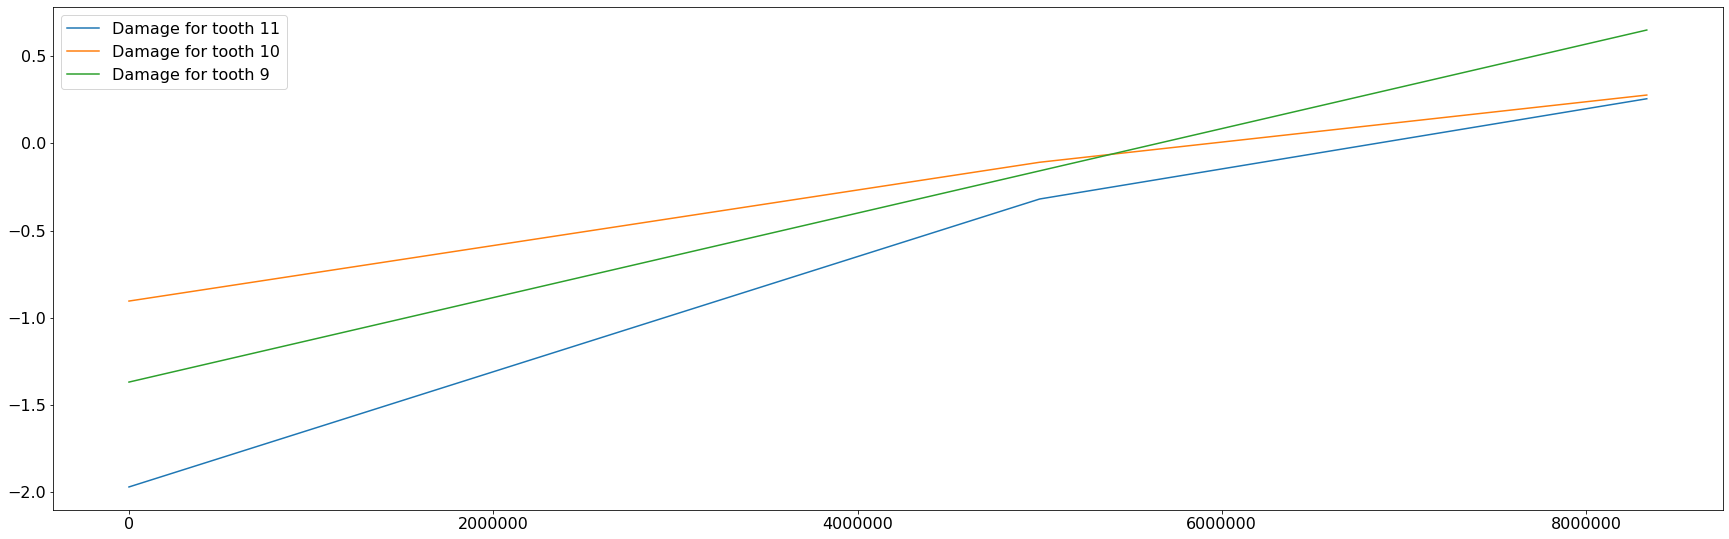

0.000       833333.333  918367.347  1003401.361 1088435.374 1173469.388  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   

  1258503.401 1343537.415 1428571.429 1513605.442  ...            7583333.333  \
0         NaN         NaN         NaN         NaN  ...   [1.3590021892834545]   
1         NaN         NaN         NaN         NaN  ...  [0.31439344153837384]   
2         NaN         NaN         NaN         NaN  ...   [1.3343396953569202]   

             7666666.667           7750000.000           7833333.333  \
0    [1.380097416777209]  [1.4016566769678358]  [1.4236901774656099]   
1  [0.32405291035411504]   [0.334009157942379]    [0.34427130269395]   
2   [1.3911117203302175]  [1.4502992185620753]  [1.5120049616593534]   

             7916666.667           8000000.000            8083333.333  \
0   [1.4462083504354697]  [1.4692218566997883]    [1.492741592407179]   
1  [0.35484874316552867]   [0.365751166289825]  [0.37698855700882344]   
2   [1.5763360939353164]  [1.6434043159976426]    [1.713326083333662]   

             8166666.667           8250000.000            8333333.333  
0    [1.516778693407898]  [1.5413445396333674]   [1.5664507622148114]  
1  [0.38857120705552817]  [0.4005097239442908]  [0.41281504151955684]  
2    [1.786222806356207]   [1.862221058436075]   [1.9414528009285834]  

[3 rows x 91 columns]

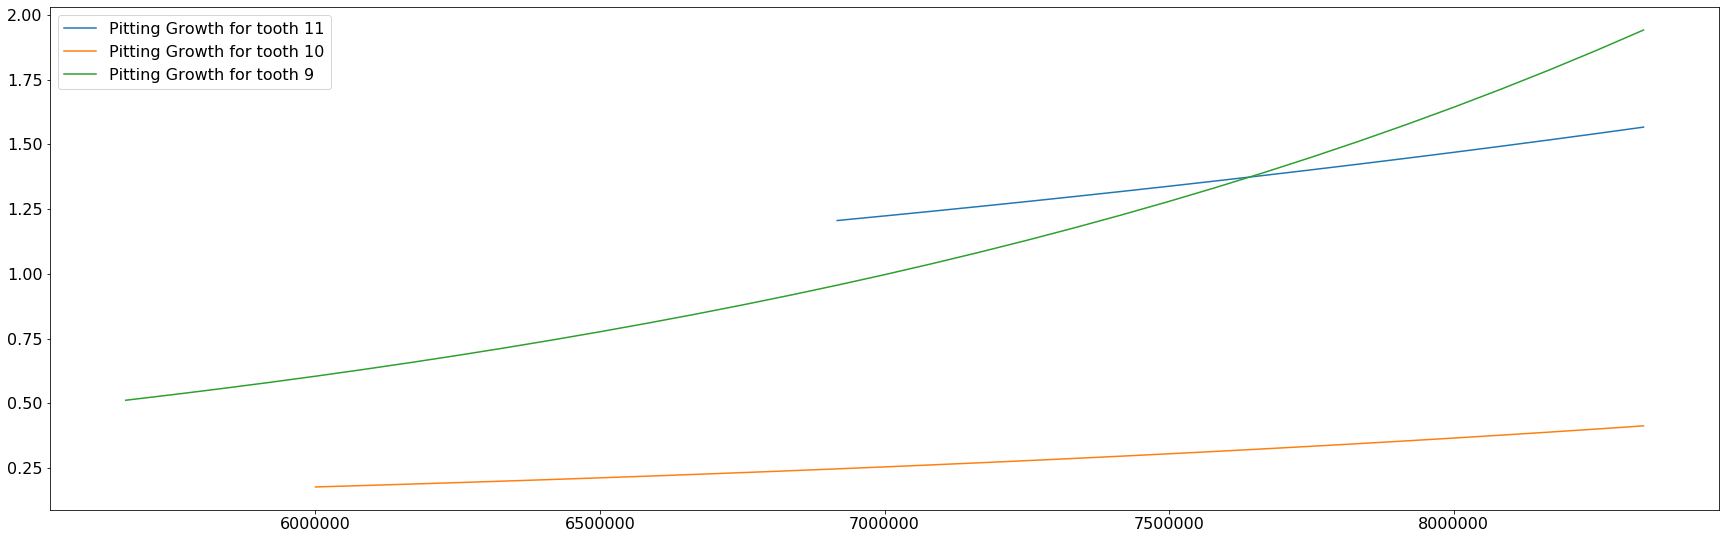

In [32]:
model.Degradation.summary_degradation()

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Run <u>All</u> Vibration and Degradation</b></p>
</div>
<br>
<p>Initialize Degradation Module: <b>initialize(torque)</b></p>
<p>Input Arguments:</p>
<li>torque: input torque</li>
<p>Returns:</p>

In [33]:
model.initialize(torque_in)

D:\Anaconda3\henss\04_PHM\Gearbox\gearbox\degradation\helper\__init__.py:164: RuntimeWarning: invalid value encountered in log
  x = np.log((y - theta3) / theta1) / theta2


<p>Run Vibration and Degradation: <b>run(nolc, output=True)</b></p>
<p>Input Arguments:</p>
<li>nolc: current number of load cycle (must be greater than the previous given nolc)</li>
<li>output: if true returns vibration signal</li>
<p>Returns:</p>
<li>vibration (if output is True)</li>

<p>Set Torque for upcoming cycles: <b>set(nolc, torque)</b></p>
<p>Input Arguments:</p>
<li>nolc: current number of load cycle (must be <b>equal</b> to the previous nolc in run())</li>
<li>torque: input torque</li>
<p>Returns:</p>


In [34]:
for nolc in np.linspace(1e6, 6e6, 10):
    vibration = model.run(nolc, output=True)
    model.set(nolc, torque_in)

<p>Summarize Vibration and Degradation: <b>summary()</b></p>

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  0.483431  2.038990e+06      8  9.568328e+06   4.0  0.0301  5.000000e-07   
1  0.507219  5.209652e+06      4  9.728413e+06   4.0  0.0301  5.000000e-07   

   theta3        n0_old      neol_old  
0     0.4  5.121978e+06  9.432578e+06  
1     0.1  5.283728e+06  9.767007e+06

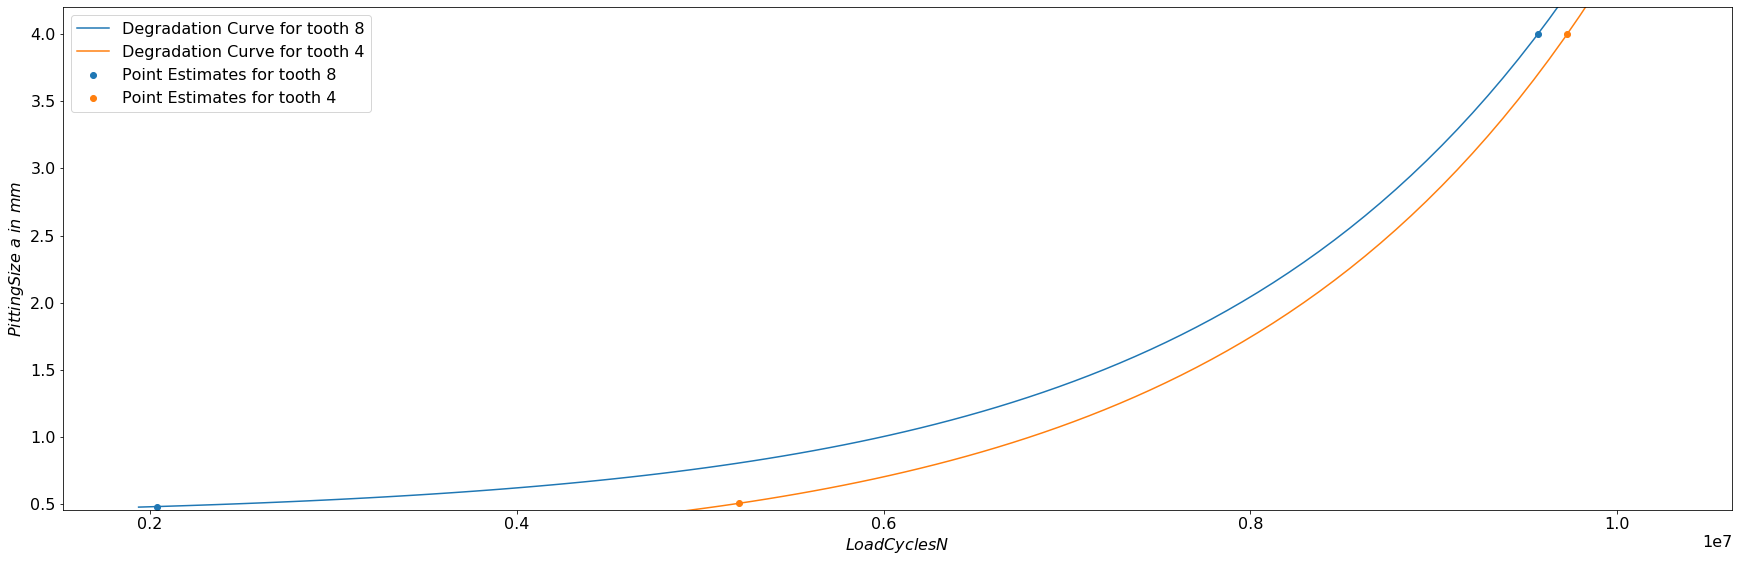

0.000000e+00  1.000000e+06  1.555556e+06  2.111111e+06  2.666667e+06  \
0     -0.270806     -0.166917     -0.109201     -0.051485      0.006231   
1     -1.152894     -0.870056     -0.712924     -0.555792     -0.398660   

   3.222222e+06  3.777778e+06  4.333333e+06  4.888889e+06  5.444444e+06  \
0      0.063948      0.121664      0.179380      0.237096      0.294812   
1     -0.241528     -0.084396      0.072736      0.229868      0.387000   

   6.000000e+06  
0      0.352528  
1      0.544132

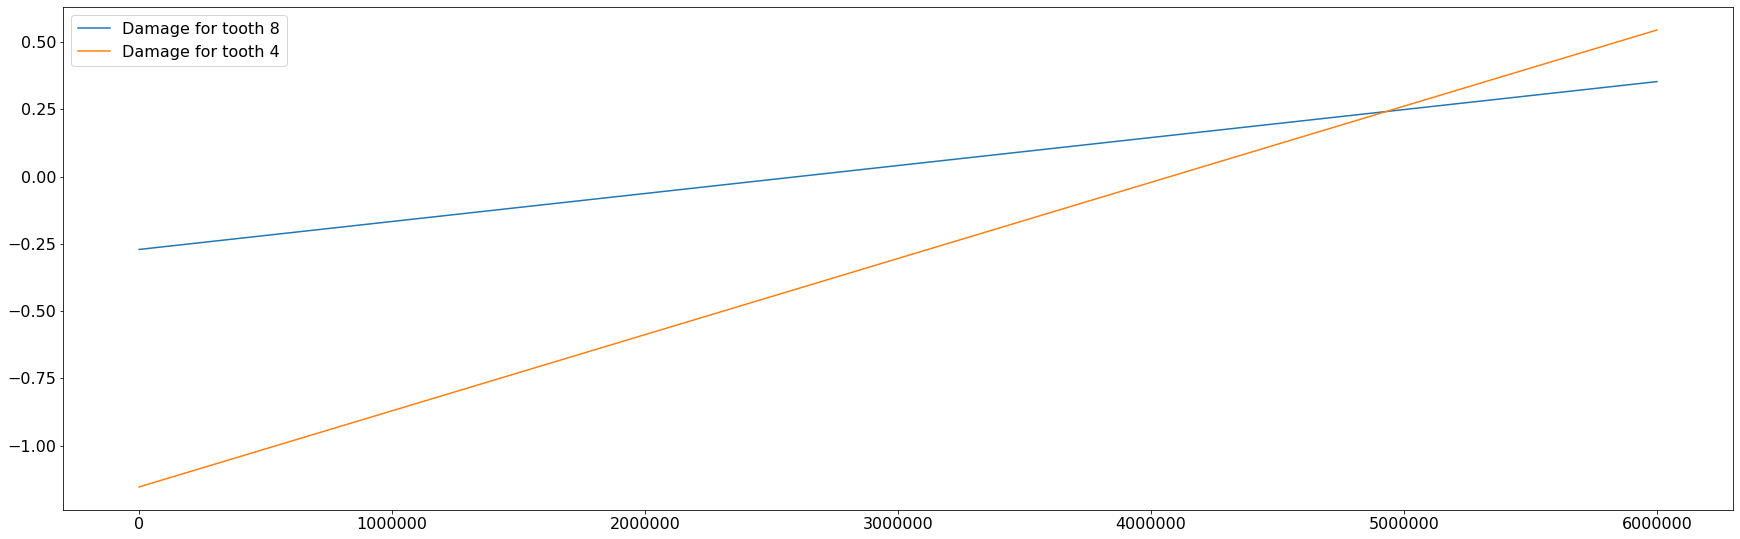

0.000000e+00 1.000000e+06 1.555556e+06 2.111111e+06          2.666667e+06  \
0          NaN          NaN          NaN          NaN  [0.4854113743343453]   
1          NaN          NaN          NaN          NaN                   NaN   

           3.222222e+06          3.777778e+06          4.333333e+06  \
0  [0.5061402557461948]  [0.5318999252461099]  [0.5639113280594588]   
1                   NaN                   NaN  [0.5799531888817628]   

           4.888889e+06          5.444444e+06          6.000000e+06  
0  [0.6036917262544688]  [0.6531266132471021]  [0.7145590815696785]  
1  [0.7845142928615998]  [1.0762614938000692]  [1.4923544244669906]

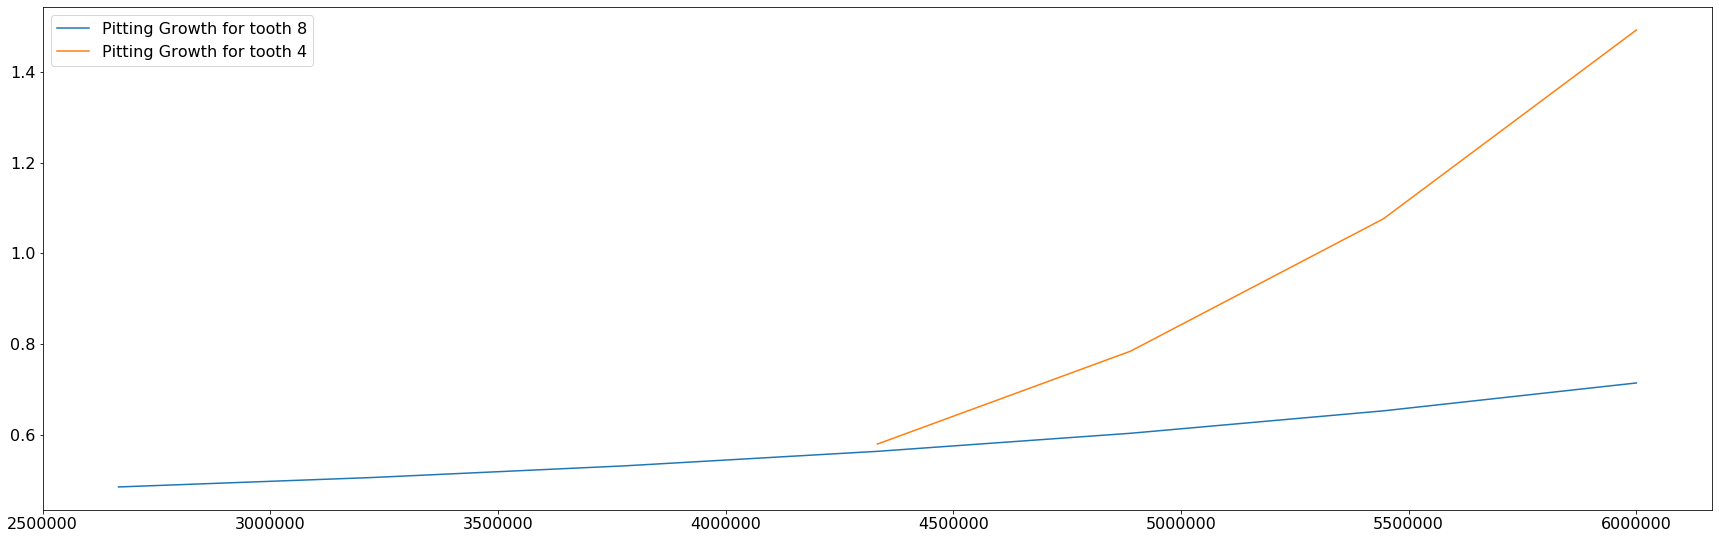

a0            n0  tooth          neol  aeol  theta1        theta2  \
0  1.191385  5.964817e+06      8  8.994626e+06   4.0  0.0401  5.000000e-07   
1  0.172684           NaN     11  9.537522e+06   4.0  0.0001  1.100000e-06   
2  0.507219  5.648835e+06      9  9.779049e+06   4.0  0.0301  5.000000e-07   

         theta3        n0_old      neol_old  
0  4.000000e-01  5.121978e+06  9.134019e+06  
1  4.000000e-01  5.283728e+06  9.432578e+06  
2  1.776357e-15  5.842420e+06  9.767007e+06

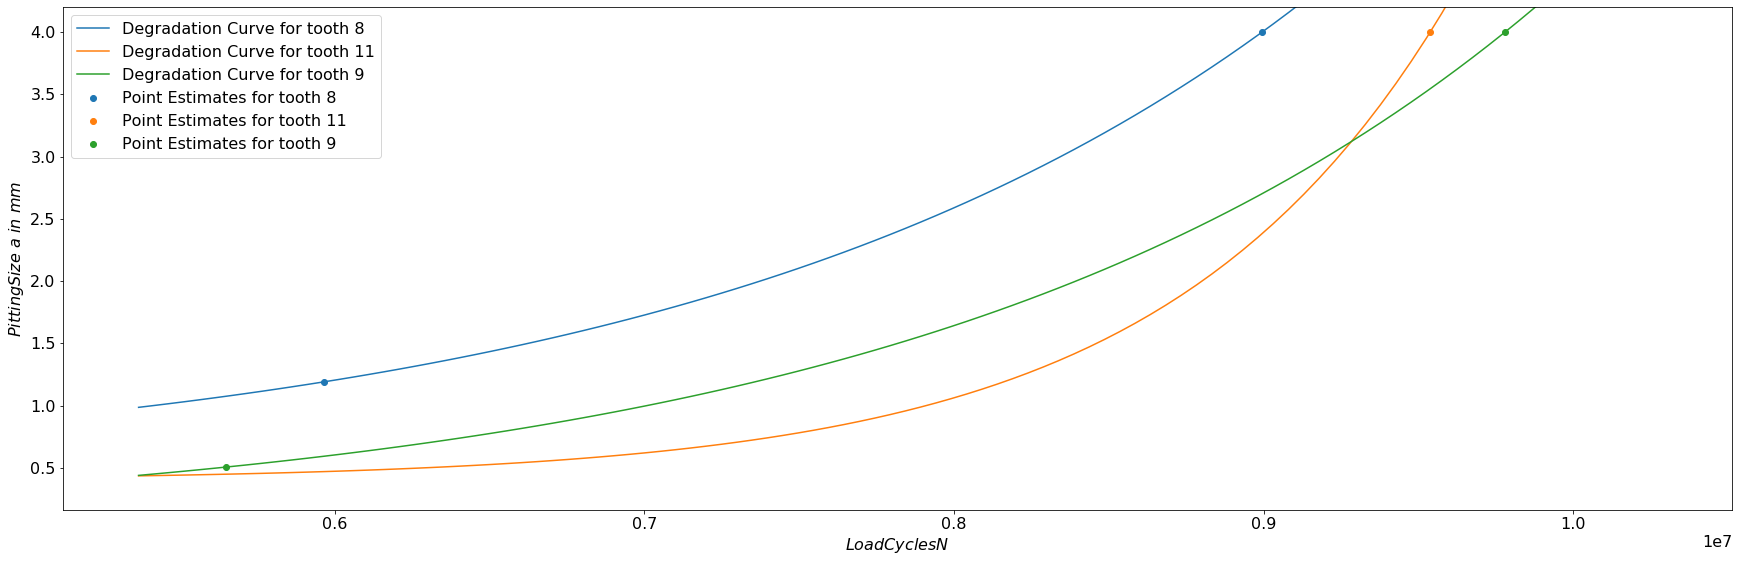

0.000        833333.333   1296296.296  1759259.259  2222222.222  \
0    -1.968711    -1.689833    -1.534901    -1.379969    -1.225038   
1          NaN          NaN          NaN          NaN          NaN   
2    -1.367686    -1.162923    -1.049165    -0.935408    -0.821651   

   2685185.185  3148148.148  3611111.111  4074074.074  4537037.037  \
0    -1.070106    -0.915174    -0.760242    -0.605310    -0.450378   
1          NaN          NaN          NaN          NaN          NaN   
2    -0.707893    -0.594136    -0.480378    -0.366621    -0.252864   

   5000000.000  
0    -0.295446  
1          NaN  
2    -0.139106

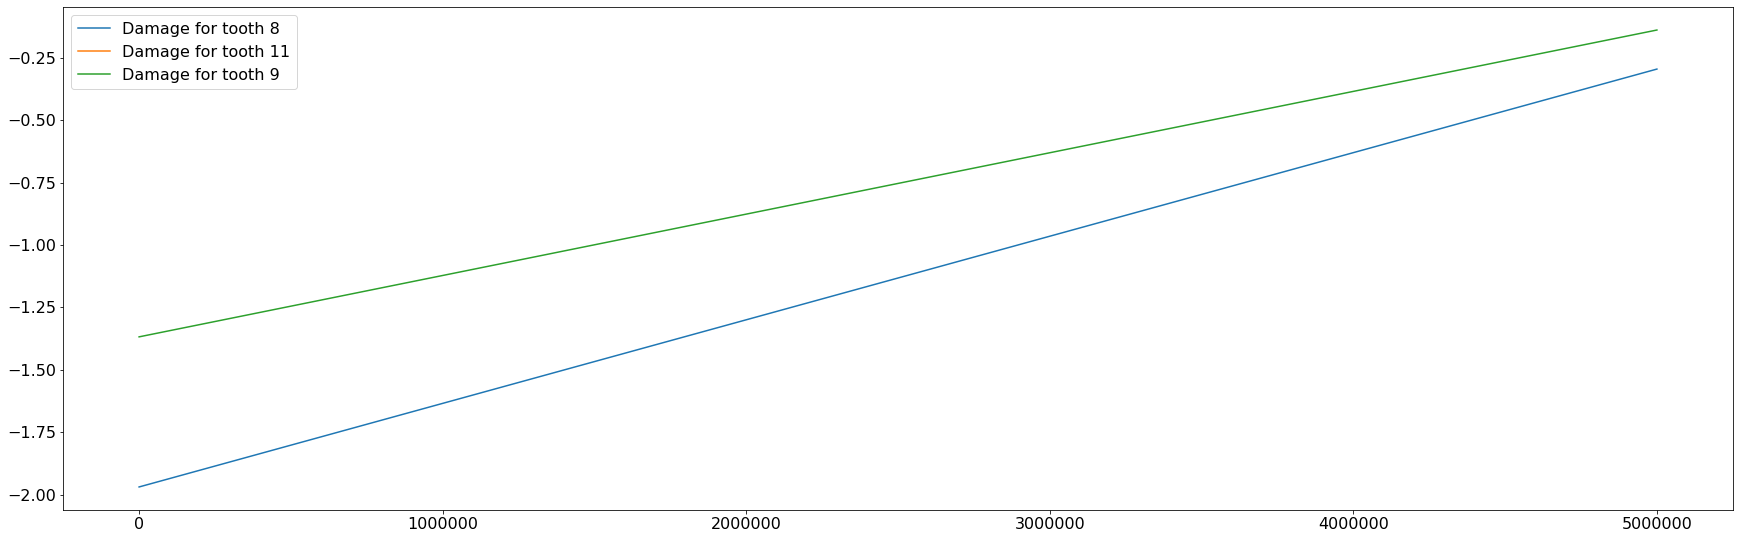

0.000       833333.333  1296296.296 1759259.259 2222222.222 2685185.185  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1       [nan]       [nan]       [nan]       [nan]       [nan]       [nan]   
2         NaN         NaN         NaN         NaN         NaN         NaN   

  3148148.148 3611111.111 4074074.074 4537037.037 5000000.000  
0         NaN         NaN         NaN         NaN         NaN  
1       [nan]       [nan]       [nan]       [nan]       [nan]  
2         NaN         NaN         NaN         NaN         NaN

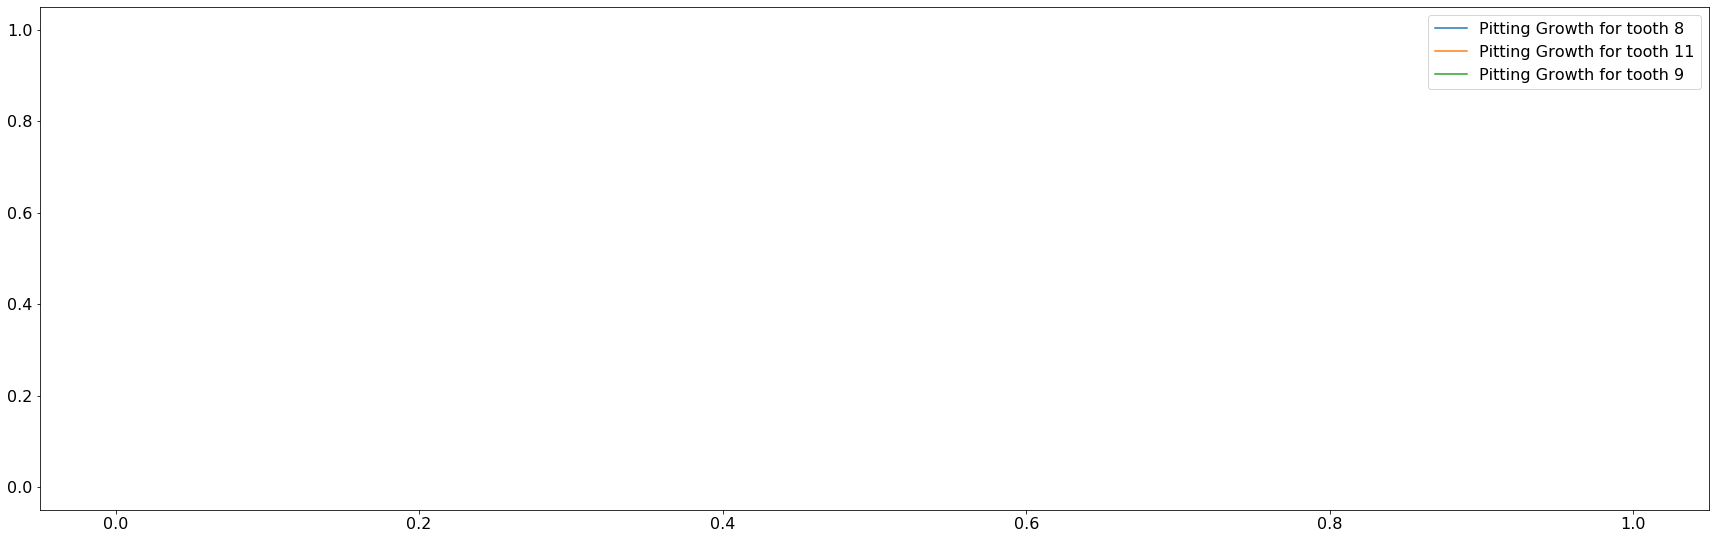

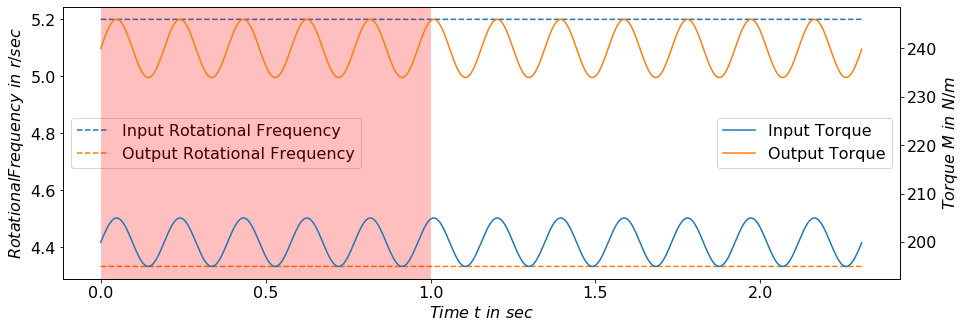

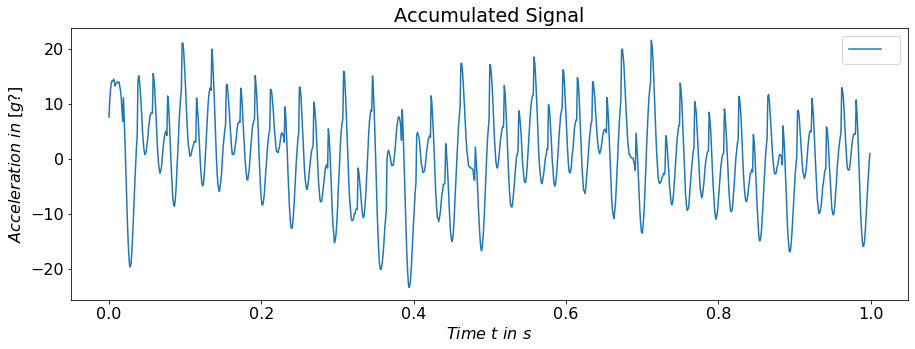

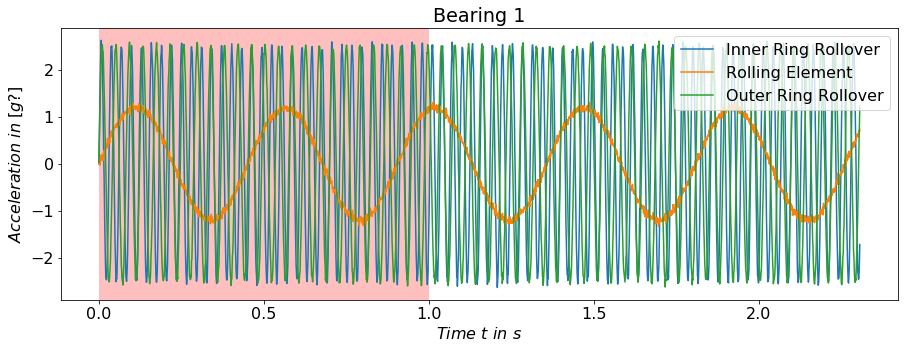

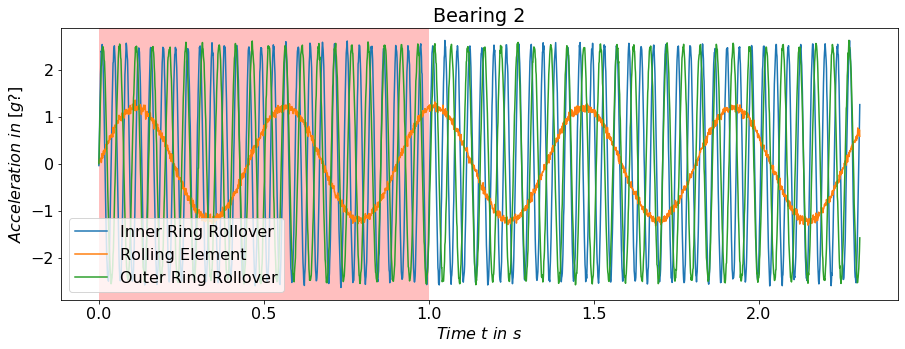

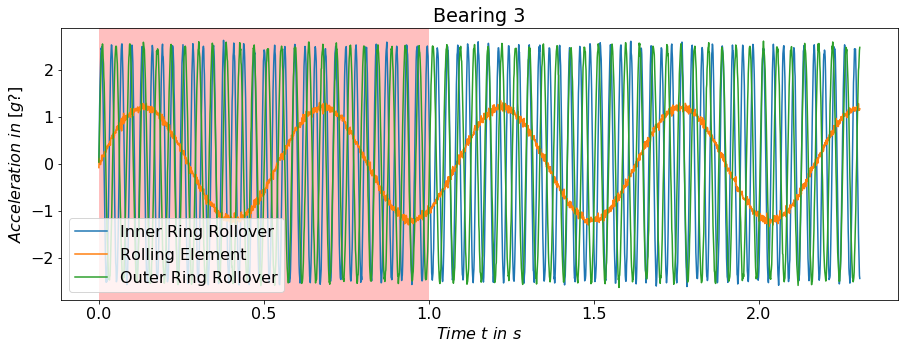

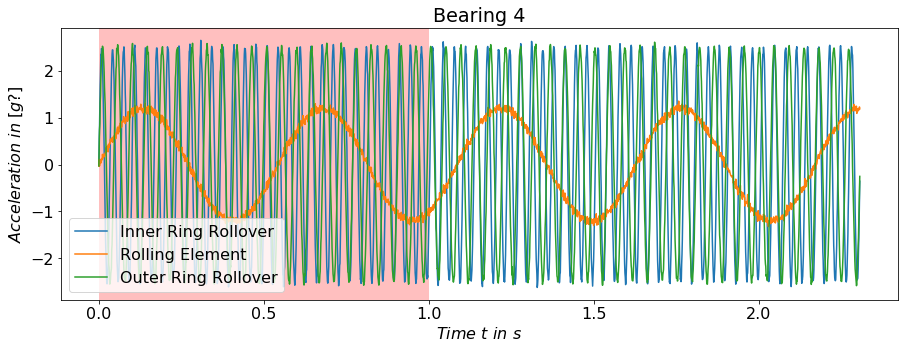

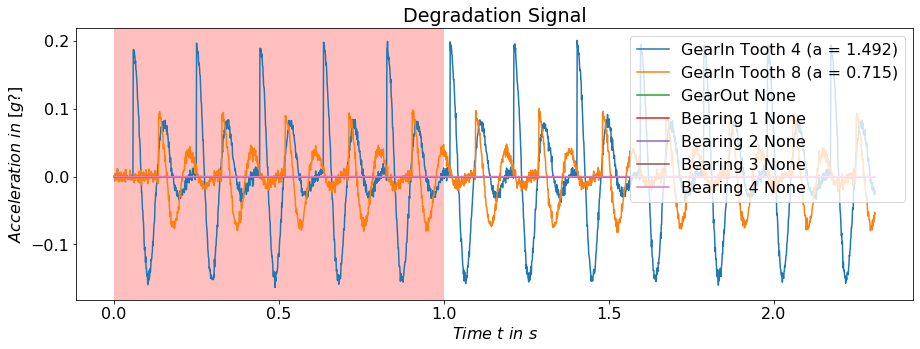

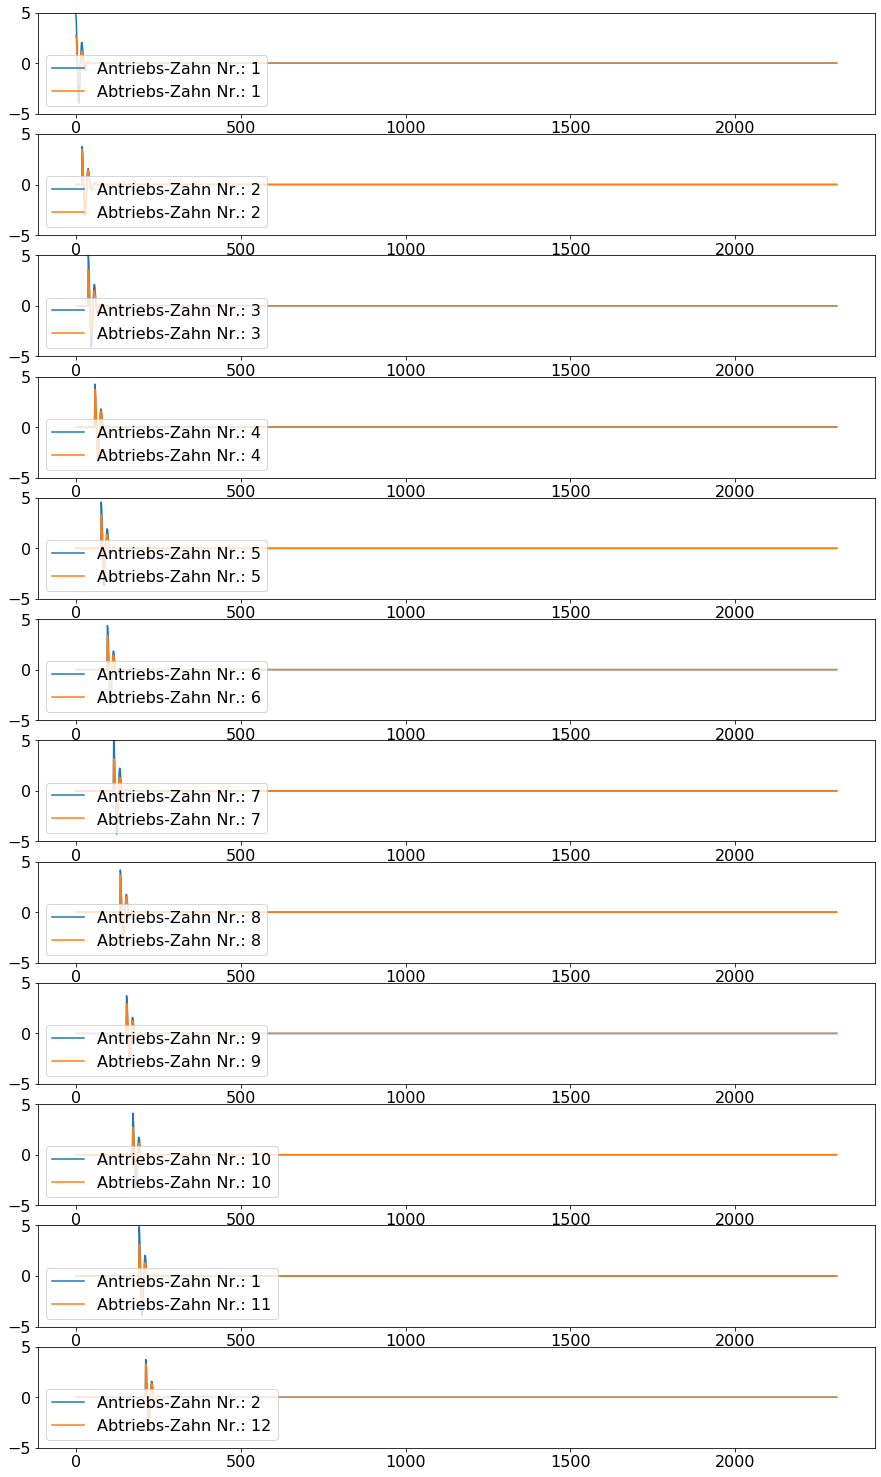

In [35]:
model.summary()

<div style="background-color:rgb(0, 81, 158);color:white;padding:1em;letter-spacing:0.1em;font-size:2em;align=center">
<p><b>Details and Theory</b></p>
</div>

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Module Structure</b></p>
</div>
<br>
<img src="__pictures/Modules.png" width="80%">


<li>GearBox Simulation Toolbox is structured in Modules</li>
<li>Top Modules are accesing lower Modules</li>
<li>Helper-Module is used by Modules on the same level</li>
<li>Modules consisting of several Module Methods</li>

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Vibration Element Definition</b></p>
</div>
<br>
<h3>Gear Element</h3>
<p>Keyword Attributes: <br>
<ol>
    <li><b>no_teeth: Number of teeth</b> <br></li>
    <li>signal: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>ampl_method: <a href="AmplitudeMethod">Method to create Signal Amplitude</a><br></li>
    <li>ampl_attributes: <a href="AmplitudeMethod">Attributes regarding the Method to create Signal Amplitude</a><br></li>
    <li>noise_method:  <a href="AmplitudeMethod">Method to create Signal Noise (repeat methods are not working)</a><br></li>
    <li>noise_attributes: <a href="AmplitudeMethod">Attributes regarding the Method to create Signal Noise</a><br></li>
    <li>torq_method:  <a href="TorqueMethod">Method to create Signal Noise (repeat methods are not working)</a><br></li>
    <li>torq_attributes: <a href="TorqueAmplitudeMethod">Attributes regarding the Method to create Signal Noise</a><br></li>
</ol>
</p>

<p>Gear Element:</p>

In [36]:
Gear = {'no_teeth': 10,                                         # Number of teeth
        'signal': 'gausspulse',                                 # Signal type for gear
        'ampl_method': 'gaussian_repeat',                       # Amplitude Method for inner gear
        'ampl_attributes': {'mu': 4, 'sigma': 0.5},             # Attributes regarding Amplitude Method for gear signal
        'noise_method': None,                                   # Noise Method for inner gear
        'noise_attributes': {'mu': 0, 'sigma': 0.25},           # Attributes regarding Noise Method for gear signal
        'torq_method': None,                                    # Torque Influence Method for inner gear
        'torq_attributes': {'scale_min': 0,
                            'scale_max': 0.2,
                            'value_min': 0,
                            'value_max': 50,
                            'norm_divisor': 200,
                            'exponent': 2},
        }

<p>Modelling:</p>

<li>The chosen Non-Stationary Signal is repeated every tooth mesh</li>
<li>Repeat Methods are modeling the same amplitude at tooth i</li>
<li>Using const_repeat argument constant must be a list of length no_teeth</li>

<h3>Bearing Element</h3>
<p>Keyword Attributes: <br>

<ol>
    <li><b>no_elements: Number of rolling elements</b> <br></li>
    <li>signal_*: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>ampl_method_*: <a href="AmplitudeMethod">Method to create Signal Amplitude</a><br></li>
    <li>ampl_attributes_*: <a href="AmplitudeMethod">Attributes regarding the Method to create Signal Amplitude</a><br></li>
    <li>noise_method_*:  <a href="AmplitudeMethod">Method to create Signal Noise (repeat methods are not working)</a><br></li>
    <li>noise_attributes_*: <a href="AmplitudeMethod">Attributes regarding the Method to create Signal Noise</a><br></li>
    <li>torq_method_*:  <a href="TorqueMethod">Method to create Signal Noise (repeat methods are not working)</a><br></li>
    <li>torq_attributes_*: <a href="TorqueAmplitudeMethod">Attributes regarding the Method to create Signal Noise</a><br></li>
</ol>
</p>

<p>*: Can be 'iring' (inner ring), 'relement' (rolling element) or 'oring' (ourter ring)</p>



In [37]:
Bearing =   {'no_elements': 11,                                    # Number of Rolling Elements
             # Inner Ring Rollover
             'signal_iring': 'sine',                               # Signal type for inner cage
             'ampl_method_iring': 'const',                         # Amplitude Method for inner cage signal (Repeat methods are not working for bearings)
             'ampl_attributes_iring': {'constant': 2.5},           # Attributes regarding Amplitude Method for inner cage signal
             'noise_method_iring': 'gaussian',                     # Noise Method for inner gear
             'noise_attributes_iring': {'mu': 0, 'sigma': 0.05},   # Attributes regarding Noise Method for gear signal
             'torq_method_iring': None,                         # Torque Influence Method for rolling element
             'torq_attributes_iring': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                       'scale_max': 0.1,
                                       'value_min': 0,
                                       'value_max': 50,
                                       'norm_divisor': 1,
                                       'exponent': 4},           

             # Rolling Element:
             'signal_relement': 'sine',                            # Signal type for rolling element
             'ampl_method_relement': 'const',                      # Amplitude Method for rolling element signal (Repeat methods are not working for bearings)
             'ampl_attributes_relement': {'constant': 1.2},        # Attributes regarding Amplitude Method for rolling element signal
             'noise_method_relement': 'gaussian',                  # Noise Method for rolling element
             'noise_attributes_relement': {'mu': 0, 'sigma': 0.05},# Attributes regarding Noise Method for gear signal
             'torq_method_relement': None,                         # Torque Influence Method for rolling element
             'torq_attributes_relement': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                          'scale_max': 0.1,
                                          'value_min': 0,
                                          'value_max': 50,
                                          'norm_divisor': 1,
                                          'exponent': 4},
             # Outer Ring Rollover
             'signal_oring': 'sine',                               # Signal type for inner cage
             'ampl_method_oring': 'const',                         # Amplitude Method for inner cage signal (Repeat methods are not working for bearings)
             'ampl_attributes_oring': {'constant': 2.5},           # Attributes regarding Amplitude Method for inner cage signal
             'noise_method_oring': 'gaussian',                     # Noise Method for inner gear
             'noise_attributes_oring': {'mu': 0, 'sigma': 0.05},   # Attributes regarding Noise Method for gear signal
             'torq_method_oring': None,                         # Torque Influence Method for rolling element
             'torq_attributes_oring': {'scale_min': 0,          # Attributes regarding Torque Influence Method for rolling element signal
                                       'scale_max': 0.1,
                                       'value_min': 0,
                                       'value_max': 50,
                                       'norm_divisor': 1,
                                       'exponent': 4},          
            }

<p>Modelling:</p>

<li>The frequencies for the chosen Stationary Signal are estimated by VDI 3832 (Estimation without geometrical dimensions)</li>
<li>Repeat Methods are not working</li>
<li>As approximation factor 0.425 is chosen</li>
<br>
<div class="container">
    <div class="col-lg-6 col-md-6  col-sm-2">
      <img src="__pictures/VDI3832_Bearing_formula.png" width="75%">
    </div>
    <div class="col-lg-6 col-md-6  col-sm-2" >
      <img src="__pictures/VDI3832_Bearing_symbols.png" width="75%">
    </div>
<div>




<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Vibration Methods and Theory</b></p>
</div>
<br>

<p>Module Methods Structure:</p>

<img src="__pictures/Vibration_Method.png" width="100%">




<p>Required Inputs:</p>
<li>General Input Arguments (previous slides)</li>
<li>Vibration Method Definition for each Element (see following slides)</li>
<li>State of Degradation (given by degradation model)</li>

<p>Methods and Returns:</p>
<li>run(): Vibration Signal (for state s<sub>p</sub> = n<sub>lc</sub> based on previous torque<sub>p-1</sub>)</li>
<li>set(): Loads per tooth/bearing (based on current torque<sub>p</sub>)</li>


<h3>Element Method</h3>
<br>

<li>Creating Base Signals for Bearing and Gear Elements</li>
<li>Amplitude of +-1</li>
<li>For Bearing choose any stationary signal: 'sine'</li>
<li>For Gear choose any nonstationary signal: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.gausspulse.html">'gausspulse'</a> <br>
</li>


<p>Example Non-Stationary Sine Signal</p>

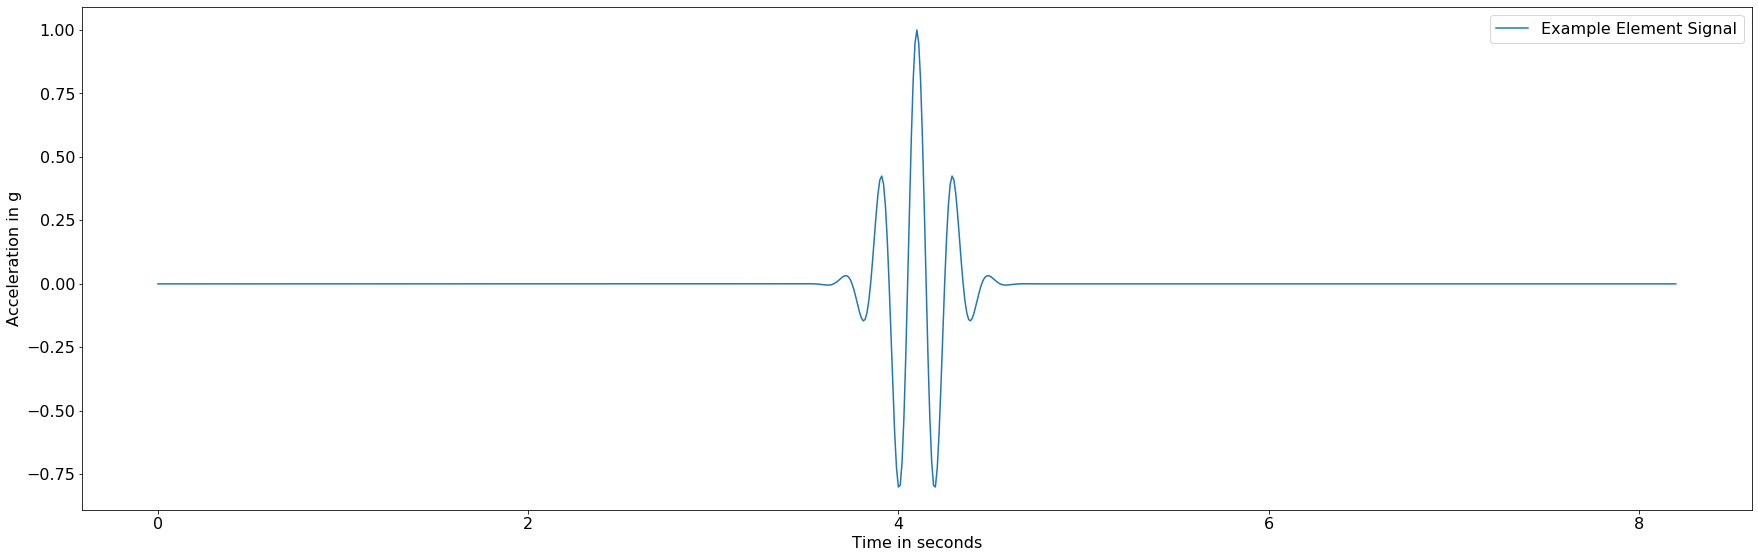

In [38]:
from scipy.signal import gausspulse
fi, fs = 5, 100
time_vector = gf.get_sample_time_torque(fi, fs, 21, 41)
element_signal = gausspulse(np.linspace(-max(time_vector)/2, max(time_vector)/2, time_vector.size), fc=fi, bw=0.5, bwr=-6, tpr=-60, retquad=False, retenv=False) # Nm | array

plt.plot(time_vector, element_signal)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Example Element Signal'])
plt.show()

<p>Example Stationary Sine Signal</p>

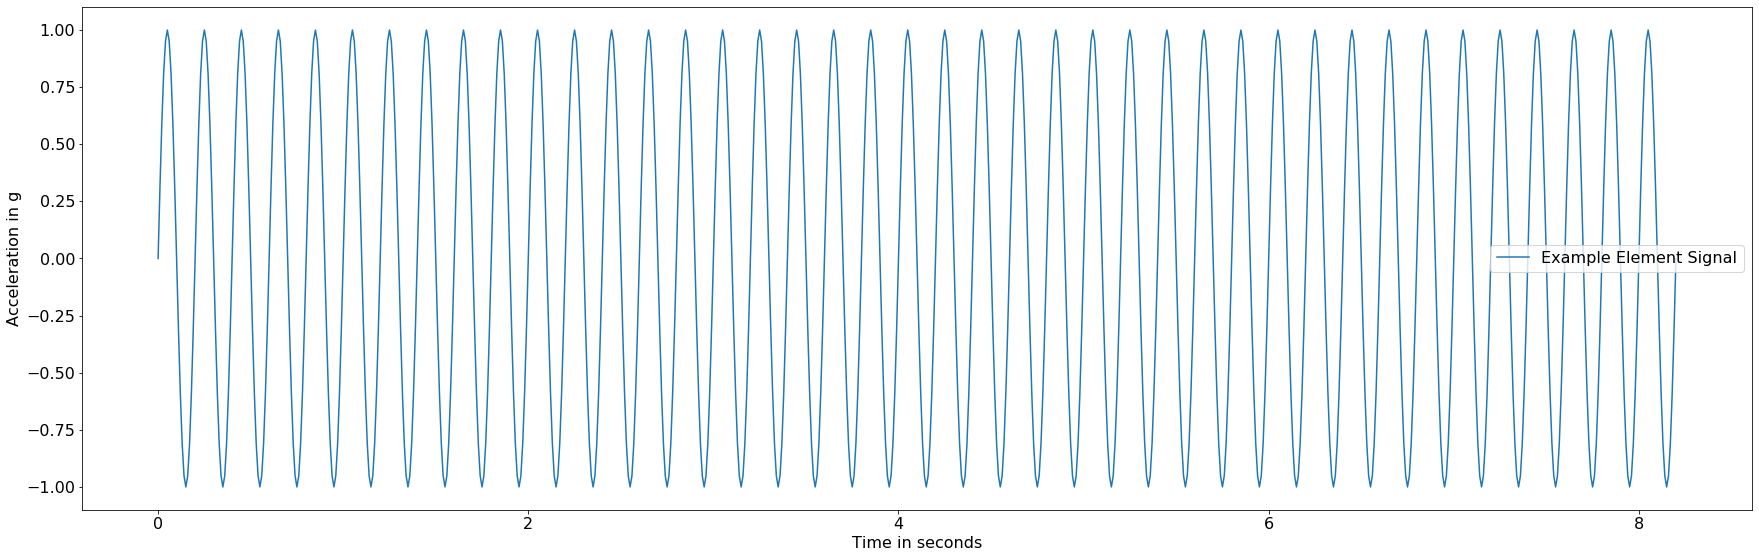

In [39]:
fi, fs = 5, 100
time_vector = gf.get_sample_time_torque(fi, fs, 21, 41)
element_signal = np.sin((2 * np.pi * fi * time_vector)) # Nm | array

plt.plot(time_vector, element_signal)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Example Element Signal'])
plt.show()

<h3>Amplitude Method</h3>
<br>

<li>Scaling the Base Signals</li>
<li>Various methods can be chosen (depending on Element)</li>
<li>Depending on the chosen Method, different Attributes must be given</li>
<li>'repeat' Methods create a pattern which will be repeated</li>

<p>Methods:</p>
<li>None: Method not used</li>
<li>'const': Constant Amplitude for all teeth and all tooth mesh repetitions (<u>attributes:</u> 'constant' (scalar))</li>
<li>'const_repeat': Constant Amplitude for each tooth (list), and unchanging over all tooth mesh repetitions (<u>attributes:</u> 'constant' (list, tuple))</li>
<li>'gaussian': Gaussian Random Amplitude for all teeth and all tooth mesh repetitions (<u>attributes:</u> 'mu' (scalar), 'sigma' (scalar)) </li>
<li>'gaussian_repeat': Gaussian Random Amplitude for each tooth, and unchanging over all tooth mesh repetitions (<u>attributes:</u> 'mu' (scalar), 'sigma' (scalar)) </li>


<p>Example Stationary Sine Signal * const Amplitude</p>

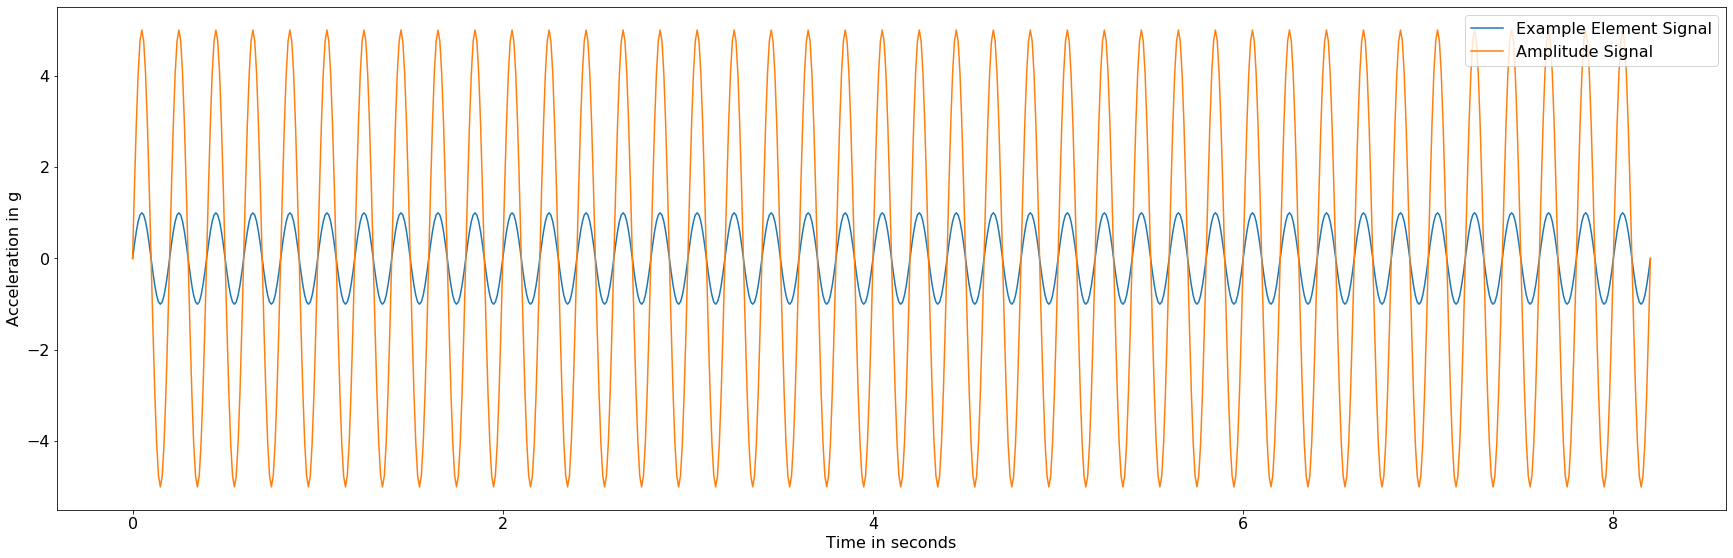

In [40]:
const = 5
amplitude_signal = element_signal * const

plt.plot(time_vector, element_signal, time_vector, amplitude_signal)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Example Element Signal', 'Amplitude Signal'])
plt.show()

<h3>Noise Method</h3>
<br>

<li>Adds noise to the signal</li>
<li>Based on the Amplitude Methods Toolbox (repeat methods are not working)</li>
<li>General use: Adding Gaussian Noise</li>

<p>Methods:</p>

<li>None: Method not used</li>
<li>'const': Constant Amplitude for all teeth and all tooth mesh repetitions (<u>attributes:</u> 'constant' (scalar))</li>
<li><strike>'const_repeat': Constant Amplitude for each tooth (list), and unchanging over all tooth mesh repetitions (<u>attributes:</u> 'constant' (list, tuple))</strike></li>
<li>'gaussian': Gaussian Random Amplitude for all teeth and all tooth mesh repetitions (<u>attributes:</u> 'mu' (scalar), 'sigma' (scalar)) </li>
<li><strike>'gaussian_repeat': Gaussian Random Amplitude for each tooth, and unchanging over all tooth mesh repetitions (<u>attributes:</u> 'mu' (scalar), 'sigma' (scalar))</strike></li>

<p>Example Stationary Sine Signal * const Amplitude + noise</p>

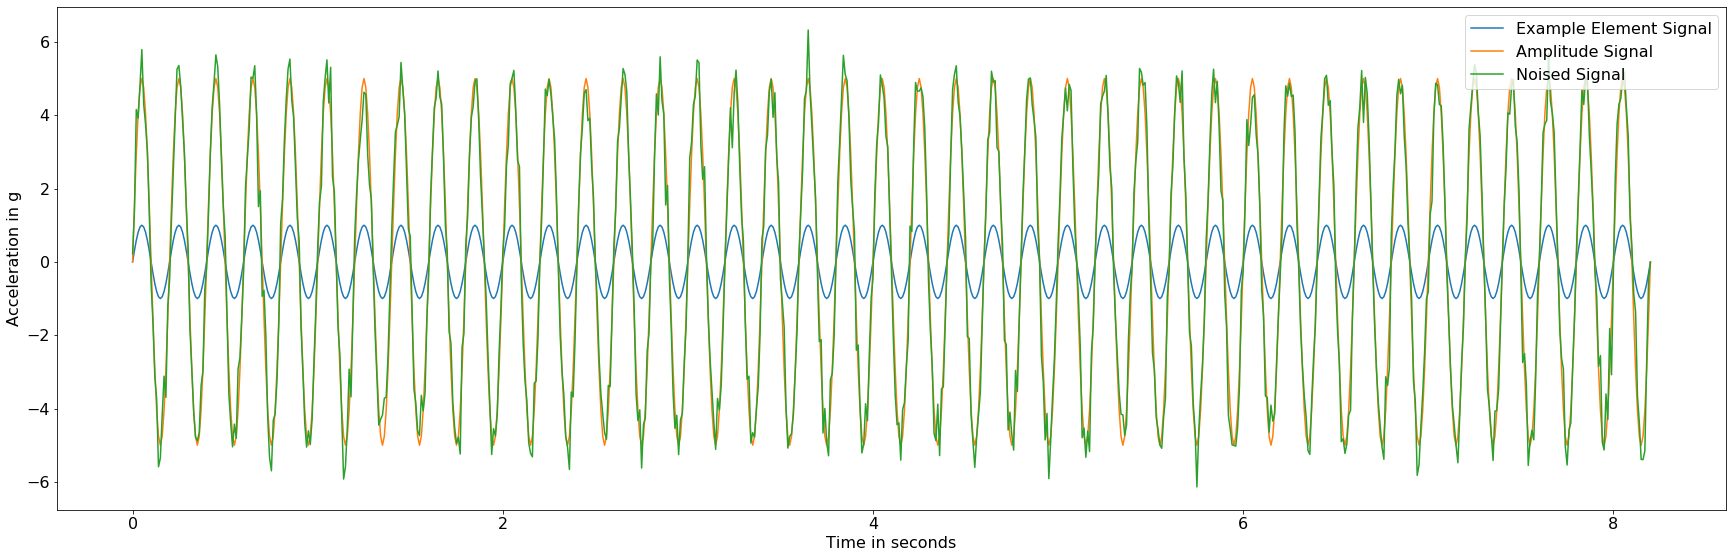

In [41]:
noise = np.random.randn(time_vector.size)*0.5
noised_signal = amplitude_signal + noise

plt.plot(time_vector, element_signal, time_vector, amplitude_signal, time_vector, noised_signal)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Example Element Signal', 'Amplitude Signal', 'Noised Signal'])
plt.show()

<h3>Torque Method</h3>
<br>

<li>Scales Signal s regarding the torque s<sub>t</sub></li>
<li>1. s<sub>t</sub> = s<sub>t</sub>/s<sub>norm</sub>, norm signal by s<sub>norm</sub></li>
<li>2. s<sub>t</sub> = f(s<sub>t</sub>), while f can be linear, polynomial and exponential</li>
<li>3. s<sub>t</sub> = scale(s<sub>t</sub>), scale into range scale_min-scale_max while scale_min corresponds to value_min and scale_max to value_max</li>
<li>4. s<sub>t</sub> = s<sub>t</sub> + 1, add one to retain origninal signal and add torque on top</li>
<li>5. s = s * s<sub>t</sub></li>

<p>Methods:</p>

<li>None: Method not used</li>
<li>'linear': f in step 2 is linear transformation (no transformation)</li>
<li>'polynomial': f in step 2 is polynomial with given exponent argument</li>
<li>'exponential': f in step 2 is exponential</li>

<p>Example Torque Signal 200 Nm +- 5 Nm</p>

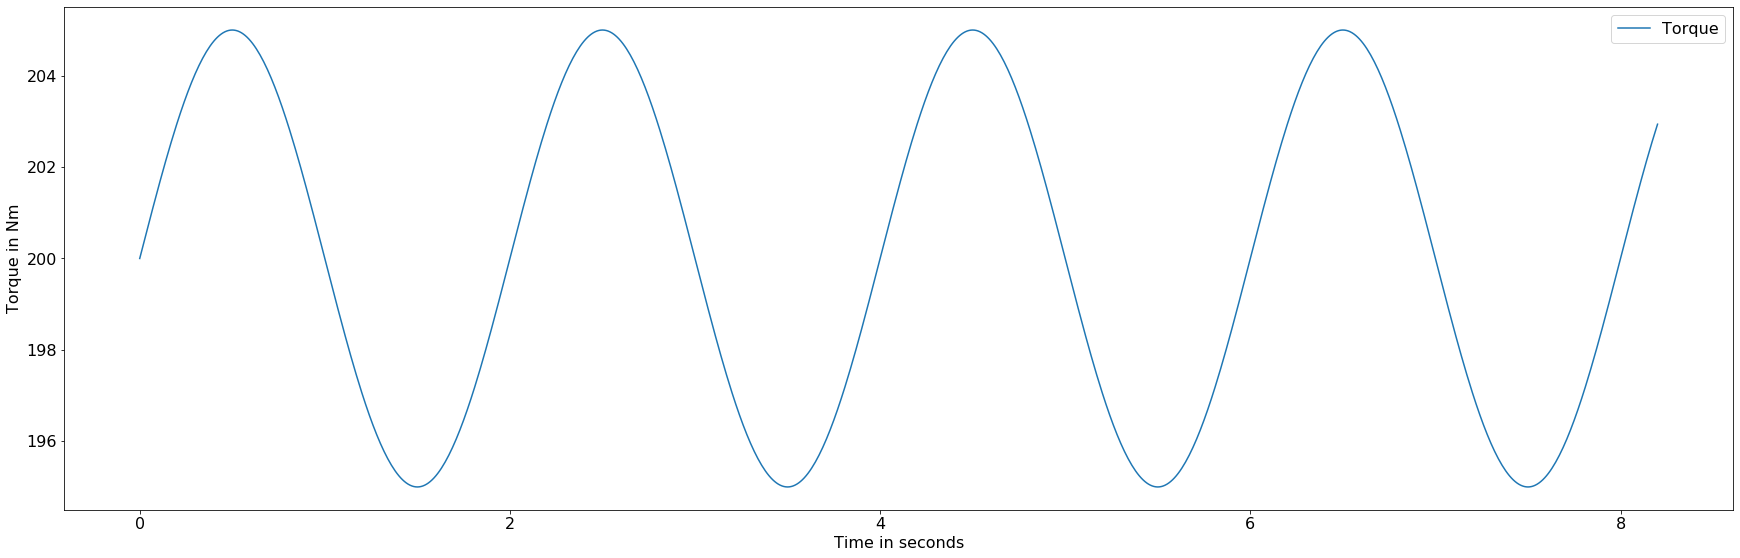

In [42]:
torque = np.sin((2 * np.pi * fi /10 * time_vector))*5 + 200 # Nm | array

plt.plot(time_vector, torque)
plt.xlabel('Time in seconds'), plt.ylabel('Torque in Nm'), plt.legend(['Torque'])
plt.show()


<p>Define Scale Arguments</p>

In [43]:
scale_min = 0                   
scale_max = 0.2
value_min = 1-0.01
value_max = 1.01
norm_divisor = 200
exponent = 2


<p>1. s<sub>t</sub> = s<sub>t</sub>/s<sub>norm</sub>, norm signal by s<sub>norm</sub></p>

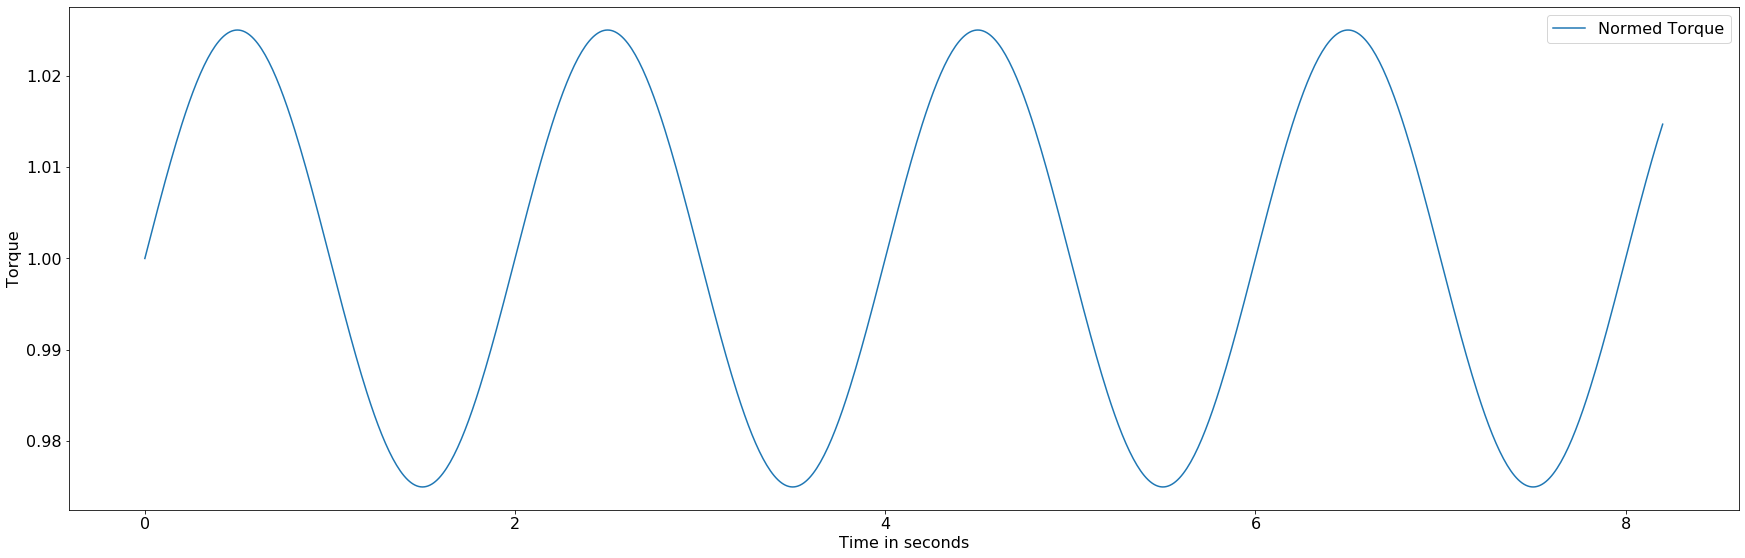

In [44]:
torque_1 = torque / norm_divisor

plt.plot(time_vector, torque_1)
plt.xlabel('Time in seconds'), plt.ylabel('Torque'), plt.legend(['Normed Torque'])
plt.show()

<p>2. s<sub>t</sub> = f(s<sub>t</sub>), while f can be linear, polynomial and exponential</p>

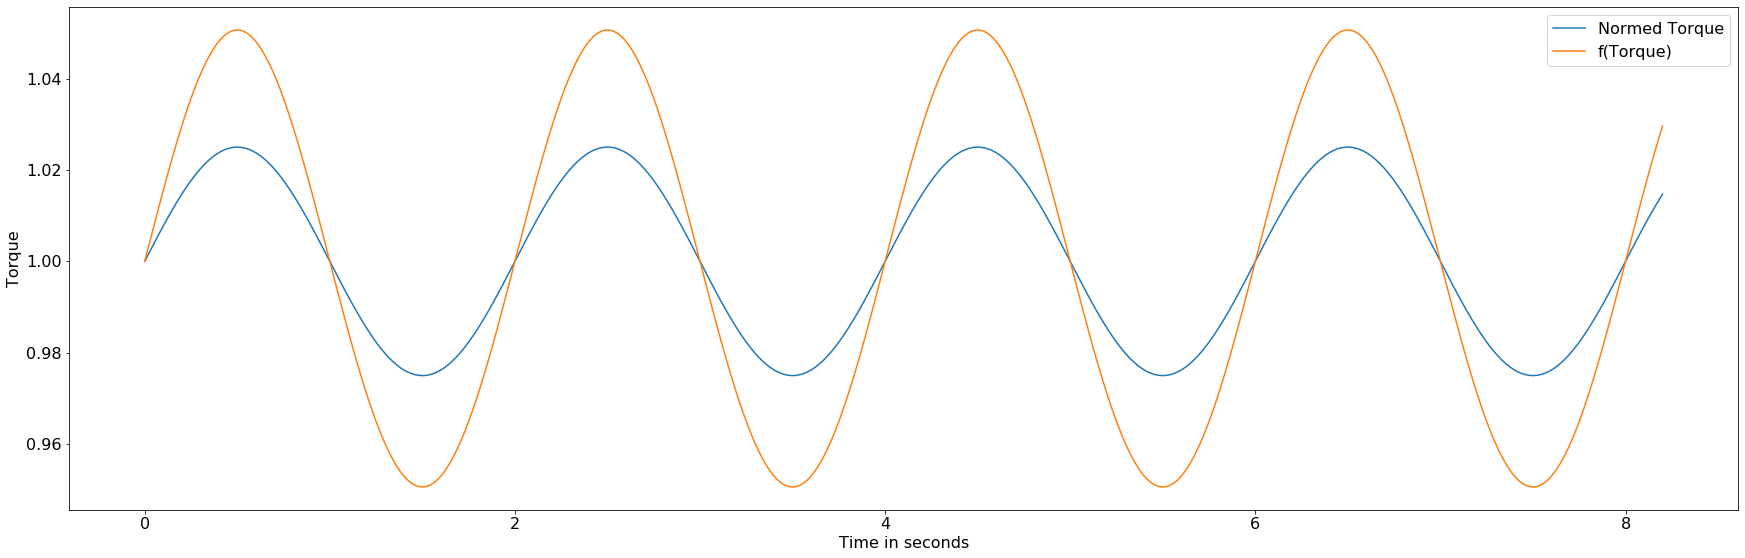

In [45]:
torque_2 = np.power(torque_1, exponent) 

plt.plot(time_vector, torque_1, time_vector, torque_2)
plt.xlabel('Time in seconds'), plt.ylabel('Torque'), plt.legend(['Normed Torque', 'f(Torque)'])
plt.show()

<p>3. s<sub>t</sub> = scale(s<sub>t</sub>), scale into range scale_min-scale_max while scale_min corresponds to value_min and scale_max to value_max</p>

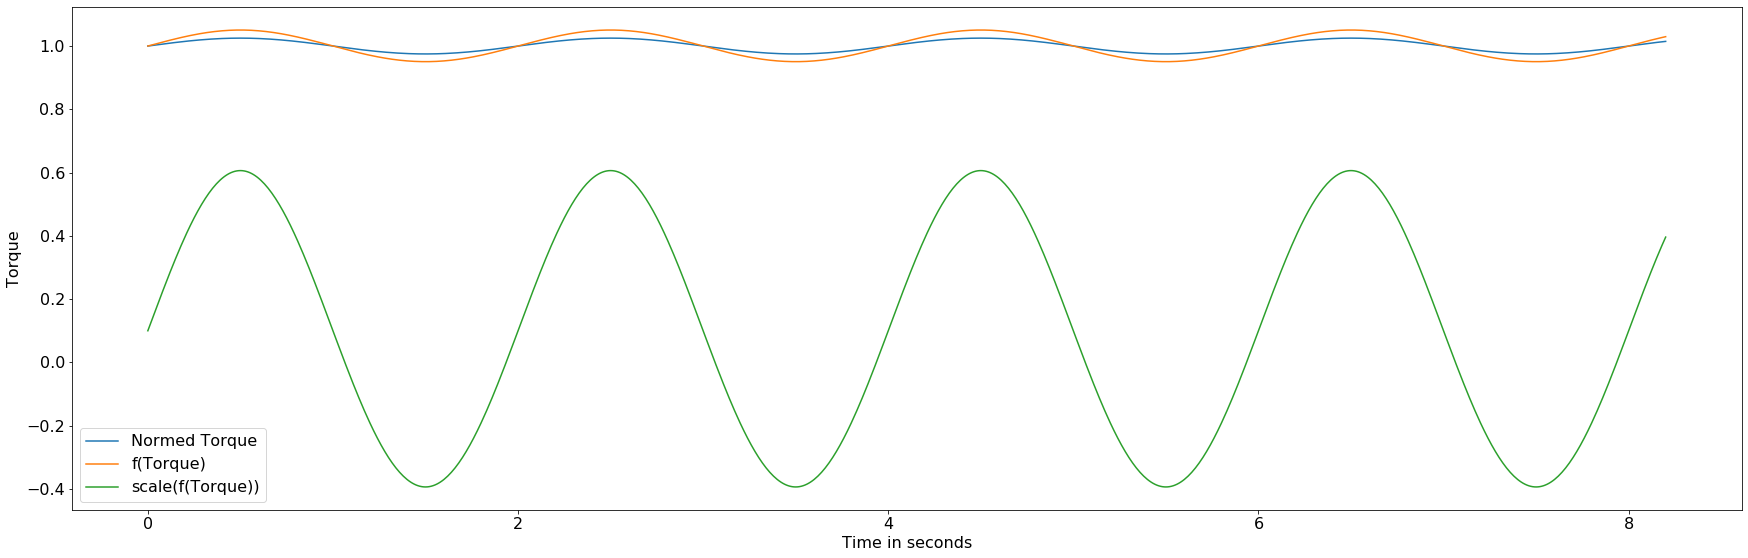

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(scale_min, scale_max))
scaler.fit(np.array([value_min, value_max]).reshape(-1, 1))
torque_3 = scaler.transform(torque_2.reshape(-1, 1)) 

plt.plot(time_vector, torque_1, time_vector, torque_2, time_vector, torque_3)
plt.xlabel('Time in seconds'), plt.ylabel('Torque'), plt.legend(['Normed Torque', 'f(Torque)', 'scale(f(Torque))'])
plt.show()

<p>4. s<sub>t</sub> = s<sub>t</sub> + 1, add one to retain origninal signal and add torque on top</p>

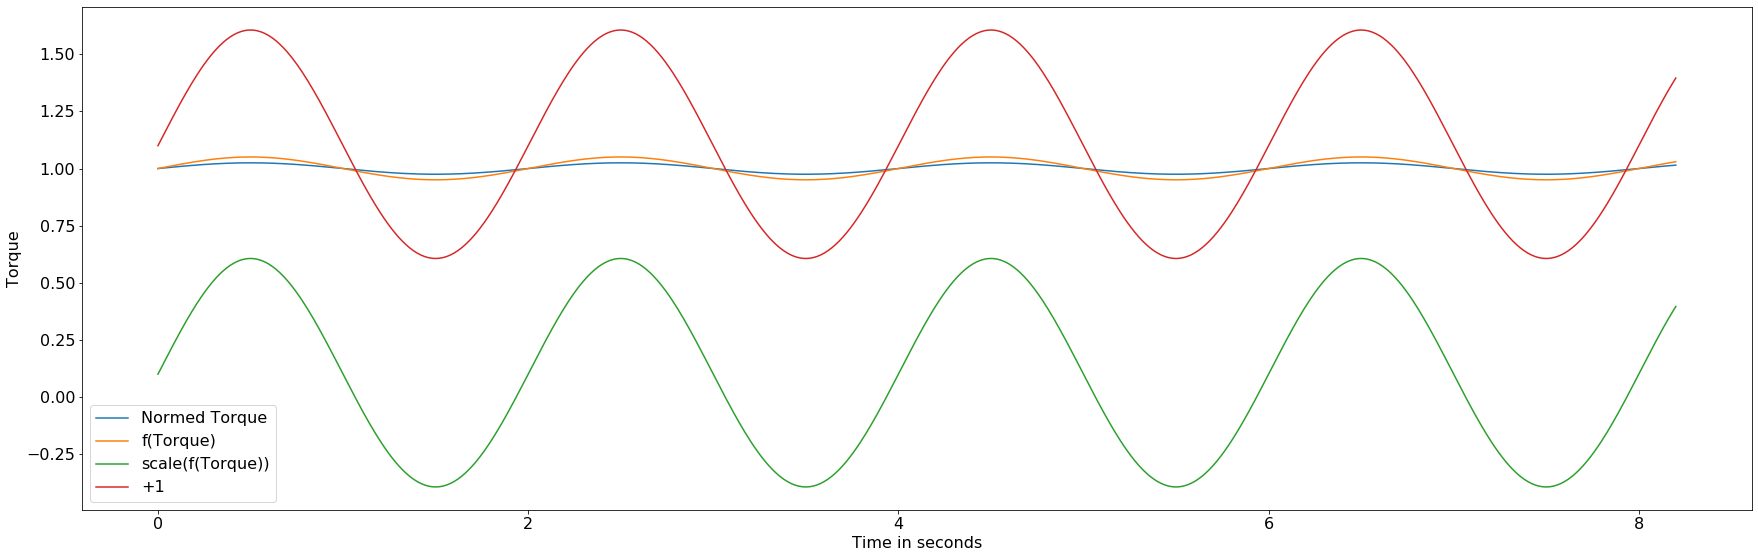

In [47]:
torque_4 = torque_3 + 1 

plt.plot(time_vector, torque_1, time_vector, torque_2, time_vector, torque_3, time_vector, torque_4)
plt.xlabel('Time in seconds'), plt.ylabel('Torque'), plt.legend(['Normed Torque', 'f(Torque)', 'scale(f(Torque))', '+1'])
plt.show()

<p>5. s = s * s<sub>t</sub></p>
<p>(Example Stationary Sine Signal * const Amplitude + noise) * Torque</p>

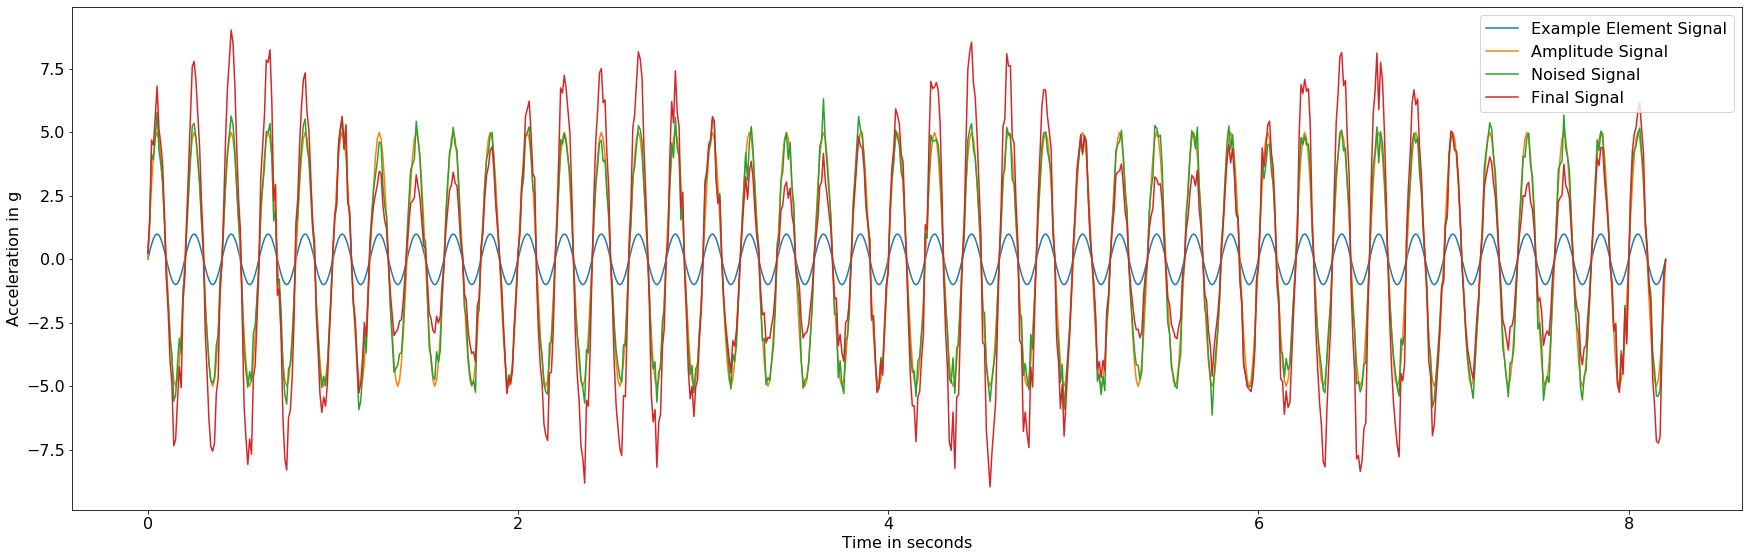

In [48]:
final_signal = noised_signal * torque_4.reshape(-1)

plt.plot(time_vector, element_signal, time_vector, amplitude_signal, time_vector, noised_signal, time_vector, final_signal)
plt.xlabel('Time in seconds'), plt.ylabel('Acceleration in g'), plt.legend(['Example Element Signal', 'Amplitude Signal', 'Noised Signal', 'Final Signal'])
plt.show()

<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Degradation Element Definition</b></p>
</div>
<br>
<h3>Gear Element</h3>
<p>Keyword Attributes: <br>
<ol>
    <li>Failing Teeth: Number of teeth failing at given Gear</li>
    <li>Chances: Various chances influencing the teeth failing order</li>
    <li>PDF_Deg_Init: PDF for pitting_size and load_cycles @ pitting initialization</li>
    <li>PDF_Deg_EOL: PDF for pitting_size and load_cycles @ pitting end of life</li>
    <li>Woehler: Woehler Definition</li>
    <li>GridSearch: Slices for exp.-function Parameters to be determined in Gridsearch</li>
</ol>
</p>


In [49]:
Deg_Gear = {'Failing_Teeth': 2,                                      # Number of Teeth falling at Gear
            'Chances': {'neighbouring': 1,                           # Chance that multiple falling teeth are neighbouring 
                        'opposite': 1,                               # Chance that multiple falling teeth are opposite to each other 
                        'keeporder': 10},                            # Chance that multiple falling teeth are keeping order from init to eol
            'PDF_Deg_Init': {'n': norm(loc=6.875e6, scale=1.053e6),  # P(n_0)
                             'a': norm(loc=0.450, scale=0.305)},     # P(a_0)
            'PDF_Deg_EOL': {'n': norm(loc=10390000, scale=1.053e6),  # P(n_eol)
                            'a': norm(loc=4.0, scale=0.)},           # P(a_eol)
            'Woehler': {'k': 10.5,                                   # Woehler Exponent 
                        'np': 10390000,                              # Woehler Reference n
                        'torqp': 200},                               # Woehler Reference sigma in Nm
            'GridSearch': {'slice_theta1': (0.0001, 0.0902, 0.01),   # Grid for function a = theta1 * exp(theta2 * n) + theta3 defined in slices
                           'slice_theta2': (0.10/1e6, 1.51/1e6, 0.2/1e6), #tbd change step to 0.02/1e6
                           'slice_theta3':(-2.0, 0.5, 0.1)}
           }


<h3>Bearing Element</h3>
<p>Keyword Attributes: <br>
<ol>
    <li>TBD</li>
</ol>
</p>


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Degradation Methods</b></p>
</div>
<br>


<p>Module Methods Structure:</p>

<img src="__pictures/Degradation_Method.png" width="100%">




<p>Load the Gear Degradation Module for demonstration purposes</p>

In [50]:
# os.chdir()
os.chdir(hd)
from gearbox.degradation.gear import Gear_Degradation
os.chdir(wd)

<h3>Chances</h3>
<br>

<p>Chances are descriping <u>how many times more likely</u> it is that an event occurs compared to the event dont occure</p>
<p>Events:</p>
<li>neighbouring: The next failing tooth is a neighbour of an already fallen one</li>
<li>opposite: The next failing tooth is opposite of an already fallen one</li>
<li>keeporder: The teeth are keeping the same order in initialization and end of life (first tooth with initialization is also the first reachning end of life</li>


<p>Random Pitting Initialization</p>

In [51]:
Deg_Gear['Chances'] = {'neighbouring': 1, 'opposite': 1, 'keeporder': 1}  
deg_model = Gear_Degradation(17, Deg_Gear, 1)
deg_model.get_initial_values()

deg_model.state0.head()

a0            n0  tooth          neol  aeol
0  0.122745  5.716048e+06     13  1.130127e+07   4.0
1  0.895943  5.889635e+06     17  7.966480e+06   4.0
2  0.945425  5.950615e+06      8  9.833835e+06   4.0
3  0.397409  5.984998e+06      4  9.985591e+06   4.0
4  0.332863  6.146681e+06     11  8.220672e+06   4.0

<p>Visualization of Pitting Size at Initialization</p>

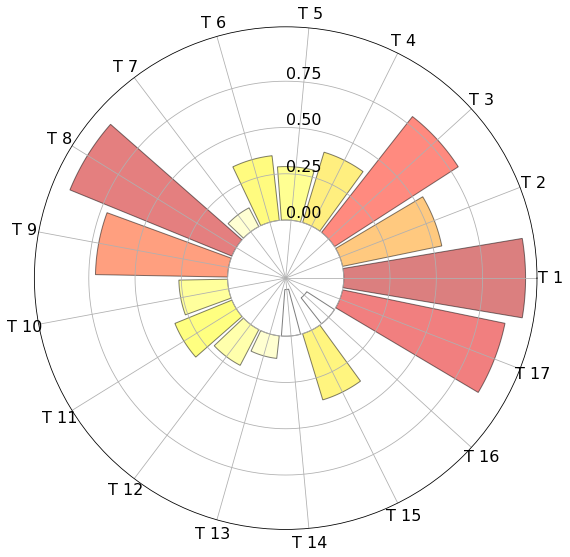

In [52]:
gf.plot_gear_polar(deg_model.state0, kind='pitting', key='a0')

<p>Pitting Order Visualization</p>

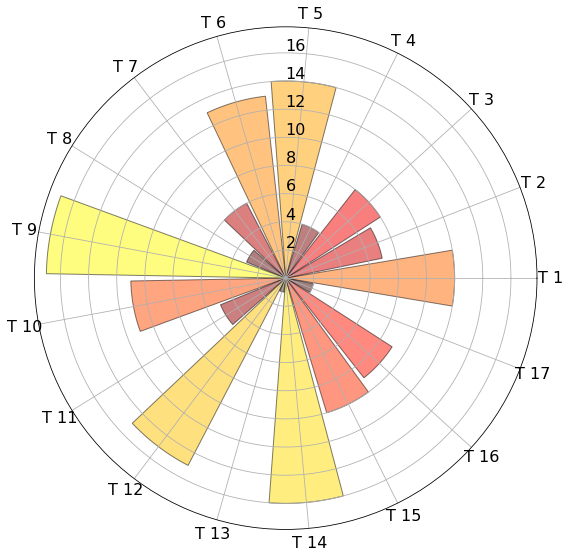

In [53]:
gf.plot_gear_polar(deg_model.state0, kind='order')

<p>Neighbouring favoured Pitting Initialization</p>

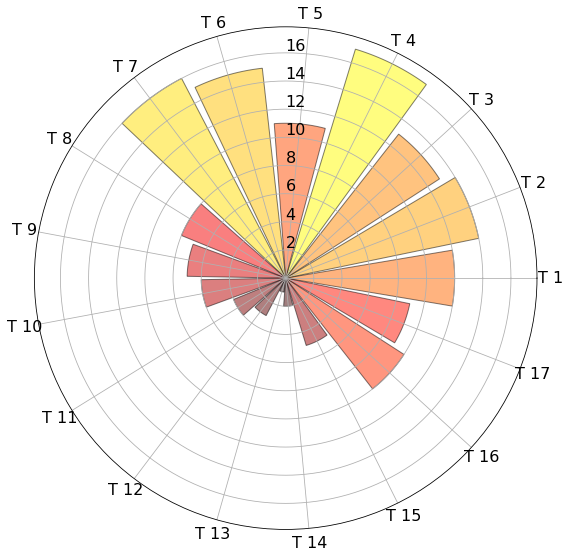

In [54]:
Deg_Gear['Chances'] = {'neighbouring': 100, 'opposite': 1, 'keeporder': 1}  
deg_model = Gear_Degradation(17, Deg_Gear, 1)
deg_model.get_initial_values()
gf.plot_gear_polar(deg_model.state0, kind='order')

<p>Opposite favoured Pitting Initialization</p>

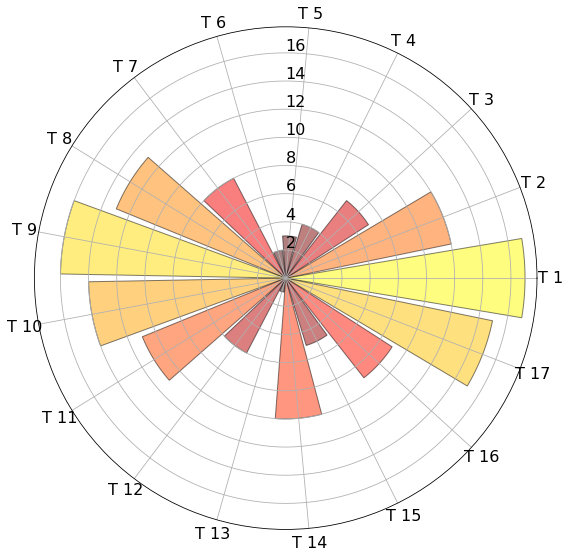

In [55]:
Deg_Gear['Chances'] = {'neighbouring': 1, 'opposite': 100, 'keeporder': 1}  
deg_model = Gear_Degradation(17, Deg_Gear, 1)
deg_model.get_initial_values()
gf.plot_gear_polar(deg_model.state0, kind='order')

<p>Neighbouring and Opposite favoured Pitting Initialization</p>

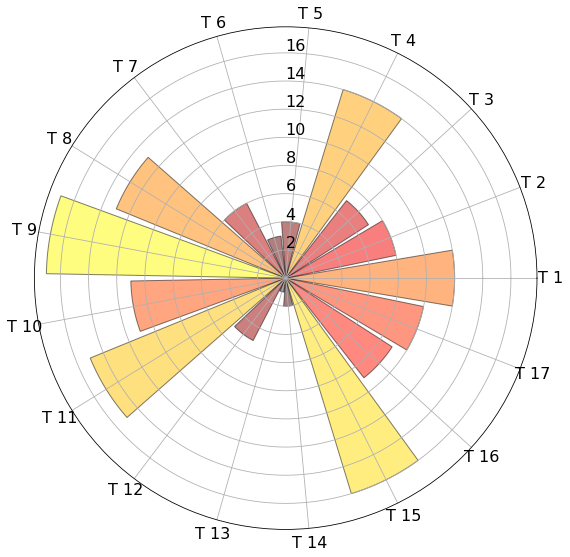

In [56]:
Deg_Gear['Chances'] = {'neighbouring': 100, 'opposite': 100, 'keeporder': 1}  
deg_model = Gear_Degradation(17, Deg_Gear, 1)
deg_model.get_initial_values()
gf.plot_gear_polar(deg_model.state0, kind='order')

<p>Keeporder favoured Initialization</p>

In [57]:
Deg_Gear['Chances'] = {'neighbouring': 1, 'opposite': 1, 'keeporder': 1}  
deg_model = Gear_Degradation(17, Deg_Gear, 1)
deg_model.get_initial_values()

deg_model.state0.head()

a0            n0  tooth          neol  aeol
0  0.122745  5.716048e+06     13  1.130127e+07   4.0
1  0.895943  5.889635e+06     17  7.966480e+06   4.0
2  0.945425  5.950615e+06      8  9.833835e+06   4.0
3  0.397409  5.984998e+06      4  9.985591e+06   4.0
4  0.332863  6.146681e+06     11  8.220672e+06   4.0

<h3>PDF Degradation</h3>
<br>

<p>Probability Density Function for Degradation <u>Initialization</u></p>
<li>n: Initialization Load Cycle PDF - P(n<sub>0</sub>)</li>
<li>a: Initialization Pitting Size PDF - P(a<sub>0</sub>)</li>

<p>Probability Density Function for Degradation <u>End of Life</u></p>
<li>n: EOL Load Cycle PDF - P(n<sub>eol</sub>)</li>
<li>a: EOL Pitting Size PDF - P(a<sub>eol</sub>)</li>

<p> PDF can be defined as any continuous distribution function available on <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">'Scipy Stats'</a></p>
<p><b>PDFs are valid for a reference torque, defined by woehler</b></p>


<p>P(n<sub>0</sub>) and P(n<sub>eol</sub>)</p>

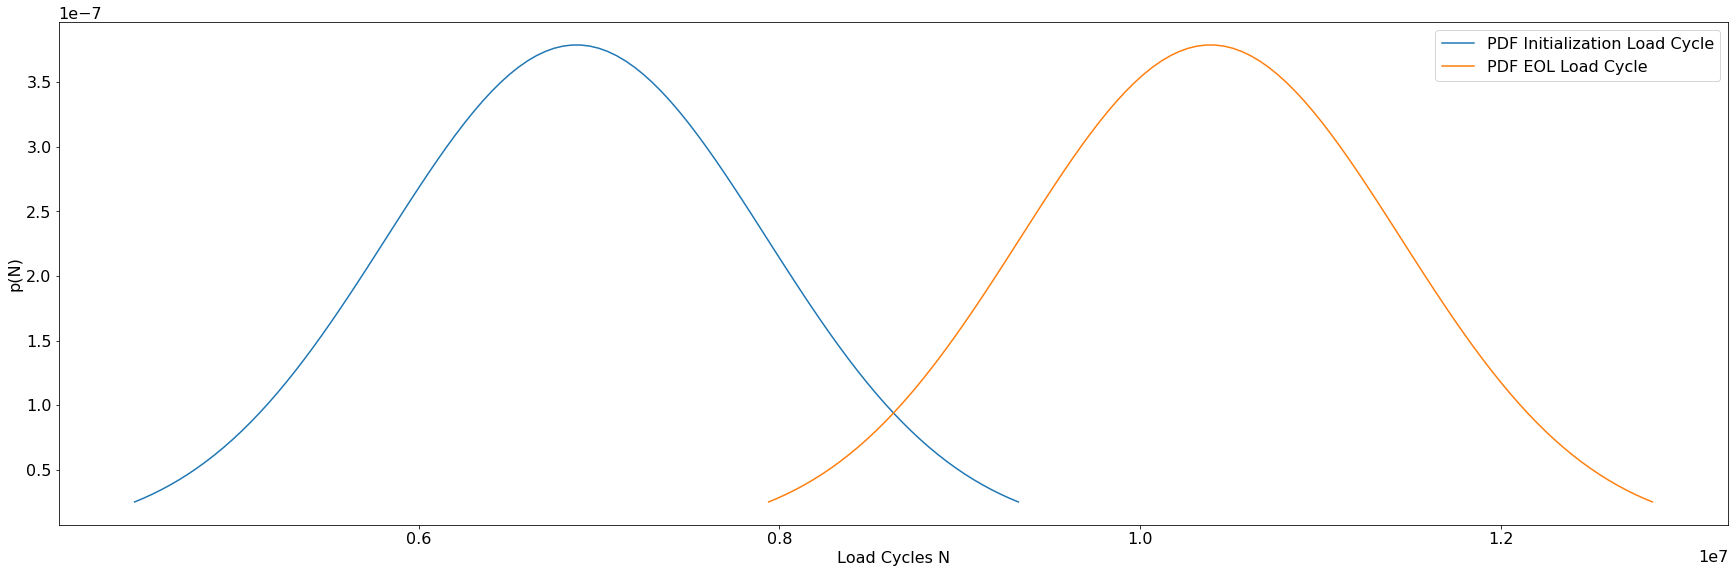

In [58]:
P_n0, P_neol= norm(loc=6.875e6, scale=1.053e6), norm(loc=10390000, scale=1.053e6)
n0, neol = np.linspace(P_n0.ppf(0.01), P_n0.ppf(0.99), 100), np.linspace(P_neol.ppf(0.01), P_neol.ppf(0.99), 100)

plt.plot(n0, P_n0.pdf(n0), neol, P_neol.pdf(neol))
plt.xlabel('Load Cycles N'), plt.ylabel('p(N)'), plt.legend(['PDF Initialization Load Cycle', 'PDF EOL Load Cycle'])
plt.show()

<p>P(a<sub>0</sub>) and P(a<sub>eol</sub>)</p>

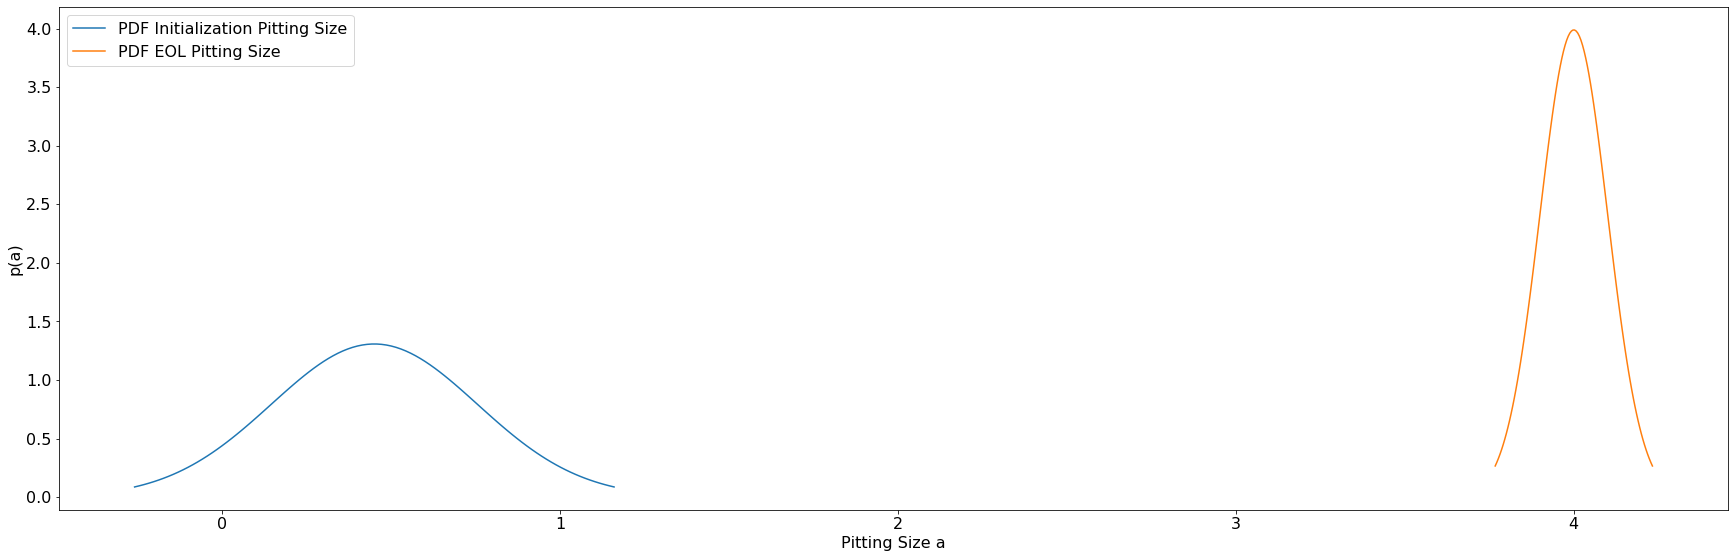

In [59]:
P_a0, P_aeol= norm(loc=0.450, scale=0.305), norm(loc=4.0, scale=0.1)
a0, aeol = np.linspace(P_a0.ppf(0.01), P_a0.ppf(0.99), 100), np.linspace(P_aeol.ppf(0.01), P_aeol.ppf(0.99), 100)

plt.plot(a0, P_a0.pdf(a0), aeol, P_aeol.pdf(aeol))
plt.xlabel('Pitting Size a'), plt.ylabel('p(a)'), plt.legend(['PDF Initialization Pitting Size', 'PDF EOL Pitting Size'])
plt.show()

<h3>Woehler Curve</h3>
<br>

<p>Definition of Woehler Curve for EOL</p>
<li>k: Woehler exponent (measure for gradien)</li>
<li>np: Reference Load Cycle on Woehler Curve - pair (np, torquep)</li>
<li>torquep: Reference Torque on Woehler Curve - pair (np, torquep)</li>


<p>The definition of the reference points (np, torquep) also determines the probability of failure Px for which the Woehler line applies.</p>




<p>Woehler Curve Plot</p>

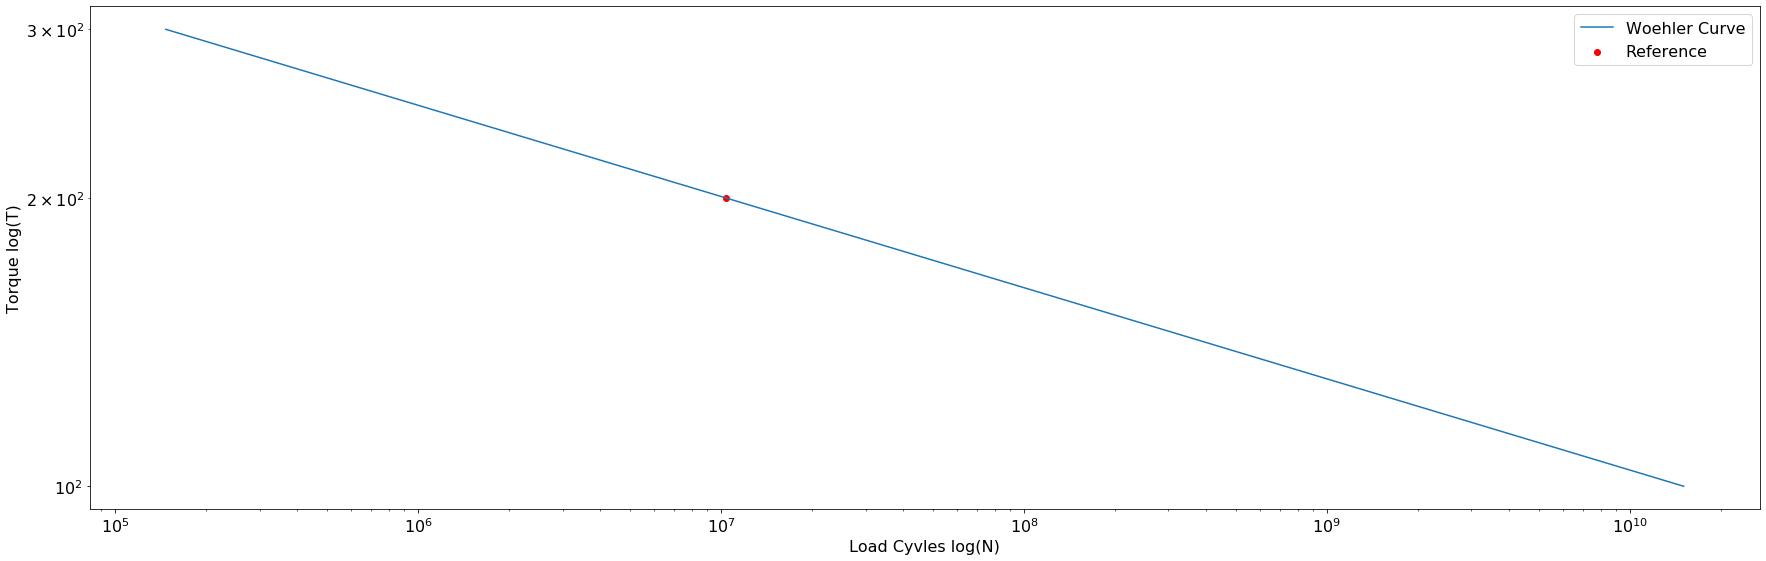

In [60]:
k, n_p, torq_p = 10.5, 10390000., 200.
torq = np.linspace(torq_p*0.5, torq_p*1.5, 10)
N = n_p * np.power((torq / torq_p), -1*k)

plt.plot(N, torq), plt.scatter(n_p, torq_p, c='r')
plt.xscale('log'), plt.yscale('log'), plt.xlabel('Load Cyvles log(N)'), plt.ylabel('Torque log(T)'), plt.legend(['Woehler Curve', 'Reference'])
plt.show()

<h3>GridSearch</h3>
<br>

<p>Definition of <u>Slices</u> for Exponential Function Parameters &theta;</p>
<li>Function: a = &theta;<sub>1</sub> * exp(&theta;<sub>2</sub> * n) + &theta;<sub>3</sub></li>
<li>Two points Given: (a<sub>0</sub>, n<sub>0</sub>) and (a<sub>eol</sub>, n<sub>eol</sub>)</li>
<li>GridSearch for best fit</li>
<li>Only failing teeth</li>

<p>The definition of the reference points (np, torquep) also determines the probability of failure Px for which the Woehler line applies.</p>



In [61]:
Deg_Gear['GridSearch'] = {'slice_theta1': (0.0001, 0.0902, 0.01),
                          'slice_theta2': (0.10/1e6, 1.51/1e6, 0.2/1e6),
                          'slice_theta3':(-2.0, 0.5, 0.1)}


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Degradation Theory</b></p>
</div>
<br>

<li>How Degradation Simulation Works</li>
<li>Running Example for one tooth</li>


<h3>1. Define Degradation Dictionary</h3>


In [62]:
Deg_Gear = {'Failing_Teeth': 2,                                      # Number of Teeth falling at Gear
            'Chances': {'neighbouring': 1,                           # Chance that multiple falling teeth are neighbouring 
                        'opposite': 10,                               # Chance that multiple falling teeth are opposite to each other 
                        'keeporder': 1},                            # Chance that multiple falling teeth are keeping order from init to eol
            'PDF_Deg_Init': {'n': norm(loc=6.875e6, scale=1.053e6),  # P(n_0)
                             'a': norm(loc=0.450, scale=0.305)},     # P(a_0)
            'PDF_Deg_EOL': {'n': norm(loc=10390000, scale=1.053e6),  # P(n_eol)
                            'a': norm(loc=4.0, scale=0.)},           # P(a_eol)
            'Woehler': {'k': 10.5,                                   # Woehler Exponent 
                        'np': 10390000,                              # Woehler Reference n
                        'torqp': 200},                               # Woehler Reference sigma in Nm
            'GridSearch': {'slice_theta1': (0.00, 0.09, 0.01),   # Grid for function a = theta1 * exp(theta2 * n) + theta3 defined in slices
                           'slice_theta2': (0.30/1e6, 0.61/1e6, 0.005/1e6), #tbd change step to 0.02/1e6
                           'slice_theta3':(-.1, 0.4, 0.01)}
           }
no_teeth = 10
seed = 5

<h3>2. Draw (tooth, a<sub>0</sub>, n<sub>0</sub>, a<sub>eol</sub>, n<sub>eol</sub>) Pairs for all teeth considering chances</h3>

In [63]:
deg_model = Gear_Degradation(no_teeth, Deg_Gear, seed)
deg_model.get_initial_values()

deg_model.state0.head()

a0            n0  tooth          neol  aeol
0  0.483431  5.121978e+06      9  1.004159e+07   4.0
1  0.507219  5.283728e+06      6  1.050542e+07   4.0
2  0.584574  5.619019e+06      4  1.012455e+07   4.0
3  0.932657  6.137711e+06      1  9.432578e+06   4.0
4  1.191385  6.497153e+06     10  9.767007e+06   4.0

<h3>3. GridSearch for all failing teeth to get individual degradation function</h3>
<br>
<li>If Failing_Teeth is n --> First n teeth are considered</li>
<li>!! Value Pairs will be adjusted to fit on Degradation Function !!</li>

In [ ]:
deg_model = Gear_Degradation(no_teeth, Deg_Gear, seed)
deg_model.init_gear_degradation()

<p>Results:</p>

In [ ]:
deg_model.state0

<p>Gear Visualization:</p>

In [ ]:
gf.plot_gear_polar(deg_model.state0, kind='pitting_growth', no_teeth=no_teeth, key1='a0', key2='aeol')

<p>Degradation Function Visualization:</p>

In [ ]:
deg_model.plot_state0()

<h3>4. Transform Degradation to Damage D</h3>
<br>
<li>Under constant torque load degradation starts at n<sub>0</sub> and ends at n<sub>eol</sub> </li>
<li>D(n<sub>0</sub>) = 0</li>
<li>D(n<sub>eol</sub>) = 1</li>
<li>Assumption: Linear Damage Accumulation</li>

<p>Draw D(n<sub>0</sub>) = 0 and D(n<sub>eol</sub>) = 1</p>

In [ ]:
fig = plt.figure()
legend = []
for i, row in deg_model.state0.iterrows():
    plt.scatter([row['n0'], row['neol']], [0, 1])
    legend.append('Tooth %i' % (row['tooth']))
plt.xlabel('Load Cyvles N'), plt.ylabel('Damage (D)'), plt.legend(legend)
plt.show()

<p>Get Linear Damage over Load Cycle Dependency</p>

In [ ]:
N = np.linspace(0, 1.5e7, 10)
for i, row in deg_model.state0.iterrows():
    m = (1)/(row['neol'] - row['n0'])
    b = 0 - m * row['n0']
    plt.scatter([row['n0'], row['neol']], [0, 1])
    plt.plot(N, (m * N + b))
plt.xlabel('Load Cyvles N'), plt.ylabel('Damage (D)'), plt.legend(legend)
plt.show()

<h3>5. Pitting Size and Damage Dependency</h3>
<br>
<li>Both Pitting Size a and Damage D are a function of Load Cycles N, so it follows:</li>
<li>D(a<sub>0</sub>) = 0</li>
<li>D(a<sub>eol</sub>) = 1</li>
<li>In General: a(D(N)) = a<sub>d</sub></li>

<h3>6. Defining State0</h3>
<br>
<li>Assumption: Linear Damage Accumulation</li>
<li>All values are valid for the reference load (torque) given in woehler curve definition</li>
<li>At State0 (Initialization) the following is known:</li>
<ul>
    <li>Degradation Function: a(N) = a<sub>N</sub></li>
    <li>Damage Function: D(N) = d<sub>N</sub></li>
    <li>Damage Pitting Dependencie: a(D(N)) = a<sub>d</sub></li>
</ul>

<p>Values @ State0</p>

In [ ]:
print('Load Cycle:                 %i' % (deg_model.nolc[0]))
print('Failing teeth:              %s' % ('|'.join(['   %i   ' % (tooth) for tooth in deg_model.state0['tooth']])))
print('Corresponding Damage:       %s' % ('|'.join(['%.4f' % (damage) for damage in deg_model.damage[-1]])))
print('Corresponding Pitting Size: %s' % ('|'.join(['  %.4f  ' % (ps) if np.isnan(ps) else '%.4f' % (ps) for ps in deg_model.pitting_size[-1]])))

<h3>7. Calculating &Delta;D </h3>
<br>
<li>Given:</li>
<ul>
    <li>List of loads applied on tooth i</li>
    <li>Load Cycles n<sub>p</sub> and n<sub>p-1</sub></li>
    <li>Previous Damage D<sub>p-1, i</sub> </li>
</ul>
<li>Searched:</li>
<ul>
    <li>&Delta;D = D(n<sub>p</sub> - n<sub>p-1</sub>)</li>
    <li>Current Damage D<sub>p, i</sub> </li>
</ul>

<p>Definition of Given</p>

In [ ]:
loads = [195, 200, 205]
curr_cycle = 73

<p>From State0</p>

In [ ]:
idx = 0 # Tooth ID
prev_cycle = deg_model.nolc[-1]
tooth_i = deg_model.state0['tooth'].to_list()[idx]
prev_damage = deg_model.damage[-1][idx]
prev_pitting = deg_model.pitting_size[-1][idx]
n0, neol = deg_model.state0['n0'][idx], deg_model.state0['neol'][idx]
T1, k = Deg_Gear['Woehler']['torqp'], Deg_Gear['Woehler']['k']

<p>Define Woehler for Damage tooth_i</p>

In [ ]:
N1 = neol - n0
torq = np.linspace(T1*0.5, T1*1.5, 10)
N = N1 * np.power((torq / T1), -1*k)

plt.plot(N, torq), plt.scatter(N1, T1, c='r')
plt.xscale('log'), plt.yscale('log'), plt.xlabel('$Load Cyvles log(N_{EOL}-N_0)$'), plt.ylabel('Torque log(T)'), plt.legend(['Woehler Curve', '$N_{EOL} - N_{0}$'])
plt.show()

<p>Get Damage Equivalent D* for all loads</p>

In [ ]:
damage_equivalents = []
for load in loads:
    N2 = N1 * np.power((load / T1), -1*k)
    damage = 1/N2
    damage_equivalents.append(damage)
print('Loads:  %s' % ('|'.join(['  %.3f  ' % (load) for load in loads])))
print('D\'s:    %s' % ('|'.join([' %.3e ' % (de) for de in damage_equivalents])))

<p>Damage Equivalent D* for one load cycle</p>

In [ ]:
d_star = np.mean(damage_equivalents)
print('D* = %.3e = mean(D\'s)' % (d_star))

<p>Calculate &Delta;D = D(n<sub>p</sub> - n<sub>p-1</sub>)</p>

In [ ]:
delta_d = d_star * (curr_cycle - prev_cycle)
print('\u0394D = D* \u0394N = %.3e for \u0394N = %i load cycles' % (delta_d, (curr_cycle - prev_cycle)))

<h3>8. Calculating current D </h3>
<br>
<p>D<sub>p</sub> = D<sub>p-1</sub> + &Delta;D</p>

In [ ]:
curr_damage = prev_damage + delta_d
print('D(p) = D(p-1) + \u0394D = %.3e' % (curr_damage))

<h3>9. Calculating a<sub>p</sub> </h3>
<br>
<p>Using: Damage Pitting Dependencie: a(D(N))</p>
<ul>
    <li>a(D(N)) is given for each tooth</li>
</ul>


<div style="background-color:rgb(0, 190, 255);color:black;padding:0.5em;letter-spacing:0.1em;font-size:1.5em;align=center">
<p><b>Degradation-Vibration Dependency Element Definition</b></p>
</div>
<br>
<p>Module Methods Connection Vibration and Degradtion:</p>
<li>Getting Loads from Torque Signal for Gear Degradation</li>
<li>Translating Pitting Size into Vibration</li>


<h3>Gear Element</h3>
<p>Keyword Attributes: <br>
<ol>
    <li>signal: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>fc_factor: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>bw_factor: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>bwr_factor: <a href="NonstationarySignals">Nonstationary Signals</a><br></li>
    <li>scale_method: <a href="AmplitudeMethod">Scale Method to scale Amplitude based on pitting size(see Torque Influence Method as reference)</a><br></li>
    <li>scale_attributes: <a href="AmplitudeMethod">Attributes regarding Scale Method to (see Torque Influence Attributes as reference)</a><br></li>
    <li>torq_influence:  <a href="TorqueMethod">If True Torque Influence will be taken into account in the same way as in vibration definition</a><br></li>
    <li>noise_method:  <a href="AmplitudeMethod">Method to create Signal Noise (repeat methods are not working)</a><br></li>
    <li>noise_attributes: <a href="AmplitudeMethod">Attributes regarding the Method to create Signal Noise</a><br></li>
</ol>
</p>

In [ ]:
GearDegVibDict = {'signal': 'gausspulse',                                # Signal type for gear
                   'fc_factor': 2*rotational_frequency_in,                                      # fc = frequency * fc_factor (see gauspulse defintion)
                   'bw_factor': 0.5,                                    # see gauspulse defintion
                   'bwr_factor': -6,                                    # see gauspulse defintion
                   'scale_method': 'linear',                            # Scale Method (See Torque Influence Method)
                   'scale_attributes': {'scale_min': 0,                 # Attributes regarding Scale Method for gear signal (see Torque Influence Method)
                                       'scale_max': 1,
                                       'value_min': 0,
                                       'value_max': 4,
                                       'exponent': 2},
                   'torq_influence': True,                              # If True Torque Influence will be taken into account in the same way as in vibration definition
                   'noise_method': 'gaussian',                          # Noise Method
                   'noise_attributes': {'mu': 0, 'sigma': 0.005},       # Attributes regarding Noise Method for
                   }

<h1>Thank you for your attention</h1>
<br>
<p>Mark Henss</p>
<p>Institute of Machine Components</p>
<p>University of Stuttgart</p>

In [ ]:
questions = input("Questions?")

In [ ]:
#%% Parameter Pipeline
alpha = 0.01 #tukey window parameter
pp = 40 #pooling_parameter - window size
yf, xf = gf.rfft_y(vibration, alpha, sample_rate, pp, scale=False)

In [ ]:
plt.figure(figsize=[15,10])
plt.plot(xf, yf)